# Microsoft Malware detection

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h2>2.4. Useful blogs, videos and reference papers</h2>

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
#separating byte files and asm files 

source = 'train'
destination_1 = 'byteFiles'
destination_2 = 'asmFiles'

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination_1):
    os.makedirs(destination_1)
if not os.path.isdir(destination_2):
    os.makedirs(destination_2)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    data_files = os.listdir(source)
    for file in data_files:
        print(file)
        if (file.endswith("bytes")):
            shutil.move(source+'\\'+file,destination_1)
        if (file.endswith("asm")):
            shutil.move(source+'\\'+file,destination_2)

01azqd4InC7m9JpocGv5.asm
01azqd4InC7m9JpocGv5.bytes
01IsoiSMh5gxyDYTl4CB.asm
01IsoiSMh5gxyDYTl4CB.bytes
01jsnpXSAlgw6aPeDxrU.asm
01jsnpXSAlgw6aPeDxrU.bytes
01kcPWA9K2BOxQeS5Rju.asm
01kcPWA9K2BOxQeS5Rju.bytes
01SuzwMJEIXsK7A8dQbl.asm
01SuzwMJEIXsK7A8dQbl.bytes
02IOCvYEy8mjiuAQHax3.asm
02IOCvYEy8mjiuAQHax3.bytes
02JqQ7H3yEoD8viYWlmS.asm
02JqQ7H3yEoD8viYWlmS.bytes
02K5GMYITj7bBoAisEmD.asm
02K5GMYITj7bBoAisEmD.bytes
02mlBLHZTDFXGa7Nt6cr.asm
02mlBLHZTDFXGa7Nt6cr.bytes
02MRILoE6rNhmt7FUi45.asm
02MRILoE6rNhmt7FUi45.bytes
02zcUmKV16Lya5xqnPGB.asm
02zcUmKV16Lya5xqnPGB.bytes
03nJaQV6K2ObICUmyWoR.asm
03nJaQV6K2ObICUmyWoR.bytes
04BfoQRA6XEshiNuI7pF.asm
04BfoQRA6XEshiNuI7pF.bytes
04cvLCVPqBMs6yn5xGlE.asm
04cvLCVPqBMs6yn5xGlE.bytes
04EjIdbPV5e1XroFOpiN.asm
04EjIdbPV5e1XroFOpiN.bytes
04hSzLv5s2TDYPlcgpHB.asm
04hSzLv5s2TDYPlcgpHB.bytes
04mcPSei852tgIKUwTJr.asm
04mcPSei852tgIKUwTJr.bytes
04QzZ3DVdPsEp9elLR65.asm
04QzZ3DVdPsEp9elLR65.bytes
04sJnMaORYc1SV5pKjrP.asm
04sJnMaORYc1SV5pKjrP.bytes
05aiMRw13bYW

0JPAX13cjxewaTh6tRCi.bytes
0K4sTCLtrIJ5SinQbe7u.asm
0K4sTCLtrIJ5SinQbe7u.bytes
0K6yBUcTw3qjtNo4ZQpY.asm
0K6yBUcTw3qjtNo4ZQpY.bytes
0KgE6ksUeytoHfl2cT4r.asm
0KgE6ksUeytoHfl2cT4r.bytes
0KigmP9TLwJXNGz26tfO.asm
0KigmP9TLwJXNGz26tfO.bytes
0KLUAMqmPJhOwaYrbSCE.asm
0KLUAMqmPJhOwaYrbSCE.bytes
0KyDiQb1whgaSrmlx58J.asm
0KyDiQb1whgaSrmlx58J.bytes
0KZFcsOYR4MdPJf6VvGS.asm
0KZFcsOYR4MdPJf6VvGS.bytes
0kzRDUmBLHGd4YPj7hO6.asm
0kzRDUmBLHGd4YPj7hO6.bytes
0l5IobyKpuqcwO4NxfgD.asm
0l5IobyKpuqcwO4NxfgD.bytes
0l6fhCty3aSLDOgAjYQi.asm
0l6fhCty3aSLDOgAjYQi.bytes
0LAXajqhQy7po16dw8Tx.asm
0LAXajqhQy7po16dw8Tx.bytes
0LQSi5wnRZ3muIs6Mx9E.asm
0LQSi5wnRZ3muIs6Mx9E.bytes
0LVqvlHF8PuepodIiBUb.asm
0LVqvlHF8PuepodIiBUb.bytes
0LZkc7qeS39TUtVHuJB1.asm
0LZkc7qeS39TUtVHuJB1.bytes
0M7aSiE9csDzkmfKheVt.asm
0M7aSiE9csDzkmfKheVt.bytes
0m94tRnhgpsAUuY1L8KC.asm
0m94tRnhgpsAUuY1L8KC.bytes
0mcWyK6unLRGV8Hfr97Y.asm
0mcWyK6unLRGV8Hfr97Y.bytes
0meUjiuJvODcf3k9z4Iy.asm
0meUjiuJvODcf3k9z4Iy.bytes
0mfwTlekXE1poYAnqMRO.asm
0mfwTlekXE1p

13FZ9DOhywk78sJiVULu.bytes
13HkPY29CL8RzS0FOc5D.asm
13HkPY29CL8RzS0FOc5D.bytes
13TchIQbYmGgO7aufZyE.asm
13TchIQbYmGgO7aufZyE.bytes
13YpdP5vTLOazSQFRgJn.asm
13YpdP5vTLOazSQFRgJn.bytes
148bgAqCj3NzaHwSP0Gu.asm
148bgAqCj3NzaHwSP0Gu.bytes
14DUiwIb5xrfkF30cThJ.asm
14DUiwIb5xrfkF30cThJ.bytes
14lJRXiAchNqVFSOBLgb.asm
14lJRXiAchNqVFSOBLgb.bytes
15ADIikydX7eNq90WfcB.asm
15ADIikydX7eNq90WfcB.bytes
15EAacDsS3Nj9lQTfLPu.asm
15EAacDsS3Nj9lQTfLPu.bytes
15loeAHtkJa8BuFi6Zry.asm
15loeAHtkJa8BuFi6Zry.bytes
15mfGKRS6aVevjAoYL8w.asm
15mfGKRS6aVevjAoYL8w.bytes
15sGnFeEvMIgpQ8acbUu.asm
15sGnFeEvMIgpQ8acbUu.bytes
15tQNEDpb0mi63kfOWM8.asm
15tQNEDpb0mi63kfOWM8.bytes
15uCdAByiF48LpZ3YS6Q.asm
15uCdAByiF48LpZ3YS6Q.bytes
16cTMtKIjH5SbyovWuBq.asm
16cTMtKIjH5SbyovWuBq.bytes
16eajI7F2vQKhwi9dM4O.asm
16eajI7F2vQKhwi9dM4O.bytes
16gDhwbZTRjLMO9zI5cX.asm
16gDhwbZTRjLMO9zI5cX.bytes
16KuXyrdDOCWGhc7P4kL.asm
16KuXyrdDOCWGhc7P4kL.bytes
175ZU8ClOsnifz03ybcX.asm
175ZU8ClOsnifz03ybcX.bytes
17aN50JFZXYrcAk2iCtG.asm
17aN50JFZXYr

1S9ui2XqltCJAOGUPw7v.bytes
1sBx73EF2kMvHGZtNfSK.asm
1sBx73EF2kMvHGZtNfSK.bytes
1SFK4QHeDoOz3AMJ6bfh.asm
1SFK4QHeDoOz3AMJ6bfh.bytes
1SH4t9y0IAoE8QP5NvXp.asm
1SH4t9y0IAoE8QP5NvXp.bytes
1Skcwz5YxWihMqIyt30X.asm
1Skcwz5YxWihMqIyt30X.bytes
1smUAv6epFKI7kbR3u0G.asm
1smUAv6epFKI7kbR3u0G.bytes
1soISvrO3ylkfmuaq2UG.asm
1soISvrO3ylkfmuaq2UG.bytes
1sOzen4EwI3a2UkSJmT5.asm
1sOzen4EwI3a2UkSJmT5.bytes
1sqBw5DpJaRkx4SlQdLY.asm
1sqBw5DpJaRkx4SlQdLY.bytes
1sVJGxyIi5AYblaRtu4e.asm
1sVJGxyIi5AYblaRtu4e.bytes
1SVleInitNjxByvsFbdm.asm
1SVleInitNjxByvsFbdm.bytes
1T0BWPoJVtNFzsycKhlr.asm
1T0BWPoJVtNFzsycKhlr.bytes
1T3m7BMCLXpu9JjyKH8R.asm
1T3m7BMCLXpu9JjyKH8R.bytes
1TanJreGOmNDozP5WQ62.asm
1TanJreGOmNDozP5WQ62.bytes
1tBWqEHyDjQpKrGg5ulh.asm
1tBWqEHyDjQpKrGg5ulh.bytes
1TieqSEpxIa6BmcGFsvM.asm
1TieqSEpxIa6BmcGFsvM.bytes
1TKPznCeQg9cHYflavwb.asm
1TKPznCeQg9cHYflavwb.bytes
1TLN456WuaqCsDr9pv0z.asm
1TLN456WuaqCsDr9pv0z.bytes
1tO3IYLhvDx6CKoHamQb.asm
1tO3IYLhvDx6CKoHamQb.bytes
1TVNfZcvR09FtU2aPdxK.asm
1TVNfZcvR09F

2Ig4GdWcjlOLQ9YEz6aV.bytes
2iJ4HWSj08ndUBFZqTa7.asm
2iJ4HWSj08ndUBFZqTa7.bytes
2iKeU7DIk9Rdyf4hc8vr.asm
2iKeU7DIk9Rdyf4hc8vr.bytes
2IOMPurW3V9GQcbh08jE.asm
2IOMPurW3V9GQcbh08jE.bytes
2ipXFC47Umax9kQfgcTe.asm
2ipXFC47Umax9kQfgcTe.bytes
2ISirUkfPhltjXVQ86Ge.asm
2ISirUkfPhltjXVQ86Ge.bytes
2ITFtqynN5lOsP378RaC.asm
2ITFtqynN5lOsP378RaC.bytes
2IUJrWpZ8tboCh6O7aqv.asm
2IUJrWpZ8tboCh6O7aqv.bytes
2iXg1l78rZEW5YVRJyv6.asm
2iXg1l78rZEW5YVRJyv6.bytes
2IyqEP09z683Sx5XWmao.asm
2IyqEP09z683Sx5XWmao.bytes
2j4t9uRGXVnsH8hxEZi7.asm
2j4t9uRGXVnsH8hxEZi7.bytes
2j6bnlrCgNW9cvm0KIMH.asm
2j6bnlrCgNW9cvm0KIMH.bytes
2jA0Zpk5aetMqrz6nswK.asm
2jA0Zpk5aetMqrz6nswK.bytes
2jf7mkt8YCUM3AriKVas.asm
2jf7mkt8YCUM3AriKVas.bytes
2Jfm9sAlG3DWCI0cpSYw.asm
2Jfm9sAlG3DWCI0cpSYw.bytes
2JfpcM9ACq4XatFLho8z.asm
2JfpcM9ACq4XatFLho8z.bytes
2jHV3wyk5aDGBs9SFCvW.asm
2jHV3wyk5aDGBs9SFCvW.bytes
2JpSgz3vxQqm9H4EIRhV.asm
2JpSgz3vxQqm9H4EIRhV.bytes
2JpYoHqMfAI5jnlGDgFs.asm
2JpYoHqMfAI5jnlGDgFs.bytes
2jSxktyUYeWKChNocI04.asm
2jSxktyUYeWK

30259LfMxFdATBcqNOi1.asm
30259LfMxFdATBcqNOi1.bytes
30bZwzUydP1hQD8WJcrL.asm
30bZwzUydP1hQD8WJcrL.bytes
30gAEOLxoS2XGWFa8cTr.asm
30gAEOLxoS2XGWFa8cTr.bytes
30htxi8FRcmfUkInewlS.asm
30htxi8FRcmfUkInewlS.bytes
30ryX9b4elIiQcPaVx2W.asm
30ryX9b4elIiQcPaVx2W.bytes
30Sj9rlHUZveV8FN1k54.asm
30Sj9rlHUZveV8FN1k54.bytes
31cfRs0hdZYLq9A6Ielt.asm
31cfRs0hdZYLq9A6Ielt.bytes
31KjQiNWATfPaozHtYOl.asm
31KjQiNWATfPaozHtYOl.bytes
31lyTKsufPDUhgebwzQm.asm
31lyTKsufPDUhgebwzQm.bytes
31q6gcPKtCp8EQGj7yTL.asm
31q6gcPKtCp8EQGj7yTL.bytes
31vEFJmeXuz6nfrOWUka.asm
31vEFJmeXuz6nfrOWUka.bytes
31xrLF5GIWsnJ9pltCBE.asm
31xrLF5GIWsnJ9pltCBE.bytes
32jPglFUkIuyNEDoW4eT.asm
32jPglFUkIuyNEDoW4eT.bytes
32kdRqV7gDCjrpW1L4xS.asm
32kdRqV7gDCjrpW1L4xS.bytes
32ngm5yJs7dTNGj401vE.asm
32ngm5yJs7dTNGj401vE.bytes
32r6nRhN1UCwtFTfy8ZG.asm
32r6nRhN1UCwtFTfy8ZG.bytes
32rcXoa5QI1EmxBFS9he.asm
32rcXoa5QI1EmxBFS9he.bytes
32WwkMHD8dafQApiKmlv.asm
32WwkMHD8dafQApiKmlv.bytes
34anOKthJ6CXbZs2MeI5.asm
34anOKthJ6CXbZs2MeI5.bytes
34JhfVHMQArU

3MbT7ePSqZuEWgXpiKDm.bytes
3mCGDSjRVxpeoaYXLfc9.asm
3mCGDSjRVxpeoaYXLfc9.bytes
3MG6tJEmkClb5pB0aOQT.asm
3MG6tJEmkClb5pB0aOQT.bytes
3MGDnh5cf0wS7tzk9upR.asm
3MGDnh5cf0wS7tzk9upR.bytes
3Mlb2WXYpOiJLeEv60nr.asm
3Mlb2WXYpOiJLeEv60nr.bytes
3mpsxg2FODqCAXHbMKPi.asm
3mpsxg2FODqCAXHbMKPi.bytes
3mSnzZXGkwKY4a7yp2bJ.asm
3mSnzZXGkwKY4a7yp2bJ.bytes
3MY2qTOsQzVHgrNoa1Ib.asm
3MY2qTOsQzVHgrNoa1Ib.bytes
3MZriOFjTzUcpWfl4nah.asm
3MZriOFjTzUcpWfl4nah.bytes
3n1LAdlCtkErg09OIfFx.asm
3n1LAdlCtkErg09OIfFx.bytes
3NctGxP1CHAqdXWho2F9.asm
3NctGxP1CHAqdXWho2F9.bytes
3nD402vc1wpMazdUobEB.asm
3nD402vc1wpMazdUobEB.bytes
3ndoEVSf9cJHB7sqC1XZ.asm
3ndoEVSf9cJHB7sqC1XZ.bytes
3njKFSaLcsNydxXDA8q9.asm
3njKFSaLcsNydxXDA8q9.bytes
3NkDlyOHUWc2Qjzgh9dV.asm
3NkDlyOHUWc2Qjzgh9dV.bytes
3nowFMmKJAkiNs8CaGVb.asm
3nowFMmKJAkiNs8CaGVb.bytes
3NPVdenAHU8cyZlsQBv1.asm
3NPVdenAHU8cyZlsQBv1.bytes
3nqel6RATDmiaQJwpZCz.asm
3nqel6RATDmiaQJwpZCz.bytes
3NwypUot5vGsCE4FhRqb.asm
3NwypUot5vGsCE4FhRqb.bytes
3nxujXtip8hGHb6ZQdA4.asm
3nxujXtip8hG

43Pz67mIVtohuyapcLKj.asm
43Pz67mIVtohuyapcLKj.bytes
45aTQcuSVrGxZ62vHLbw.asm
45aTQcuSVrGxZ62vHLbw.bytes
45bI6DlJUGh8KF01ExTW.asm
45bI6DlJUGh8KF01ExTW.bytes
45drFT2pMjSGQ71g9yke.asm
45drFT2pMjSGQ71g9yke.bytes
45jzUD8TtAe3wCspRHvO.asm
45jzUD8TtAe3wCspRHvO.bytes
45Vh6aQiPqovLmgMFXdw.asm
45Vh6aQiPqovLmgMFXdw.bytes
45Wy3TxE98HfiXreOCSu.asm
45Wy3TxE98HfiXreOCSu.bytes
46FsZxPzIVu87hy95CkB.asm
46FsZxPzIVu87hy95CkB.bytes
46OZzdsSKDCFV8h7XWxf.asm
46OZzdsSKDCFV8h7XWxf.bytes
46ywoHZAMYPuqcbVQpUT.asm
46ywoHZAMYPuqcbVQpUT.bytes
47cdjy1YmUt5nwesX0qS.asm
47cdjy1YmUt5nwesX0qS.bytes
47GqvWtCkjShUVpE1oI0.asm
47GqvWtCkjShUVpE1oI0.bytes
47mvwgDZ6dTEQcetyPbn.asm
47mvwgDZ6dTEQcetyPbn.bytes
47QarcFI2Vwh8mKuS0Zk.asm
47QarcFI2Vwh8mKuS0Zk.bytes
48Dhca7LzbPTWN96xjFY.asm
48Dhca7LzbPTWN96xjFY.bytes
48GJctl731qKWuhyfVwL.asm
48GJctl731qKWuhyfVwL.bytes
48hgcanwOk90e2A6FsLr.asm
48hgcanwOk90e2A6FsLr.bytes
495fFS8xhenO7WqZX6uw.asm
495fFS8xhenO7WqZX6uw.bytes
496EYbjny1LlaK3sr5Zu.asm
496EYbjny1LlaK3sr5Zu.bytes
49A8ITdtp3Eo

4S0KT7xLGJ91CzYfMNpI.asm
4S0KT7xLGJ91CzYfMNpI.bytes
4S1uOdNGqKkCxZFVWAzB.asm
4S1uOdNGqKkCxZFVWAzB.bytes
4S5AJVNXiIrfZG7na0KQ.asm
4S5AJVNXiIrfZG7na0KQ.bytes
4s5QmpaV1GOniI3HL7xg.asm
4s5QmpaV1GOniI3HL7xg.bytes
4SBiOYxhVHqXWgKwtdLG.asm
4SBiOYxhVHqXWgKwtdLG.bytes
4sChO0eqidfLtS83JMVE.asm
4sChO0eqidfLtS83JMVE.bytes
4sfNor501UBlmibpZGSX.asm
4sfNor501UBlmibpZGSX.bytes
4siXYtIN0AxCKn5yzhkg.asm
4siXYtIN0AxCKn5yzhkg.bytes
4SjLXYDV0JuCaKdmNHGv.asm
4SjLXYDV0JuCaKdmNHGv.bytes
4skKNvbjShmzaWHIRQXi.asm
4skKNvbjShmzaWHIRQXi.bytes
4SlLxU3iCrsYunot8p72.asm
4SlLxU3iCrsYunot8p72.bytes
4sLZAvlYX7yBctu3Pkdq.asm
4sLZAvlYX7yBctu3Pkdq.bytes
4sOoJx13PzqCunGTBIVS.asm
4sOoJx13PzqCunGTBIVS.bytes
4sPNK2e8VEkXb5t1odf9.asm
4sPNK2e8VEkXb5t1odf9.bytes
4suKxkVWNqFQZLB5UfXD.asm
4suKxkVWNqFQZLB5UfXD.bytes
4SuwT5vFQc1YN70iegLx.asm
4SuwT5vFQc1YN70iegLx.bytes
4sY5wVHK1fL7Poim8cJF.asm
4sY5wVHK1fL7Poim8cJF.bytes
4SyfKNtskEM1juUnXZv2.asm
4SyfKNtskEM1juUnXZv2.bytes
4syoiE9gr1HVtAfwTQY8.asm
4syoiE9gr1HVtAfwTQY8.bytes
4T32Ml0ctDZm

5BcfbNg9wXoy0l6vSaDm.asm
5BcfbNg9wXoy0l6vSaDm.bytes
5birSkFE6dmgN71BPCJc.asm
5birSkFE6dmgN71BPCJc.bytes
5BlRFpdAb3OqosmfPZNT.asm
5BlRFpdAb3OqosmfPZNT.bytes
5bNgRzHpdGInuxjQBvFt.asm
5bNgRzHpdGInuxjQBvFt.bytes
5bOucF2zs3YnAgZEp9BC.asm
5bOucF2zs3YnAgZEp9BC.bytes
5BwP4dfo9Wmlcsj6XGR3.asm
5BwP4dfo9Wmlcsj6XGR3.bytes
5C0Ke7rXRtb9smU3Qkho.asm
5C0Ke7rXRtb9smU3Qkho.bytes
5c9nbNjd6TxmDfP4Avp3.asm
5c9nbNjd6TxmDfP4Avp3.bytes
5ceItS0Y1RjbXrhC9Zdg.asm
5ceItS0Y1RjbXrhC9Zdg.bytes
5cG9KQqabVEpBhHWgRv1.asm
5cG9KQqabVEpBhHWgRv1.bytes
5CGnPfpKwzlobgBT67aH.asm
5CGnPfpKwzlobgBT67aH.bytes
5chuolCpgextP9bqGSBW.asm
5chuolCpgextP9bqGSBW.bytes
5CiGOStRIX3ayFUrAeoQ.asm
5CiGOStRIX3ayFUrAeoQ.bytes
5CQsuk3ygnTmHKEBDbzZ.asm
5CQsuk3ygnTmHKEBDbzZ.bytes
5cVTmPKBAp9Llzbh2MtI.asm
5cVTmPKBAp9Llzbh2MtI.bytes
5cXoH4pnaQFISUNl1DsR.asm
5cXoH4pnaQFISUNl1DsR.bytes
5DFeXtmWB4E9ialRNkVM.asm
5DFeXtmWB4E9ialRNkVM.bytes
5dmG6aSUptLVBfiJ40ZA.asm
5dmG6aSUptLVBfiJ40ZA.bytes
5dNsph6uJltkZMLzTP0w.asm
5dNsph6uJltkZMLzTP0w.bytes
5DOk4mvSnz2H

5SgZNAyTDU8FCiEvwX7k.bytes
5sHnYk4EgplBiD8cSLoI.asm
5sHnYk4EgplBiD8cSLoI.bytes
5sJV4UyRmLc7Mx9a6ldr.asm
5sJV4UyRmLc7Mx9a6ldr.bytes
5SjzAvpC3dO9tRDTVyKx.asm
5SjzAvpC3dO9tRDTVyKx.bytes
5sLXK39w4fkSzAVi1Q6U.asm
5sLXK39w4fkSzAVi1Q6U.bytes
5StqsK6dcek7TrWPa4EO.asm
5StqsK6dcek7TrWPa4EO.bytes
5su2fIARtLqUzSdQgDB9.asm
5su2fIARtLqUzSdQgDB9.bytes
5Su9y2pdWjXihsICkxUF.asm
5Su9y2pdWjXihsICkxUF.bytes
5SUMnGsTvqBlJb24hy0A.asm
5SUMnGsTvqBlJb24hy0A.bytes
5t6cKfgy1aoZTCipuOI7.asm
5t6cKfgy1aoZTCipuOI7.bytes
5t6pDKTJ2Pw0fxQiEjbo.asm
5t6pDKTJ2Pw0fxQiEjbo.bytes
5t84gFkWCXUQErYsRLcy.asm
5t84gFkWCXUQErYsRLcy.bytes
5tgsDzdZ9xMm8F47WNrv.asm
5tgsDzdZ9xMm8F47WNrv.bytes
5tLizVMafFr6UpmbZ8ed.asm
5tLizVMafFr6UpmbZ8ed.bytes
5tMCNKDogQ2x7zwUbpcZ.asm
5tMCNKDogQ2x7zwUbpcZ.bytes
5TpJycItjG3gXY0F2nWL.asm
5TpJycItjG3gXY0F2nWL.bytes
5tQ4OCNKrDpPhWB7ngou.asm
5tQ4OCNKrDpPhWB7ngou.bytes
5TYzgLhQumXGqJe83bDn.asm
5TYzgLhQumXGqJe83bDn.bytes
5UCs70VqrjQ8wIYp1zme.asm
5UCs70VqrjQ8wIYp1zme.bytes
5Ud7vNlBO9mRQhVrwJyD.asm
5Ud7vNlBO9mR

6eqrZ7pnXQUtckVG21BK.bytes
6F3Dj4qM15tKvNTEoQlP.asm
6F3Dj4qM15tKvNTEoQlP.bytes
6fbTnNXuIJg7QjhcKqSr.asm
6fbTnNXuIJg7QjhcKqSr.bytes
6fGrBcm3LauS0qyoYHNj.asm
6fGrBcm3LauS0qyoYHNj.bytes
6fmGMN2PtKoAR5XkwZaj.asm
6fmGMN2PtKoAR5XkwZaj.bytes
6FnbGwkoRmj0ltYiPpZE.asm
6FnbGwkoRmj0ltYiPpZE.bytes
6FPAEXoHTYVfc4ezxKkQ.asm
6FPAEXoHTYVfc4ezxKkQ.bytes
6FPdv92ayjKlUWbLmXS3.asm
6FPdv92ayjKlUWbLmXS3.bytes
6fpDY54FlCsirwcZnTeR.asm
6fpDY54FlCsirwcZnTeR.bytes
6fQ8rLxmDzpNIGvAl3Ho.asm
6fQ8rLxmDzpNIGvAl3Ho.bytes
6FraKh4Wkw8XyYD0S1eN.asm
6FraKh4Wkw8XyYD0S1eN.bytes
6fZSlHiQ4K3XmgsrGb50.asm
6fZSlHiQ4K3XmgsrGb50.bytes
6G0EdXzZTPkbhoucn8RK.asm
6G0EdXzZTPkbhoucn8RK.bytes
6GaTso4MCOr0gtjBN3iv.asm
6GaTso4MCOr0gtjBN3iv.bytes
6GbjZn4wEtWSkrJUzoVc.asm
6GbjZn4wEtWSkrJUzoVc.bytes
6GgdCXPL2Bali0f8ZFkA.asm
6GgdCXPL2Bali0f8ZFkA.bytes
6gGY74i3DHlfjoC0xvWI.asm
6gGY74i3DHlfjoC0xvWI.bytes
6gHI9qzDjmLhd4nWS3oi.asm
6gHI9qzDjmLhd4nWS3oi.bytes
6gHQkuhNCliso84zvqMG.asm
6gHQkuhNCliso84zvqMG.bytes
6GijzkZEylL1BArf2Q0O.asm
6GijzkZEylL1

6ZY9Al0hSbQBGF1RcLVH.asm
6ZY9Al0hSbQBGF1RcLVH.bytes
6zYSlNx9tBbUJkT0aGhr.asm
6zYSlNx9tBbUJkT0aGhr.bytes
704DS8ZCuOtUahTQ1EYx.asm
704DS8ZCuOtUahTQ1EYx.bytes
70f4QazO1NlpXMST2LcE.asm
70f4QazO1NlpXMST2LcE.bytes
70Svz3Aitx6KsDEuOXZG.asm
70Svz3Aitx6KsDEuOXZG.bytes
70xElcmWgS1fChNpniIG.asm
70xElcmWgS1fChNpniIG.bytes
71BDWQcsLYedmu43nOSV.asm
71BDWQcsLYedmu43nOSV.bytes
71XJkmfwVpndPa42sbDE.asm
71XJkmfwVpndPa42sbDE.bytes
71zK8WqnBXjFkHvscDNw.asm
71zK8WqnBXjFkHvscDNw.bytes
723C8e4nNUKMLrQZYdpP.asm
723C8e4nNUKMLrQZYdpP.bytes
72Aksjb4NMtae3whWUE6.asm
72Aksjb4NMtae3whWUE6.bytes
72cG6vkEjAuFBzym5P4e.asm
72cG6vkEjAuFBzym5P4e.bytes
72ijtUXB1aeWoVIdZrcH.asm
72ijtUXB1aeWoVIdZrcH.bytes
72KpNMPtbRArxQLszX49.asm
72KpNMPtbRArxQLszX49.bytes
72PpDnF0hdSsaWlJVqv6.asm
72PpDnF0hdSsaWlJVqv6.bytes
72Zlb5dcIwWLsKfgqnPC.asm
72Zlb5dcIwWLsKfgqnPC.bytes
73cMCHeUwStZjy2VoQRm.asm
73cMCHeUwStZjy2VoQRm.bytes
73LO4S6We2aGQvM0qCXo.asm
73LO4S6We2aGQvM0qCXo.bytes
73VYXPJgsRlKIMiOLwG4.asm
73VYXPJgsRlKIMiOLwG4.bytes
73WUpI48k9P6

7MWNnkoDrl2aRZAIPKOy.bytes
7n2kiMZ9awS0xbNG5XIz.asm
7n2kiMZ9awS0xbNG5XIz.bytes
7NCqsB8KRtWYQ0LVaPAH.asm
7NCqsB8KRtWYQ0LVaPAH.bytes
7NE0UFrvqLBgyuPcxkmR.asm
7NE0UFrvqLBgyuPcxkmR.bytes
7NFwbJ9Ky8P3Iz06hU1Z.asm
7NFwbJ9Ky8P3Iz06hU1Z.bytes
7ngUedxa0XfFJHLy32QW.asm
7ngUedxa0XfFJHLy32QW.bytes
7NhfmldVgt912wn8MYDs.asm
7NhfmldVgt912wn8MYDs.bytes
7nL2QiAIcsRxfMHwyTeB.asm
7nL2QiAIcsRxfMHwyTeB.bytes
7nM90LOjpVwENAb5Yc4h.asm
7nM90LOjpVwENAb5Yc4h.bytes
7NmGCFUTuWswvVJMRfEb.asm
7NmGCFUTuWswvVJMRfEb.bytes
7nN0mHVK2B6v5dsMUiQh.asm
7nN0mHVK2B6v5dsMUiQh.bytes
7nvHG46BM95P3SEW1ezy.asm
7nvHG46BM95P3SEW1ezy.bytes
7NvXmzKWC3VeUZaBFnSh.asm
7NvXmzKWC3VeUZaBFnSh.bytes
7NyOEfMq1nlsaVHhbpQw.asm
7NyOEfMq1nlsaVHhbpQw.bytes
7O0WDlde2cJBq9VuM5nR.asm
7O0WDlde2cJBq9VuM5nR.bytes
7o5WIv30JPjRy1LHQbGq.asm
7o5WIv30JPjRy1LHQbGq.bytes
7obPSDvanqmeT4Wiuw9Z.asm
7obPSDvanqmeT4Wiuw9Z.bytes
7OjDaWcAZhmgsMo0qS1K.asm
7OjDaWcAZhmgsMo0qS1K.bytes
7oKB6OiGX8LStVwnqlQI.asm
7oKB6OiGX8LStVwnqlQI.bytes
7OKTq3zbJBHh4FCs1LoX.asm
7OKTq3zbJBHh

849LvXpTdqesHuxnwfOG.bytes
84jKcbktfshl69TiErUG.asm
84jKcbktfshl69TiErUG.bytes
84OlNTMLw3uXFdqapGUv.asm
84OlNTMLw3uXFdqapGUv.bytes
84rjJmfPEVRbCDo3v27K.asm
84rjJmfPEVRbCDo3v27K.bytes
84RrvZ0uc7kqOhsSDITN.asm
84RrvZ0uc7kqOhsSDITN.bytes
84RSutPNkVDme03yEvLT.asm
84RSutPNkVDme03yEvLT.bytes
84ViQ93gyPruDSoOn7zw.asm
84ViQ93gyPruDSoOn7zw.bytes
857rChkgSJiFGI9Zu6Hb.asm
857rChkgSJiFGI9Zu6Hb.bytes
85K7ypWXbaOUjmuxDEz9.asm
85K7ypWXbaOUjmuxDEz9.bytes
85lCRjIZmV670qYBJSNo.asm
85lCRjIZmV670qYBJSNo.bytes
85m4HMaLjpTxtlovqZw0.asm
85m4HMaLjpTxtlovqZw0.bytes
85Mk6byWNR1wCETYisFp.asm
85Mk6byWNR1wCETYisFp.bytes
85qIWFZNGAb6nLug14lH.asm
85qIWFZNGAb6nLug14lH.bytes
85qyLrVc1vhsKCfnNXmx.asm
85qyLrVc1vhsKCfnNXmx.bytes
85rKfZbF1SIhMdjmux2N.asm
85rKfZbF1SIhMdjmux2N.bytes
85SPpVLIiAYX3dqKvyar.asm
85SPpVLIiAYX3dqKvyar.bytes
85USJtlMLfksEDHXemdQ.asm
85USJtlMLfksEDHXemdQ.bytes
85X9KSMHj4TODcx6FAvW.asm
85X9KSMHj4TODcx6FAvW.bytes
860EGyhmJVB49WrLgOC3.asm
860EGyhmJVB49WrLgOC3.bytes
86kMhQHlXa1UWO3ifeg2.asm
86kMhQHlXa1U

8pd4Tanw1UFZ6AH5s9GQ.asm
8pd4Tanw1UFZ6AH5s9GQ.bytes
8pfbAyu34zotUCZwsv2G.asm
8pfbAyu34zotUCZwsv2G.bytes
8pgXyO9zbJC12roVl6dv.asm
8pgXyO9zbJC12roVl6dv.bytes
8pm2Rv3Feu4LEnKd7WMZ.asm
8pm2Rv3Feu4LEnKd7WMZ.bytes
8PuImCboM1zNrUSD7OhV.asm
8PuImCboM1zNrUSD7OhV.bytes
8PZwALmTpNjqr3Kt1XFz.asm
8PZwALmTpNjqr3Kt1XFz.bytes
8q2L1eRFEIXKzo5tuSrC.asm
8q2L1eRFEIXKzo5tuSrC.bytes
8qaEOKmPjZctM6lYu1AQ.asm
8qaEOKmPjZctM6lYu1AQ.bytes
8QaobvZKqje1lCnyrXwp.asm
8QaobvZKqje1lCnyrXwp.bytes
8qCPkhNr1KJaGtZ35pBc.asm
8qCPkhNr1KJaGtZ35pBc.bytes
8QoDEdi6Yw2kUmzuNAcp.asm
8QoDEdi6Yw2kUmzuNAcp.bytes
8qp3fmXhNIbi9cdwG54l.asm
8qp3fmXhNIbi9cdwG54l.bytes
8QqTlOsYx5oLychRPgX3.asm
8QqTlOsYx5oLychRPgX3.bytes
8QRIkDJS4bgy2nEvMhfa.asm
8QRIkDJS4bgy2nEvMhfa.bytes
8qS24bT3O6CyaxpkXnoN.asm
8qS24bT3O6CyaxpkXnoN.bytes
8Qzo4j0J7MdkR5ZyErVH.asm
8Qzo4j0J7MdkR5ZyErVH.bytes
8QzroqkiRDNMZIF69E7v.asm
8QzroqkiRDNMZIF69E7v.bytes
8r7OAlKjc0vqsthT3UF6.asm
8r7OAlKjc0vqsthT3UF6.bytes
8radu4yWPiZsAQC6bJSK.asm
8radu4yWPiZsAQC6bJSK.bytes
8rD4bFYzXTVB

9Eawp30cdk5Gv1MWDZVo.bytes
9EbqOQ5sCRtSVzg3DyMn.asm
9EbqOQ5sCRtSVzg3DyMn.bytes
9EBXSls5MR1IAN4nT2og.asm
9EBXSls5MR1IAN4nT2og.bytes
9Ek3SCm6VvZUhNtnpGK8.asm
9Ek3SCm6VvZUhNtnpGK8.bytes
9eK7CYoLivD4rNbROMgw.asm
9eK7CYoLivD4rNbROMgw.bytes
9eKQwWVFlonXmSTaG5jH.asm
9eKQwWVFlonXmSTaG5jH.bytes
9eMPNZm0jOhr1SLBDs46.asm
9eMPNZm0jOhr1SLBDs46.bytes
9EnBSdaVmKxjteDRPJ2U.asm
9EnBSdaVmKxjteDRPJ2U.bytes
9etf3m1LnKEFTNoSj574.asm
9etf3m1LnKEFTNoSj574.bytes
9EVUoh0nzpbNaQO8TiS3.asm
9EVUoh0nzpbNaQO8TiS3.bytes
9eYt5hjsLfTizPRZ0aUJ.asm
9eYt5hjsLfTizPRZ0aUJ.bytes
9f0vLRPdeQOU6V8Dgs3k.asm
9f0vLRPdeQOU6V8Dgs3k.bytes
9f5wo2qZsPe3YWAvyJjt.asm
9f5wo2qZsPe3YWAvyJjt.bytes
9fBojynHeYEqz5rxiWbV.asm
9fBojynHeYEqz5rxiWbV.bytes
9fcqns4I3ePECOVMyxp5.asm
9fcqns4I3ePECOVMyxp5.bytes
9FfKH0kuryGZqiTmglh7.asm
9FfKH0kuryGZqiTmglh7.bytes
9FGfW0bhXZDRKa6dY1Ju.asm
9FGfW0bhXZDRKa6dY1Ju.bytes
9Fj7xr8o43KwHZ6nzIqC.asm
9Fj7xr8o43KwHZ6nzIqC.bytes
9FP8ck1bDe6ETSqAIWLG.asm
9FP8ck1bDe6ETSqAIWLG.bytes
9FqQV5edjvIzGXMo32hi.asm
9FqQV5edjvIz

9yEnJoLOWURsBbt2FivP.asm
9yEnJoLOWURsBbt2FivP.bytes
9yEvV8KfDm3hcUZPqBe0.asm
9yEvV8KfDm3hcUZPqBe0.bytes
9YfuCbFBxaQOMGpVlEKZ.asm
9YfuCbFBxaQOMGpVlEKZ.bytes
9yKCnSl4BGRbj2tDYVUi.asm
9yKCnSl4BGRbj2tDYVUi.bytes
9YkUqjMJE6d1yxtgs8FW.asm
9YkUqjMJE6d1yxtgs8FW.bytes
9YlIvoaQbABMT36ji4Ow.asm
9YlIvoaQbABMT36ji4Ow.bytes
9YmT5IGJbOlxBD4h06Vy.asm
9YmT5IGJbOlxBD4h06Vy.bytes
9yRz8iAj15I2ueLm4PtW.asm
9yRz8iAj15I2ueLm4PtW.bytes
9YS2sP3vIewdCbrplLO1.asm
9YS2sP3vIewdCbrplLO1.bytes
9YUP4268XrNQmCpzdf0i.asm
9YUP4268XrNQmCpzdf0i.bytes
9Yz1oNge7y45sStaTn0F.asm
9Yz1oNge7y45sStaTn0F.bytes
9YZifGvUnpdBhV3K4eOI.asm
9YZifGvUnpdBhV3K4eOI.bytes
9zAFLHoWJDERpSP3y5Mu.asm
9zAFLHoWJDERpSP3y5Mu.bytes
9zAJOrlDSPhRkcHxVB7p.asm
9zAJOrlDSPhRkcHxVB7p.bytes
9zbitD6NE10I4FjdgJvV.asm
9zbitD6NE10I4FjdgJvV.bytes
9zboVyf3IptCFDOuZlie.asm
9zboVyf3IptCFDOuZlie.bytes
9Ze3Os6Ko7ATfMXLqywN.asm
9Ze3Os6Ko7ATfMXLqywN.bytes
9ZeC2FP8yjNfoOHKcrpR.asm
9ZeC2FP8yjNfoOHKcrpR.bytes
9zgKyBYkuCJTjlSc7DNA.asm
9zgKyBYkuCJTjlSc7DNA.bytes
9zKkSJE1xeNO

AeblMfUSo28njJVd4rcE.asm
AeblMfUSo28njJVd4rcE.bytes
AeCXyFRcU2SsgvVTpMzi.asm
AeCXyFRcU2SsgvVTpMzi.bytes
aeEpJKzLA9OhHB0QTbPN.asm
aeEpJKzLA9OhHB0QTbPN.bytes
AejI1okyfNmhxn0vqgCT.asm
AejI1okyfNmhxn0vqgCT.bytes
aEL6vo2BZD8w3QNH0ctS.asm
aEL6vo2BZD8w3QNH0ctS.bytes
aenC1XKNxyYq7S9B5ghJ.asm
aenC1XKNxyYq7S9B5ghJ.bytes
aeNhGKA8io4HrFtDcq31.asm
aeNhGKA8io4HrFtDcq31.bytes
aEOAxIp0dLm5QSDCy4vX.asm
aEOAxIp0dLm5QSDCy4vX.bytes
aeoETp7ktY2qAxGcBvfm.asm
aeoETp7ktY2qAxGcBvfm.bytes
aeOUoygIVLzsE91XPkbj.asm
aeOUoygIVLzsE91XPkbj.bytes
Aep5gJWMNi4P2OLaIV7S.asm
Aep5gJWMNi4P2OLaIV7S.bytes
AeQbnIpdNBfg8aDTRMlc.asm
AeQbnIpdNBfg8aDTRMlc.bytes
AEqQHpi8TYLON30h4eVc.asm
AEqQHpi8TYLON30h4eVc.bytes
aeS2NqfM8tWdDKUsQgR5.asm
aeS2NqfM8tWdDKUsQgR5.bytes
aeTUd9EJmopQlDxbzuZO.asm
aeTUd9EJmopQlDxbzuZO.bytes
AETUf8w09lXt4hPNSJeO.asm
AETUf8w09lXt4hPNSJeO.bytes
aeYfI1yn7sPiR49EW5xp.asm
aeYfI1yn7sPiR49EW5xp.bytes
AeZvV9subzRmODWTjrh0.asm
AeZvV9subzRmODWTjrh0.bytes
Af0aS7YtTvMFG5jhOquc.asm
Af0aS7YtTvMFG5jhOquc.bytes
aF27JAotY8IW

AogVYidsWqnUS4I6Q1cN.asm
AogVYidsWqnUS4I6Q1cN.bytes
aoJue96cBtikXd5ZvNYD.asm
aoJue96cBtikXd5ZvNYD.bytes
AOkiJWGCyavIe0cmMZBh.asm
AOkiJWGCyavIe0cmMZBh.bytes
aOmQG03HATWje26Fznbl.asm
aOmQG03HATWje26Fznbl.bytes
AOMqLsvZmIi3pK95D4CR.asm
AOMqLsvZmIi3pK95D4CR.bytes
AoOFhxKMScWdRvXNTYGy.asm
AoOFhxKMScWdRvXNTYGy.bytes
aORXG41yvEDJcbFNfxPw.asm
aORXG41yvEDJcbFNfxPw.bytes
aOtVNG6x3empWgK2Zcyd.asm
aOtVNG6x3empWgK2Zcyd.bytes
AOtYk5NFbClpG7QLwfB2.asm
AOtYk5NFbClpG7QLwfB2.bytes
AOVMlEpXa3N2Tj581QGc.asm
AOVMlEpXa3N2Tj581QGc.bytes
aOwASN5yLgujBQ7hC8oi.asm
aOwASN5yLgujBQ7hC8oi.bytes
AP1FktpMolXv5yEwsKSJ.asm
AP1FktpMolXv5yEwsKSJ.bytes
Ap1Lj5JHUiDVIoSWFq73.asm
Ap1Lj5JHUiDVIoSWFq73.bytes
AP7s0ptJOaL52rh9qNH8.asm
AP7s0ptJOaL52rh9qNH8.bytes
APcpJ7ED4KwGeiTkCqFZ.asm
APcpJ7ED4KwGeiTkCqFZ.bytes
APHtWI0Cm8T2yK9ZeBFM.asm
APHtWI0Cm8T2yK9ZeBFM.bytes
APmyDeQT238osZgb7lhN.asm
APmyDeQT238osZgb7lhN.bytes
APpjKbehBDNIHXuSnO1W.asm
APpjKbehBDNIHXuSnO1W.bytes
APTVokiODMSIyn3r5UuW.asm
APTVokiODMSIyn3r5UuW.bytes
aPU2SW8Kt5Of

aZ90qrU6kB3DzFwTVb7o.asm
aZ90qrU6kB3DzFwTVb7o.bytes
aZghyTF6u2VcPkHsEqfp.asm
aZghyTF6u2VcPkHsEqfp.bytes
aZKEkJF7CQtNSDf64d0P.asm
aZKEkJF7CQtNSDf64d0P.bytes
AZkj6twXl4ar9BTGs1SP.asm
AZkj6twXl4ar9BTGs1SP.bytes
AzlMdBSOuma253te0bjX.asm
AzlMdBSOuma253te0bjX.bytes
aZoel3jMRHwBEG4X768N.asm
aZoel3jMRHwBEG4X768N.bytes
AZQBLknROp0oM1ENXDl8.asm
AZQBLknROp0oM1ENXDl8.bytes
AZrc4eiysuWvEfYULVQz.asm
AZrc4eiysuWvEfYULVQz.bytes
aZVQvsH0lKUqdEn7oFcf.asm
aZVQvsH0lKUqdEn7oFcf.bytes
AZXtyV17kcoxqMWbmCr3.asm
AZXtyV17kcoxqMWbmCr3.bytes
AZYpv9a3cLxBuirIhmfU.asm
AZYpv9a3cLxBuirIhmfU.bytes
azZYUgqQNfKAdm5nsutG.asm
azZYUgqQNfKAdm5nsutG.bytes
B063Llt2F9Qpr5ORSbPJ.asm
B063Llt2F9Qpr5ORSbPJ.bytes
B0dnNijSbH3fmuCQIL18.asm
B0dnNijSbH3fmuCQIL18.bytes
b0HK7PdNL8Z5omGsTe3u.asm
b0HK7PdNL8Z5omGsTe3u.bytes
B0hTZnAfwPCkzKsY4yIb.asm
B0hTZnAfwPCkzKsY4yIb.bytes
B0iZlJ2qwUe9RvbOSzGC.asm
B0iZlJ2qwUe9RvbOSzGC.bytes
B0QeAmgHpSR3Gi4FDTZl.asm
B0QeAmgHpSR3Gi4FDTZl.bytes
B0REvwUqT4QIh8pinM1f.asm
B0REvwUqT4QIh8pinM1f.bytes
B0vrgthbJyql

bEF9IJRgPA5dDU8NevYS.bytes
bElZS1P7UCz95FInYrsy.asm
bElZS1P7UCz95FInYrsy.bytes
bENI2W7cLoyjuGvZpQ31.asm
bENI2W7cLoyjuGvZpQ31.bytes
bEP5u6wB2Yt8f43Xgrcy.asm
bEP5u6wB2Yt8f43Xgrcy.bytes
bEP6OGBDYvqSa1XVMuwj.asm
bEP6OGBDYvqSa1XVMuwj.bytes
bEpoysiFvISXtT3G4OfP.asm
bEpoysiFvISXtT3G4OfP.bytes
BEqMgotbrGVUiXsuFJWw.asm
BEqMgotbrGVUiXsuFJWw.bytes
BeSFz3OshNn8uwGKUCTx.asm
BeSFz3OshNn8uwGKUCTx.bytes
BeTxQ1Aq0J9dyIuG3Lvp.asm
BeTxQ1Aq0J9dyIuG3Lvp.bytes
BewAOSD3I9tH0s2VLrca.asm
BewAOSD3I9tH0s2VLrca.bytes
bexyEJ2CvTZpYin07L8a.asm
bexyEJ2CvTZpYin07L8a.bytes
bExZwys8aDPlR9oGX2dW.asm
bExZwys8aDPlR9oGX2dW.bytes
beYsSmB2uZoA19Ek5Mrf.asm
beYsSmB2uZoA19Ek5Mrf.bytes
Bf0LG2a8MqCtp3evSrPX.asm
Bf0LG2a8MqCtp3evSrPX.bytes
bf4dGqaUvH7SPuORJ6cC.asm
bf4dGqaUvH7SPuORJ6cC.bytes
bF5KEHN7mXfvktqOQxzd.asm
bF5KEHN7mXfvktqOQxzd.bytes
BF6U3mKD1Tvgz2toNr84.asm
BF6U3mKD1Tvgz2toNr84.bytes
bf6w4apWBzyGLZhCqK7s.asm
bf6w4apWBzyGLZhCqK7s.bytes
Bf9w2S0emPnto3MZx4JO.asm
Bf9w2S0emPnto3MZx4JO.bytes
bfcBD4vaOtUJG6K5imqx.asm
bfcBD4vaOtUJ

BPrg59GQvk3RuosWJiOt.asm
BPrg59GQvk3RuosWJiOt.bytes
bpsjJDvrhYVu91myBkaT.asm
bpsjJDvrhYVu91myBkaT.bytes
bpSOxXv95Z2TmfnuVhiK.asm
bpSOxXv95Z2TmfnuVhiK.bytes
BptGe4VriOWLUXmwoN81.asm
BptGe4VriOWLUXmwoN81.bytes
BPUQG48TifxVLWSrYkld.asm
BPUQG48TifxVLWSrYkld.bytes
bpVDY17A6qN8IiHZyBmo.asm
bpVDY17A6qN8IiHZyBmo.bytes
BPx2oZdGwasJRukQDzpn.asm
BPx2oZdGwasJRukQDzpn.bytes
BPx5vIDXAmLkOiR1Ec3e.asm
BPx5vIDXAmLkOiR1Ec3e.bytes
bPxO8C4QDMk9nFzyvHTB.asm
bPxO8C4QDMk9nFzyvHTB.bytes
Bq57JOKSC8IMi31dhcL2.asm
Bq57JOKSC8IMi31dhcL2.bytes
BqcwFWurtjZP9MfHSIJx.asm
BqcwFWurtjZP9MfHSIJx.bytes
bqdDVk28tEPlRyvALWuw.asm
bqdDVk28tEPlRyvALWuw.bytes
bQepsKFSzxt8Pfk6qGaZ.asm
bQepsKFSzxt8Pfk6qGaZ.bytes
bqhCWjYG2HgFMdxUrO1k.asm
bqhCWjYG2HgFMdxUrO1k.bytes
BqhT4IuJponYPSKRxk2Q.asm
BqhT4IuJponYPSKRxk2Q.bytes
BqMf1a4lXre5iLzPZh7j.asm
BqMf1a4lXre5iLzPZh7j.bytes
BQMXLUcf82rgCojHb0We.asm
BQMXLUcf82rgCojHb0We.bytes
bQNlL0On7Tup3VwP9Z68.asm
bQNlL0On7Tup3VwP9Z68.bytes
bQoNdlu0zvWihMaDkZ64.asm
bQoNdlu0zvWihMaDkZ64.bytes
BQp7G0ZNcJ3u

C0zcsP1IiGEXyLkx6bp2.bytes
c1Bwr4tG0v6IoiP72MgX.asm
c1Bwr4tG0v6IoiP72MgX.bytes
C1Dr4KzRJ2pN0jqG8lAI.asm
C1Dr4KzRJ2pN0jqG8lAI.bytes
C1E8oxt6VhKuSUIjap2P.asm
C1E8oxt6VhKuSUIjap2P.bytes
C1eapL4ozVSUfj9NKDA8.asm
C1eapL4ozVSUfj9NKDA8.bytes
C1IklXQF4DJiB8stvR39.asm
C1IklXQF4DJiB8stvR39.bytes
C1MR4txhqcAg0vDWSZNl.asm
C1MR4txhqcAg0vDWSZNl.bytes
c1nP8lvwZ6xB3jLdirMW.asm
c1nP8lvwZ6xB3jLdirMW.bytes
C1okxVtRdfUWIXY9G3s8.asm
C1okxVtRdfUWIXY9G3s8.bytes
C1OlcN2H8W0YATqZxipn.asm
C1OlcN2H8W0YATqZxipn.bytes
C1owXSDmBaq6hHzyGQJ3.asm
C1owXSDmBaq6hHzyGQJ3.bytes
c1SrgTA3MYaeKktWwOiF.asm
c1SrgTA3MYaeKktWwOiF.bytes
c1VozPdAFBwHfagjWCls.asm
c1VozPdAFBwHfagjWCls.bytes
c1X3j2Lat7Eo4I8GWFD5.asm
c1X3j2Lat7Eo4I8GWFD5.bytes
C1XFOqQ7ifPH23LaZolY.asm
C1XFOqQ7ifPH23LaZolY.bytes
C23GNv6fP5JjLdrphgnc.asm
C23GNv6fP5JjLdrphgnc.bytes
C24qXnmbryhO8LzGvaTF.asm
C24qXnmbryhO8LzGvaTF.bytes
c2D8ZvmSAngyhtJdp7Fa.asm
c2D8ZvmSAngyhtJdp7Fa.bytes
c2hn9edSNJKmw0OukrBv.asm
c2hn9edSNJKmw0OukrBv.bytes
C2KFYHLsW3iPhnVSzmQb.asm
C2KFYHLsW3iP

cgZEp2RhI0eKqPXuYnxw.bytes
ch28HSMqUPA1zYWnX7Tw.asm
ch28HSMqUPA1zYWnX7Tw.bytes
CH8Yj5Nhz0oVkTc9mSJe.asm
CH8Yj5Nhz0oVkTc9mSJe.bytes
chAu06VgWqvZ3LOoaEep.asm
chAu06VgWqvZ3LOoaEep.bytes
CHbcUtiQ5F2WNsjGndlJ.asm
CHbcUtiQ5F2WNsjGndlJ.bytes
cHbuRhD5wCrTyNjBtFM6.asm
cHbuRhD5wCrTyNjBtFM6.bytes
cHDbN1OmoTRnQ8hZ7ru0.asm
cHDbN1OmoTRnQ8hZ7ru0.bytes
cHDLN8VJzG1XuZhrsxyn.asm
cHDLN8VJzG1XuZhrsxyn.bytes
cHEKPsTwJjfemg6khBFX.asm
cHEKPsTwJjfemg6khBFX.bytes
chePT1jq7g5QO02ZN9DJ.asm
chePT1jq7g5QO02ZN9DJ.bytes
ChfEv4KV6BQi0koFWMRd.asm
ChfEv4KV6BQi0koFWMRd.bytes
cHGNtfV2oq0UwBWSgA9r.asm
cHGNtfV2oq0UwBWSgA9r.bytes
chi90fk3emT1NSatl5X6.asm
chi90fk3emT1NSatl5X6.bytes
chIxPYzG7tBTm9AXDgUC.asm
chIxPYzG7tBTm9AXDgUC.bytes
chkETq1lKwMJ0SWr6z7m.asm
chkETq1lKwMJ0SWr6z7m.bytes
CHMW0lbFZwgD4TqI5sf6.asm
CHMW0lbFZwgD4TqI5sf6.bytes
cHnxoFJRgXl4GSMD6bLU.asm
cHnxoFJRgXl4GSMD6bLU.bytes
cHOBkf75RmntJXruNxPy.asm
cHOBkf75RmntJXruNxPy.bytes
ChOGatx1eA8JNEVqFKTI.asm
ChOGatx1eA8JNEVqFKTI.bytes
chOj57nWgbIe12SiJUFm.asm
chOj57nWgbIe

COz7qtjgHKe4wiEPo85F.asm
COz7qtjgHKe4wiEPo85F.bytes
cP1LKEImqN9zQ5eXpodG.asm
cP1LKEImqN9zQ5eXpodG.bytes
cPBMG2HuL1CaNgbSE8iw.asm
cPBMG2HuL1CaNgbSE8iw.bytes
cpdsREmet3FyD1oYZVIn.asm
cpdsREmet3FyD1oYZVIn.bytes
CpeIDYlmhsART4Oc7gqz.asm
CpeIDYlmhsART4Oc7gqz.bytes
CPELmM8GYegcxRIQH4VA.asm
CPELmM8GYegcxRIQH4VA.bytes
CpiLGc5tE26qUd30oSbJ.asm
CpiLGc5tE26qUd30oSbJ.bytes
CpjlodZOi1La0WtA8QuM.asm
CpjlodZOi1La0WtA8QuM.bytes
cpKvxkRJLj9FUNtCahBl.asm
cpKvxkRJLj9FUNtCahBl.bytes
Cpl1foGPHIm9gsve5NLV.asm
Cpl1foGPHIm9gsve5NLV.bytes
cPLlgOTeJ2V6USpFomtK.asm
cPLlgOTeJ2V6USpFomtK.bytes
cpmHh6I4GKxvQ2bOeWgu.asm
cpmHh6I4GKxvQ2bOeWgu.bytes
cPo7FESsJQvVNqmaOiIY.asm
cPo7FESsJQvVNqmaOiIY.bytes
CpqoJfz2l3hv9bsUOBHR.asm
CpqoJfz2l3hv9bsUOBHR.bytes
CPsXYMZcng0i9521IJVa.asm
CPsXYMZcng0i9521IJVa.bytes
cpThD4e6b0CZzSmG5wjy.asm
cpThD4e6b0CZzSmG5wjy.bytes
CPu0ovHSWi18aLz62pBF.asm
CPu0ovHSWi18aLz62pBF.bytes
cpvSmajetq6923K05MRD.asm
cpvSmajetq6923K05MRD.bytes
cpW2HoJgMx70C8ETSfsZ.asm
cpW2HoJgMx70C8ETSfsZ.bytes
CQ9ATzbP3j2O

CZnRQNX0g8IGEcdMq1lt.asm
CZnRQNX0g8IGEcdMq1lt.bytes
czt8O5XbKRoYTujW4qvE.asm
czt8O5XbKRoYTujW4qvE.bytes
CzTXgxNKqlcbMUOoSGkE.asm
CzTXgxNKqlcbMUOoSGkE.bytes
CZvcR8GBrn5JIPdtqz1Y.asm
CZvcR8GBrn5JIPdtqz1Y.bytes
czxjYgBb4TeOD38AhNvi.asm
czxjYgBb4TeOD38AhNvi.bytes
czy0QlI3ebmEYXWjaGkr.asm
czy0QlI3ebmEYXWjaGkr.bytes
D06LWUbuEB9O8toIAfpy.asm
D06LWUbuEB9O8toIAfpy.bytes
D0CpBFrm82d6aqcvnTLz.asm
D0CpBFrm82d6aqcvnTLz.bytes
D0FvmACsaLoJViOk3ybX.asm
D0FvmACsaLoJViOk3ybX.bytes
D0IG1htMFaB5AoTQRXOe.asm
D0IG1htMFaB5AoTQRXOe.bytes
d0iHC6ANYGon7myPFzBe.asm
d0iHC6ANYGon7myPFzBe.bytes
d0j39TQiauSXbpsINeU1.asm
d0j39TQiauSXbpsINeU1.bytes
d0jkP2OD83C4AmzKtE9g.asm
d0jkP2OD83C4AmzKtE9g.bytes
d0knbOi6IGAalTuPQjNC.asm
d0knbOi6IGAalTuPQjNC.bytes
d0MWkj1mNzQKDGTvXi6F.asm
d0MWkj1mNzQKDGTvXi6F.bytes
D0NQOcIT94lrkWxzyaP6.asm
D0NQOcIT94lrkWxzyaP6.bytes
d0QN7fJslMFL6qkKgbWS.asm
d0QN7fJslMFL6qkKgbWS.bytes
D0xHyj1fV5sA3tN4JL26.asm
D0xHyj1fV5sA3tN4JL26.bytes
D14MK7pSBhfeR3WxHztw.asm
D14MK7pSBhfeR3WxHztw.bytes
D15rvTd9HeWU

deTXH9Zau7qmM0yfYsRS.asm
deTXH9Zau7qmM0yfYsRS.bytes
deVSk7LFDw5r1Ihq43GZ.asm
deVSk7LFDw5r1Ihq43GZ.bytes
dew08WY2tLPQlVZsB1zS.asm
dew08WY2tLPQlVZsB1zS.bytes
dexOVwSPEDv4AYR8f3bI.asm
dexOVwSPEDv4AYR8f3bI.bytes
DEyOUKzN2g8suv96eYoC.asm
DEyOUKzN2g8suv96eYoC.bytes
DEZyY3jrx1v9zbMASC8L.asm
DEZyY3jrx1v9zbMASC8L.bytes
DF8mJsVZeA2E6INP03vc.asm
DF8mJsVZeA2E6INP03vc.bytes
DFa10InzoL4TukWtBxRQ.asm
DFa10InzoL4TukWtBxRQ.bytes
DFd42XkRm6PnZ9Q8SOy7.asm
DFd42XkRm6PnZ9Q8SOy7.bytes
dFf7OsbJGliBohLWMk58.asm
dFf7OsbJGliBohLWMk58.bytes
DfFgIXKhSYVG8tvUk07u.asm
DfFgIXKhSYVG8tvUk07u.bytes
dfGtV514uRhiHZKDIE3B.asm
dfGtV514uRhiHZKDIE3B.bytes
dFHf8NmMGkjsXULCnYya.asm
dFHf8NmMGkjsXULCnYya.bytes
DFjelLkv1az9bJfysVqi.asm
DFjelLkv1az9bJfysVqi.bytes
dFjMQn7q1K8Z6ziwG0TP.asm
dFjMQn7q1K8Z6ziwG0TP.bytes
DFJWGxlHYve5iBUp0K46.asm
DFJWGxlHYve5iBUp0K46.bytes
DFMV6lWOkyYihbQCJUs4.asm
DFMV6lWOkyYihbQCJUs4.bytes
DfQ8pMRCoZqHSuBIyWnY.asm
DfQ8pMRCoZqHSuBIyWnY.bytes
DFr5Nd2AcVO4gypS9nLT.asm
DFr5Nd2AcVO4gypS9nLT.bytes
DfSa4jlAyFPk

dOeUI4W0VjhNE7uF8lz1.asm
dOeUI4W0VjhNE7uF8lz1.bytes
doEyIsH3nRDTjfZ5lvY0.asm
doEyIsH3nRDTjfZ5lvY0.bytes
DoEYOjCZuGA3x4JSgW5d.asm
DoEYOjCZuGA3x4JSgW5d.bytes
dOg1eCFnMbh7DY2p4ljJ.asm
dOg1eCFnMbh7DY2p4ljJ.bytes
dogxTGpvCrYFKZcLOWR5.asm
dogxTGpvCrYFKZcLOWR5.bytes
DohL5RXbrCuUNZtM28x7.asm
DohL5RXbrCuUNZtM28x7.bytes
DOi62hCHTnJ7Qxub8ZXo.asm
DOi62hCHTnJ7Qxub8ZXo.bytes
dOiY69mAf1JzMSr3vkcR.asm
dOiY69mAf1JzMSr3vkcR.bytes
dolHJvDGFs2hk4LIPR65.asm
dolHJvDGFs2hk4LIPR65.bytes
dONo5qIgbC4PZ9yW6QSl.asm
dONo5qIgbC4PZ9yW6QSl.bytes
dopWfahqvVGOwM0Z9yTs.asm
dopWfahqvVGOwM0Z9yTs.bytes
DotMKuV5W1sryTFNkmGR.asm
DotMKuV5W1sryTFNkmGR.bytes
DoVLn5KN3BZeMrzPCmhT.asm
DoVLn5KN3BZeMrzPCmhT.bytes
DoxvCPAMl639BK8FYpLV.asm
DoxvCPAMl639BK8FYpLV.bytes
dOXyrkBugNZY2C8ojpze.asm
dOXyrkBugNZY2C8ojpze.bytes
dOZeYQCpVaBDEJG2v5zF.asm
dOZeYQCpVaBDEJG2v5zF.bytes
DP4BuIxNqM3wrOepXVUG.asm
DP4BuIxNqM3wrOepXVUG.bytes
dp4u8GQi5gJTHYl2PsNq.asm
dp4u8GQi5gJTHYl2PsNq.bytes
Dp9YGPB7ugsW8TF10Cba.asm
Dp9YGPB7ugsW8TF10Cba.bytes
dPBsX5TMfCql

DY2cQNXStMAUvr8gkEqb.bytes
DY3QpwMcCOHsSWuVe89P.asm
DY3QpwMcCOHsSWuVe89P.bytes
dYAObu2FDVoXmvTt5UjG.asm
dYAObu2FDVoXmvTt5UjG.bytes
dyB94fu1Kgkt8POEGH2m.asm
dyB94fu1Kgkt8POEGH2m.bytes
DYh2UtEr7A0JsjmFQZvB.asm
DYh2UtEr7A0JsjmFQZvB.bytes
DyHEmqIAUN7LVO2a5zZc.asm
DyHEmqIAUN7LVO2a5zZc.bytes
DYifKtF806I7JjkLHZgP.asm
DYifKtF806I7JjkLHZgP.bytes
dYkW0lBtXC5saNL1oTmR.asm
dYkW0lBtXC5saNL1oTmR.bytes
dylV8BXRwaktCjHW1o0n.asm
dylV8BXRwaktCjHW1o0n.bytes
DYLwkzhKnNrxZ1Mf7yBE.asm
DYLwkzhKnNrxZ1Mf7yBE.bytes
DyMjiCx7R4JG5nIgfNKz.asm
DyMjiCx7R4JG5nIgfNKz.bytes
dyNkotjVGpaX5gfBx1AP.asm
dyNkotjVGpaX5gfBx1AP.bytes
Dyo450WAKck1JLUfbQIE.asm
Dyo450WAKck1JLUfbQIE.bytes
DyOK7Wh5IpPq4bZ62oGH.asm
DyOK7Wh5IpPq4bZ62oGH.bytes
DYt4WIhbnmgyJkxEC6dT.asm
DYt4WIhbnmgyJkxEC6dT.bytes
dyTqfGCNl7Hv21oZLMK5.asm
dyTqfGCNl7Hv21oZLMK5.bytes
DyWH4FXxVhcdwqaEM5Y6.asm
DyWH4FXxVhcdwqaEM5Y6.bytes
DYwlopSqXfuyJi5MTbcF.asm
DYwlopSqXfuyJi5MTbcF.bytes
DYX2E3otnwLK1cIebNuJ.asm
DYX2E3otnwLK1cIebNuJ.bytes
dYy5PSntD1Tu8gZip2OE.asm
dYy5PSntD1Tu

ECM0gid48UH3tfPyJWlm.asm
ECM0gid48UH3tfPyJWlm.bytes
eCmdPkWwv7HGXZhtDFOT.asm
eCmdPkWwv7HGXZhtDFOT.bytes
Ecn1RwFdJBsYNQo8Vz0l.asm
Ecn1RwFdJBsYNQo8Vz0l.bytes
ECniUjgm5uspabfKSQAT.asm
ECniUjgm5uspabfKSQAT.bytes
ecnymlQOXg3BADTJf2WH.asm
ecnymlQOXg3BADTJf2WH.bytes
ECp9uB1OcNkKGslaZnjU.asm
ECp9uB1OcNkKGslaZnjU.bytes
EcRZsJXubnGd8eSImAWa.asm
EcRZsJXubnGd8eSImAWa.bytes
EcurA2WMeGk5Tv9V4LHl.asm
EcurA2WMeGk5Tv9V4LHl.bytes
ecVFna7rh4PBNKHoMugD.asm
ecVFna7rh4PBNKHoMugD.bytes
ecvZowmJ09xHPGkBjCXV.asm
ecvZowmJ09xHPGkBjCXV.bytes
ECYBut7y9fqKpw2g4xed.asm
ECYBut7y9fqKpw2g4xed.bytes
ECzKJTQ1pj6PDIMnXx40.asm
ECzKJTQ1pj6PDIMnXx40.bytes
eD1izAxkw4nZKrURF0fS.asm
eD1izAxkw4nZKrURF0fS.bytes
ED2JRwWhLpQl1Xc6CHmF.asm
ED2JRwWhLpQl1Xc6CHmF.bytes
eD3GZgf1rJ5UEi9Awalk.asm
eD3GZgf1rJ5UEi9Awalk.bytes
Ed4GPSVXx8yneMLZlhKj.asm
Ed4GPSVXx8yneMLZlhKj.bytes
eD5rI9uaZ2TGsWRNjJtE.asm
eD5rI9uaZ2TGsWRNjJtE.bytes
edabs9nDHqGtNkgQluzm.asm
edabs9nDHqGtNkgQluzm.bytes
EDCyaimufNcxoRghIVMw.asm
EDCyaimufNcxoRghIVMw.bytes
eDEd50XhAoyv

EOeh6tPNzBog5vQRMF0r.asm
EOeh6tPNzBog5vQRMF0r.bytes
eoIwJWQq6Bcu3FHXNPdT.asm
eoIwJWQq6Bcu3FHXNPdT.bytes
eojIASsnDphK7OZEV3wN.asm
eojIASsnDphK7OZEV3wN.bytes
EoLuvjUwHXh2saIBzQb0.asm
EoLuvjUwHXh2saIBzQb0.bytes
eoMlxiaXtB1gGJ9D2qSV.asm
eoMlxiaXtB1gGJ9D2qSV.bytes
eoNUwRflCT6zM13r8pdV.asm
eoNUwRflCT6zM13r8pdV.bytes
EOpoZ2Li1jz5ebtgsaIV.asm
EOpoZ2Li1jz5ebtgsaIV.bytes
eoPuaT8J5b27BzyNCiVr.asm
eoPuaT8J5b27BzyNCiVr.bytes
EoQcKwn0pjdGB5LAmSCa.asm
EoQcKwn0pjdGB5LAmSCa.bytes
eOQrlURGuJdo8ZEqjiDk.asm
eOQrlURGuJdo8ZEqjiDk.bytes
EoUzWsPd9JBVSYtM2cvX.asm
EoUzWsPd9JBVSYtM2cvX.bytes
eOvS6EBmctN4K3guC15k.asm
eOvS6EBmctN4K3guC15k.bytes
EoVyBA2z0NjdkWlqfMQJ.asm
EoVyBA2z0NjdkWlqfMQJ.bytes
EOWxcs1J2teX9bQfn7B4.asm
EOWxcs1J2teX9bQfn7B4.bytes
eoXQqrKilxvJna70cjDH.asm
eoXQqrKilxvJna70cjDH.bytes
EoxXzTHVP6QkujRtm1ns.asm
EoxXzTHVP6QkujRtm1ns.bytes
eoYx592qRyF10HBdaJ8L.asm
eoYx592qRyF10HBdaJ8L.bytes
EOz1VPtvNhC07QugnxW3.asm
EOz1VPtvNhC07QugnxW3.bytes
eoZu6jSFvrDBVUIWdHiz.asm
eoZu6jSFvrDBVUIWdHiz.bytes
Ep1cRwezPyQs

eYgC0UuLPw6qThFzv3DB.asm
eYgC0UuLPw6qThFzv3DB.bytes
EYhwV1UDBWaJlxNveuRp.asm
EYhwV1UDBWaJlxNveuRp.bytes
EYJryk0oKhPwRNbWuIUz.asm
EYJryk0oKhPwRNbWuIUz.bytes
eyM13bXGZUlERs8pxWwm.asm
eyM13bXGZUlERs8pxWwm.bytes
eYmB1PSplO9Gq6MNFXy5.asm
eYmB1PSplO9Gq6MNFXy5.bytes
eYMbKEvklTj9i6SC8D4G.asm
eYMbKEvklTj9i6SC8D4G.bytes
Eyp1hkveqJKYwHmdXViM.asm
Eyp1hkveqJKYwHmdXViM.bytes
eYRdWAKn3EUlCav6V4fm.asm
eYRdWAKn3EUlCav6V4fm.bytes
EYrRoIbOfeVDdQF3Si9L.asm
EYrRoIbOfeVDdQF3Si9L.bytes
EYrTyVbpPKjNo0viheGZ.asm
EYrTyVbpPKjNo0viheGZ.bytes
EysJb6PM3oL5T2UvQ7Sl.asm
EysJb6PM3oL5T2UvQ7Sl.bytes
Eyub0sHRwkPJTm58NgXF.asm
Eyub0sHRwkPJTm58NgXF.bytes
eYwtJkx9a6dBz7ChZb43.asm
eYwtJkx9a6dBz7ChZb43.bytes
ez3yDwEmqdTGY5SMv9Z0.asm
ez3yDwEmqdTGY5SMv9Z0.bytes
ez58HQ2KwcTF7GL4EYPi.asm
ez58HQ2KwcTF7GL4EYPi.bytes
EZ5uGxW3X8DvKMTcJ6Id.asm
EZ5uGxW3X8DvKMTcJ6Id.bytes
eZ6aXnrTQVWL4q1HKyij.asm
eZ6aXnrTQVWL4q1HKyij.bytes
EZ7FwiO2p4DCrH6SJYBT.asm
EZ7FwiO2p4DCrH6SJYBT.bytes
EZGSdcyL3bCHQaFDNo7n.asm
EZGSdcyL3bCHQaFDNo7n.bytes
ezHTxiry7cw5

Fg8vNxDcn4oRuG3MZ0d1.asm
Fg8vNxDcn4oRuG3MZ0d1.bytes
FGbnRaJXyzeEu0Hchk95.asm
FGbnRaJXyzeEu0Hchk95.bytes
FGCV8wbAuQp1HiSd7kvm.asm
FGCV8wbAuQp1HiSd7kvm.bytes
fgD5k647jbdSEWBZCQnh.asm
fgD5k647jbdSEWBZCQnh.bytes
FgHkyL3ot79E1TmIZcbS.asm
FgHkyL3ot79E1TmIZcbS.bytes
FgHwITU8xlAhGDLP01cC.asm
FgHwITU8xlAhGDLP01cC.bytes
fgjcJuBtnLmd8lORVx7b.asm
fgjcJuBtnLmd8lORVx7b.bytes
FGktWH4PKIdNimlo0B6Q.asm
FGktWH4PKIdNimlo0B6Q.bytes
fGL0FWUZNaCElQ8nIiJ3.asm
fGL0FWUZNaCElQ8nIiJ3.bytes
FgNfZ29dIxl83YzRJ1ae.asm
FgNfZ29dIxl83YzRJ1ae.bytes
fgnYk4dvDjt0VoSH8BE6.asm
fgnYk4dvDjt0VoSH8BE6.bytes
FGPHc0QSsMmYUfraOil2.asm
FGPHc0QSsMmYUfraOil2.bytes
FgvTQR7Y3AlqDZxtnhe8.asm
FgvTQR7Y3AlqDZxtnhe8.bytes
fGwBYrXVc8oWC7uNnbag.asm
fGwBYrXVc8oWC7uNnbag.bytes
fGwEMeBFc0JUlpKHONsa.asm
fGwEMeBFc0JUlpKHONsa.bytes
fgWQHqCoYMDwa0yd9TuB.asm
fgWQHqCoYMDwa0yd9TuB.bytes
fgYxPlSK2MeTiGzjbsI8.asm
fgYxPlSK2MeTiGzjbsI8.bytes
FH0sp8nvwNRZ9S6TWam1.asm
FH0sp8nvwNRZ9S6TWam1.bytes
fh1V8wnrOJAZGzsRQB60.asm
fh1V8wnrOJAZGzsRQB60.bytes
fH2ajwFimY14

fRAgZO28QcXWsrFkC0da.bytes
frcDlXdshQYGCyKa7LjA.asm
frcDlXdshQYGCyKa7LjA.bytes
fRcoCxGFkr2KP0vU634D.asm
fRcoCxGFkr2KP0vU634D.bytes
FrfWM0OlI5XwyoQBnutV.asm
FrfWM0OlI5XwyoQBnutV.bytes
Frgfw47IkyO3ZBXlsQWc.asm
Frgfw47IkyO3ZBXlsQWc.bytes
fRGHdh4L2OpgNYTJ9zQP.asm
fRGHdh4L2OpgNYTJ9zQP.bytes
frgtup5NAaT9qRVDj4hO.asm
frgtup5NAaT9qRVDj4hO.bytes
fRGWEv9TLIUOnhj0YV35.asm
fRGWEv9TLIUOnhj0YV35.bytes
friQmXP9g6D5AvOasLUT.asm
friQmXP9g6D5AvOasLUT.bytes
FRKxNY2wHUpjloGWk9Ci.asm
FRKxNY2wHUpjloGWk9Ci.bytes
frLD0F7HvGAwkdWKsNYU.asm
frLD0F7HvGAwkdWKsNYU.bytes
fRLS3aKkijp4GH0Ds6Pv.asm
fRLS3aKkijp4GH0Ds6Pv.bytes
frnIpkYyV06TiJ3cvqUZ.asm
frnIpkYyV06TiJ3cvqUZ.bytes
frnPXQMmEV93qZJTWKs0.asm
frnPXQMmEV93qZJTWKs0.bytes
fRPgBzpUkYl1tSs6FXwb.asm
fRPgBzpUkYl1tSs6FXwb.bytes
frpWMualijhRAJxc86dZ.asm
frpWMualijhRAJxc86dZ.bytes
FrQHSDf7tNREowYmchbg.asm
FrQHSDf7tNREowYmchbg.bytes
FrRtsd6n5a4eHZlOTUxJ.asm
FrRtsd6n5a4eHZlOTUxJ.bytes
fRTmEnxQVBYjkUZ0C3t4.asm
fRTmEnxQVBYjkUZ0C3t4.bytes
FRTmvrEKAXNotPaWdqn4.asm
FRTmvrEKAXNo

g46fdQWzcnK0rBGUJs3j.asm
g46fdQWzcnK0rBGUJs3j.bytes
g46jFCHzY1oqtws0yxO5.asm
g46jFCHzY1oqtws0yxO5.bytes
g4CLOEmB0R9YxXtejbsv.asm
g4CLOEmB0R9YxXtejbsv.bytes
g4DoxpUsImPfaCQV37hM.asm
g4DoxpUsImPfaCQV37hM.bytes
g4EyujTPMQHLfVIRlDWS.asm
g4EyujTPMQHLfVIRlDWS.bytes
g4HxIkhecATBOSbrQzjR.asm
g4HxIkhecATBOSbrQzjR.bytes
G4J76nstvNd0PoXSjbFZ.asm
G4J76nstvNd0PoXSjbFZ.bytes
g4Ls62ly8VRruEBZID9v.asm
g4Ls62ly8VRruEBZID9v.bytes
g4N1hd78brza3nYsHQfG.asm
g4N1hd78brza3nYsHQfG.bytes
g4oqfIJhBG3N7pOtnYUw.asm
g4oqfIJhBG3N7pOtnYUw.bytes
G4pBIT7W28V601CzoPnU.asm
G4pBIT7W28V601CzoPnU.bytes
G54U96frYb2CLIOSpMyX.asm
G54U96frYb2CLIOSpMyX.bytes
g5aTwB2PojyI9DlbHh1C.asm
g5aTwB2PojyI9DlbHh1C.bytes
g5AVPIGTEBSxH6uQwWJC.asm
g5AVPIGTEBSxH6uQwWJC.bytes
g5C0uJOdZH1mRF8znra7.asm
g5C0uJOdZH1mRF8znra7.bytes
G5dlzsYqu8TkDrxUpXmS.asm
G5dlzsYqu8TkDrxUpXmS.bytes
g5NnsVCLJdb1lzPBEUeT.asm
g5NnsVCLJdb1lzPBEUeT.bytes
g5O9ufJCeLd4nQVF0RiM.asm
g5O9ufJCeLd4nQVF0RiM.bytes
G5s0wMUhuWJi1ckDSzn4.asm
G5s0wMUhuWJi1ckDSzn4.bytes
g67SYHaFECoe

GgmARFo3WxUZ0KzuCM15.bytes
GgNDAxu4rSEsTMaoUczR.asm
GgNDAxu4rSEsTMaoUczR.bytes
gGPBDhr24EI875LfTNXV.asm
gGPBDhr24EI875LfTNXV.bytes
gGrBPR4c8KkNWHuA61UY.asm
gGrBPR4c8KkNWHuA61UY.bytes
gGv9msCKZNuaArhTkl0j.asm
gGv9msCKZNuaArhTkl0j.bytes
GgvOWXkDhnMfldVP5Z28.asm
GgvOWXkDhnMfldVP5Z28.bytes
GgZ3AWheHi7BjuKDmF08.asm
GgZ3AWheHi7BjuKDmF08.bytes
gGZo4WeAKQJYSPjXDnBM.asm
gGZo4WeAKQJYSPjXDnBM.bytes
gGzsUi7cRx04EC3aoM1Q.asm
gGzsUi7cRx04EC3aoM1Q.bytes
Gh06DE8T1zeKQ3vxjbpo.asm
Gh06DE8T1zeKQ3vxjbpo.bytes
Gh2iqW4HNonOcgSJm3kx.asm
Gh2iqW4HNonOcgSJm3kx.bytes
gh38VeyNnLw0ucFzAKdH.asm
gh38VeyNnLw0ucFzAKdH.bytes
Gh4gVXZBCHSkjTDLsMlt.asm
Gh4gVXZBCHSkjTDLsMlt.bytes
GHavcNsxJtgbO1IiQmB5.asm
GHavcNsxJtgbO1IiQmB5.bytes
GhcBFJEDH3mI21YTWl9z.asm
GhcBFJEDH3mI21YTWl9z.bytes
GHfp03Ls1VE2bjXulTqZ.asm
GHfp03Ls1VE2bjXulTqZ.bytes
GhHS0zL9cgNXFK6j1dIJ.asm
GhHS0zL9cgNXFK6j1dIJ.bytes
ghiVvMIKGeCLUQH8utmD.asm
ghiVvMIKGeCLUQH8utmD.bytes
ghP9Fz6SMXUvwxLjQrIq.asm
ghP9Fz6SMXUvwxLjQrIq.bytes
gHPbaK69RwpGA7nFtuvU.asm
gHPbaK69RwpG

GqPZCULjirRngSyMwmh4.bytes
gqr10PzwFNxSRnX7y9t6.asm
gqr10PzwFNxSRnX7y9t6.bytes
gQTjhF1n4ASvDV56ZpWP.asm
gQTjhF1n4ASvDV56ZpWP.bytes
gquE91nRUy3XjiOdBfhW.asm
gquE91nRUy3XjiOdBfhW.bytes
gQUkyb9unAj1ltqeFHhI.asm
gQUkyb9unAj1ltqeFHhI.bytes
gQuxjNVCZOb7Jn6c24kw.asm
gQuxjNVCZOb7Jn6c24kw.bytes
gQYxTl9UmRDKqIMBkOV5.asm
gQYxTl9UmRDKqIMBkOV5.bytes
gQzkDdH4UW3yNmb2Gt6r.asm
gQzkDdH4UW3yNmb2Gt6r.bytes
Gr48vzoJW3QHKNFmqeCU.asm
Gr48vzoJW3QHKNFmqeCU.bytes
gr4aMsZW3fHNbiP7eI5d.asm
gr4aMsZW3fHNbiP7eI5d.bytes
gR5cYMhLPZ8AkzW62wxv.asm
gR5cYMhLPZ8AkzW62wxv.bytes
Gr8pcIbXheNmzaBiHgFR.asm
Gr8pcIbXheNmzaBiHgFR.bytes
grbAvIxKkFeLica6D2QJ.asm
grbAvIxKkFeLica6D2QJ.bytes
gRBocU81iGy75lemTdsa.asm
gRBocU81iGy75lemTdsa.bytes
Grcdm4uKwz2C3DNUxkWa.asm
Grcdm4uKwz2C3DNUxkWa.bytes
GReXQUwJuhz5Bj69PotI.asm
GReXQUwJuhz5Bj69PotI.bytes
GrfO6bXRtzV1o78SWmC9.asm
GrfO6bXRtzV1o78SWmC9.bytes
gRJ3rY0TIc98NP1fbxXh.asm
gRJ3rY0TIc98NP1fbxXh.bytes
GRlSVdCEZNKBPj49pamD.asm
GRlSVdCEZNKBPj49pamD.bytes
grm1u5UkAvVC8obIKqi7.asm
grm1u5UkAvVC

h3EdyntkIm9wi0B7GH8g.bytes
H3M05P1RSdql2eiXa6Vg.asm
H3M05P1RSdql2eiXa6Vg.bytes
H3RfLw5i0P1NC7ohkZ4B.asm
H3RfLw5i0P1NC7ohkZ4B.bytes
h3rJYzdueyMUj2QGLmAb.asm
h3rJYzdueyMUj2QGLmAb.bytes
h3sORpAu1ScivEPIrBl0.asm
h3sORpAu1ScivEPIrBl0.bytes
H3TB1UG6mPKEJFVpols0.asm
H3TB1UG6mPKEJFVpols0.bytes
H3teMfnQ1LGR5Sjr4p7W.asm
H3teMfnQ1LGR5Sjr4p7W.bytes
h3V2WxD9LUz60iOnGIrN.asm
h3V2WxD9LUz60iOnGIrN.bytes
h3wJc9sbFx8AMane7uqY.asm
h3wJc9sbFx8AMane7uqY.bytes
h41axcJq5TmDypUYEMbI.asm
h41axcJq5TmDypUYEMbI.bytes
H42dBygaJWzSOtb9Ei3f.asm
H42dBygaJWzSOtb9Ei3f.bytes
H483RDhTj6vJenicwzAy.asm
H483RDhTj6vJenicwzAy.bytes
h4BSMuatm2gwqDs8dLJk.asm
h4BSMuatm2gwqDs8dLJk.bytes
H4lKrjuZUTVAsgiz7kFS.asm
H4lKrjuZUTVAsgiz7kFS.bytes
H4mO5vLkBgUd1eFixXoS.asm
H4mO5vLkBgUd1eFixXoS.bytes
H4Rm85rlJxfuQwq6d03p.asm
H4Rm85rlJxfuQwq6d03p.bytes
h4RQkOUioypwqnCD0zx8.asm
h4RQkOUioypwqnCD0zx8.bytes
H56g8029xo1ciyfqXFZS.asm
H56g8029xo1ciyfqXFZS.bytes
h58VsWF3CjNwgxZenm7l.asm
h58VsWF3CjNwgxZenm7l.bytes
h5b2LH6uvWwKXc0i4joZ.asm
h5b2LH6uvWwK

HImsZwGROPQ91kTiUrWe.asm
HImsZwGROPQ91kTiUrWe.bytes
HiOWw8CRpay9fEM63KLs.asm
HiOWw8CRpay9fEM63KLs.bytes
HipwS06lyu5oNO9hKn13.asm
HipwS06lyu5oNO9hKn13.bytes
HipXT3fGelugcbwKmkCv.asm
HipXT3fGelugcbwKmkCv.bytes
hiQNlaFHXJsLzdkgu5DA.asm
hiQNlaFHXJsLzdkgu5DA.bytes
hIrP6UL0jT5AsmaqidBX.asm
hIrP6UL0jT5AsmaqidBX.bytes
HiRplL9qaYo81yeE234G.asm
HiRplL9qaYo81yeE234G.bytes
HiSpfPqjrLZOE6h7JNau.asm
HiSpfPqjrLZOE6h7JNau.bytes
HisQ9bLAevYNUuPnx5aD.asm
HisQ9bLAevYNUuPnx5aD.bytes
hiSzJtUH7VqsZ6fDIr35.asm
hiSzJtUH7VqsZ6fDIr35.bytes
hIUwCzSGPn31WrRA0y4Q.asm
hIUwCzSGPn31WrRA0y4Q.bytes
HiXUclzIL2rEutjB74Nm.asm
HiXUclzIL2rEutjB74Nm.bytes
HiYZTk8L6B7axN0hqgW9.asm
HiYZTk8L6B7axN0hqgW9.bytes
Hj0CXE8hPiFvztq6mnp3.asm
Hj0CXE8hPiFvztq6mnp3.bytes
hj0ZHlDCLXgT5FOrzk1i.asm
hj0ZHlDCLXgT5FOrzk1i.bytes
HJ13ogMp0WxAO86sy5dL.asm
HJ13ogMp0WxAO86sy5dL.bytes
Hj2pF8w3JTWSthbkK5Mx.asm
Hj2pF8w3JTWSthbkK5Mx.bytes
HJ3G8CS9f4yVmadQ0tOP.asm
HJ3G8CS9f4yVmadQ0tOP.bytes
HJ68L4XrwdsxCnZ37bei.asm
HJ68L4XrwdsxCnZ37bei.bytes
hJaAKbI1PDmT

HSdJKWmPaicR3VlnTq9y.bytes
HSeCYbTOxjRn3y2XPAvf.asm
HSeCYbTOxjRn3y2XPAvf.bytes
HsjaJr36kD2E1dSIp4Fm.asm
HsjaJr36kD2E1dSIp4Fm.bytes
hsJmrAIKloWuP9YnOBS5.asm
hsJmrAIKloWuP9YnOBS5.bytes
HsL2jYueFUSCJZbPKzkn.asm
HsL2jYueFUSCJZbPKzkn.bytes
hsNbP67uBJjwyXVpcRqY.asm
hsNbP67uBJjwyXVpcRqY.bytes
hSNuWGB9KZzeamA7tF4R.asm
hSNuWGB9KZzeamA7tF4R.bytes
hSNv2TgwqX0Ip3HnVFEj.asm
hSNv2TgwqX0Ip3HnVFEj.bytes
hsopEiH3WtQcLxwGjNy8.asm
hsopEiH3WtQcLxwGjNy8.bytes
HSpxv7XiuwNj2ceELTnJ.asm
HSpxv7XiuwNj2ceELTnJ.bytes
HsQ5djezVw4mtEoLChWn.asm
HsQ5djezVw4mtEoLChWn.bytes
hsRZLrea4Yk76V8SQlq9.asm
hsRZLrea4Yk76V8SQlq9.bytes
HstMehvkaw6BWg5LjUzq.asm
HstMehvkaw6BWg5LjUzq.bytes
hStvL36JYZfqk1XWr2dN.asm
hStvL36JYZfqk1XWr2dN.bytes
hsU2gaFmPKli7CzWdqtj.asm
hsU2gaFmPKli7CzWdqtj.bytes
hSuPy5UBrG3FDZsKd1O2.asm
hSuPy5UBrG3FDZsKd1O2.bytes
hSvEjCqKdFGUgplHiX3s.asm
hSvEjCqKdFGUgplHiX3s.bytes
HSvpkeVLnil93WImYs52.asm
HSvpkeVLnil93WImYs52.bytes
HsVToFPyNZdRic2hfQgA.asm
HsVToFPyNZdRic2hfQgA.bytes
HSyB6uiIDacmkpwsG9Jh.asm
HSyB6uiIDacm

i4asgqmJlfer58VvktWz.asm
i4asgqmJlfer58VvktWz.bytes
I4CXuMk3QFHzBEjei1Wq.asm
I4CXuMk3QFHzBEjei1Wq.bytes
i4f81CyIkZtEprWaOVRS.asm
i4f81CyIkZtEprWaOVRS.bytes
i4hXY6TsADQkfqSMFrBy.asm
i4hXY6TsADQkfqSMFrBy.bytes
i4jsDGZyJPE26nNoaF5W.asm
i4jsDGZyJPE26nNoaF5W.bytes
i4mPZXrJRahKbxDCTIvu.asm
i4mPZXrJRahKbxDCTIvu.bytes
I4nGjE570138M6hqXbmA.asm
I4nGjE570138M6hqXbmA.bytes
i4QEaV7rJNZewSBsHjYb.asm
i4QEaV7rJNZewSBsHjYb.bytes
i4UOK1laRc75fyTjMQru.asm
i4UOK1laRc75fyTjMQru.bytes
I54GcmXZYf2A9bv3d0Q8.asm
I54GcmXZYf2A9bv3d0Q8.bytes
i5bArN2uj1mtEOBkUzlS.asm
i5bArN2uj1mtEOBkUzlS.bytes
I5bhsB7CcpUDVn8Yglwy.asm
I5bhsB7CcpUDVn8Yglwy.bytes
i5fCYlW7NQwFGjacO61T.asm
i5fCYlW7NQwFGjacO61T.bytes
I5JmqLczQG4Or2tvaejb.asm
I5JmqLczQG4Or2tvaejb.bytes
I5nFDOpfAxyK3CStBieU.asm
I5nFDOpfAxyK3CStBieU.bytes
I5PzNTDtvWsK76fBZaGL.asm
I5PzNTDtvWsK76fBZaGL.bytes
i5qAV936TsMzYyWbw0HX.asm
i5qAV936TsMzYyWbw0HX.bytes
i5slewgWou6xZMUcdATm.asm
i5slewgWou6xZMUcdATm.bytes
i5u2KDJ9t0OyAdokafj7.asm
i5u2KDJ9t0OyAdokafj7.bytes
I5v28ycbZiHd

IGdmzs15LgubiAjXWfBR.asm
IGdmzs15LgubiAjXWfBR.bytes
IGE0k5g4oyYmOKiAZ1ut.asm
IGE0k5g4oyYmOKiAZ1ut.bytes
iGeOZD9thLqWJjBTwcmb.asm
iGeOZD9thLqWJjBTwcmb.bytes
igjezBrTh4SbGtIKZmlA.asm
igjezBrTh4SbGtIKZmlA.bytes
igK38Wl1FjDJSnhYZves.asm
igK38Wl1FjDJSnhYZves.bytes
igkQD6GKWXUtcA2Ca38F.asm
igkQD6GKWXUtcA2Ca38F.bytes
IGlj5HAEq1FUhbC9JWvr.asm
IGlj5HAEq1FUhbC9JWvr.bytes
IGlvaPi7VTjxkAmFb05C.asm
IGlvaPi7VTjxkAmFb05C.bytes
iguj6WF7SPzs9evTrl2n.asm
iguj6WF7SPzs9evTrl2n.bytes
IgwEeaAG0iZjLbVQz2n4.asm
IgwEeaAG0iZjLbVQz2n4.bytes
IGWl2w5OhUjD4oxuA1H8.asm
IGWl2w5OhUjD4oxuA1H8.bytes
igwzbq8sOkK3TR7A2Pj4.asm
igwzbq8sOkK3TR7A2Pj4.bytes
Igx4oNafhQKyeMPi0VSA.asm
Igx4oNafhQKyeMPi0VSA.bytes
IGX67kgpuNz8JD4Ciwd2.asm
IGX67kgpuNz8JD4Ciwd2.bytes
IgXph4qjyDf5t6S0WUwm.asm
IgXph4qjyDf5t6S0WUwm.bytes
igyFEdlJtGwk8uT2rnNV.asm
igyFEdlJtGwk8uT2rnNV.bytes
IH03dnjiQsCLYX6yoWkg.asm
IH03dnjiQsCLYX6yoWkg.bytes
IH0aSRoevUGE3k9FDhJA.asm
IH0aSRoevUGE3k9FDhJA.bytes
iH0WPl3gvIBwexmry2ES.asm
iH0WPl3gvIBwexmry2ES.bytes
iH1NpT5djnMa

IrmlDPzxU72SNhFbWjB8.asm
IrmlDPzxU72SNhFbWjB8.bytes
iRMsohvN31qUCQDFL7we.asm
iRMsohvN31qUCQDFL7we.bytes
iRolW7mEntScOG1kw6bF.asm
iRolW7mEntScOG1kw6bF.bytes
IRp87lKaGeXTkBtJS6ji.asm
IRp87lKaGeXTkBtJS6ji.bytes
IrptWDXsmNchYlV9wGuy.asm
IrptWDXsmNchYlV9wGuy.bytes
IRqeDsmQajGnB4g718wy.asm
IRqeDsmQajGnB4g718wy.bytes
iRrWPIwXJje9usE2MvaD.asm
iRrWPIwXJje9usE2MvaD.bytes
iRsfMjzgkhn2KHyY5ZSp.asm
iRsfMjzgkhn2KHyY5ZSp.bytes
irUj2KVPLFBa4EYlbxth.asm
irUj2KVPLFBa4EYlbxth.bytes
IRvabWSMkDe8pxXVLOrh.asm
IRvabWSMkDe8pxXVLOrh.bytes
iRwMLz8VmZTpseJbKcOg.asm
iRwMLz8VmZTpseJbKcOg.bytes
IS5gEHZFc0xpPj86N72D.asm
IS5gEHZFc0xpPj86N72D.bytes
is6TmBdqUpHwe8hA9SZM.asm
is6TmBdqUpHwe8hA9SZM.bytes
Is7XAaJBcrSQNj2dmKlG.asm
Is7XAaJBcrSQNj2dmKlG.bytes
iSaFcugoKwRrmPTDZOyJ.asm
iSaFcugoKwRrmPTDZOyJ.bytes
iSDOzmncxkoV39KgPQLy.asm
iSDOzmncxkoV39KgPQLy.bytes
ISEbDYCrtqnGOPg3Qdzh.asm
ISEbDYCrtqnGOPg3Qdzh.bytes
isFh4lrPwI5vYeqQN7Jj.asm
isFh4lrPwI5vYeqQN7Jj.bytes
isftHEewmkrlK1pCPILd.asm
isftHEewmkrlK1pCPILd.bytes
iShnob7ANLg4

j375bQGwkDU9X18WA2IS.asm
j375bQGwkDU9X18WA2IS.bytes
J38TtGLfwWuy90Ip76QK.asm
J38TtGLfwWuy90Ip76QK.bytes
j39FkSLKI7NT46Qicvwm.asm
j39FkSLKI7NT46Qicvwm.bytes
j3A6ObUBPWgX7Qf2wo8s.asm
j3A6ObUBPWgX7Qf2wo8s.bytes
j3FOSiYcJwQPbeRAIaVZ.asm
j3FOSiYcJwQPbeRAIaVZ.bytes
j3MZQWRstbSx5CG9mpTn.asm
j3MZQWRstbSx5CG9mpTn.bytes
j3phIVri9YHZobt7XNcy.asm
j3phIVri9YHZobt7XNcy.bytes
j3tdbX6HDPxA7ZkBUpvG.asm
j3tdbX6HDPxA7ZkBUpvG.bytes
j3thgSImoFBZAPsrpaqT.asm
j3thgSImoFBZAPsrpaqT.bytes
J3VovZ7rDnIsYpk8UcXt.asm
J3VovZ7rDnIsYpk8UcXt.bytes
J3yrHmKZTv5tpBlExFkh.asm
J3yrHmKZTv5tpBlExFkh.bytes
J3Z47eiRfVBUtdbrODSK.asm
J3Z47eiRfVBUtdbrODSK.bytes
j41ax2XCnwqvWozGOPU9.asm
j41ax2XCnwqvWozGOPU9.bytes
j4Corx2uKJydnTRwmOYg.asm
j4Corx2uKJydnTRwmOYg.bytes
j4dgfzhlaw1exCvbJAQS.asm
j4dgfzhlaw1exCvbJAQS.bytes
j4e5K0tcpfIlSYT3QUkd.asm
j4e5K0tcpfIlSYT3QUkd.bytes
j4G3L8yMzNPkwhmE9vVg.asm
j4G3L8yMzNPkwhmE9vVg.bytes
j4LbkH0Dx8eXOJnPBtZT.asm
j4LbkH0Dx8eXOJnPBtZT.bytes
J4LdiPEnT2yDVqhCofc3.asm
J4LdiPEnT2yDVqhCofc3.bytes
J4P0LycSEbmQ

jgpTUqt96Bv7i4xcIGzF.bytes
JGqMAsU8BNzPpT1cIF2n.asm
JGqMAsU8BNzPpT1cIF2n.bytes
jGqYz9DaFMOWUlSwJBge.asm
jGqYz9DaFMOWUlSwJBge.bytes
Jgs4hRrYEy71SbtAfWwN.asm
Jgs4hRrYEy71SbtAfWwN.bytes
jGt4cydZi2DSfu3qbxHV.asm
jGt4cydZi2DSfu3qbxHV.bytes
JgtDMQ8WuhPiFxBnalL5.asm
JgtDMQ8WuhPiFxBnalL5.bytes
jGtigsJRXU0zaMbcmpHl.asm
jGtigsJRXU0zaMbcmpHl.bytes
Jgtyz9OK13M2CYkmZolp.asm
Jgtyz9OK13M2CYkmZolp.bytes
jgvqdXTZ6pcAebO43NxF.asm
jgvqdXTZ6pcAebO43NxF.bytes
JGWcpmPRBEtarqZK4biM.asm
JGWcpmPRBEtarqZK4biM.bytes
JGxqvbB0l8hEgki6cOef.asm
JGxqvbB0l8hEgki6cOef.bytes
jGXxl65NzmIQfF802LRC.asm
jGXxl65NzmIQfF802LRC.bytes
jgZnKpTwodQu1y0AziRP.asm
jgZnKpTwodQu1y0AziRP.bytes
jh371q0WXKwZP8gynubU.asm
jh371q0WXKwZP8gynubU.bytes
jh52ewVcq8xryIFuCRJW.asm
jh52ewVcq8xryIFuCRJW.bytes
jh5EgYDdqxsan190RW8U.asm
jh5EgYDdqxsan190RW8U.bytes
JH5XUDg8MOCWt7xQESRv.asm
JH5XUDg8MOCWt7xQESRv.bytes
JH7LVWse20z1Q5Onfcy9.asm
JH7LVWse20z1Q5Onfcy9.bytes
JH9ls1UkVQ3qbX2tRFx6.asm
JH9ls1UkVQ3qbX2tRFx6.bytes
JhBYHQsTMGWqaf24Ou0p.asm
JhBYHQsTMGWq

JrminDyluvTjfcp1wA60.asm
JrminDyluvTjfcp1wA60.bytes
JrMZW1EuK2mi3PbqojC8.asm
JrMZW1EuK2mi3PbqojC8.bytes
JRpgnDye94P8crMsVNHv.asm
JRpgnDye94P8crMsVNHv.bytes
Jrq5tba9sMkDvpe3EdXK.asm
Jrq5tba9sMkDvpe3EdXK.bytes
jRqJ7xPQF2ia6tTsbKUY.asm
jRqJ7xPQF2ia6tTsbKUY.bytes
JrsqMWaubVkZ3vj9himO.asm
JrsqMWaubVkZ3vj9himO.bytes
jRtAmhHUTa3Gud5E07vf.asm
jRtAmhHUTa3Gud5E07vf.bytes
jruhTVpPOJAywFSdmcs5.asm
jruhTVpPOJAywFSdmcs5.bytes
jRwZmbJetAvIcqKVYDrO.asm
jRwZmbJetAvIcqKVYDrO.bytes
JrxO687zPbmCVTacWq9d.asm
JrxO687zPbmCVTacWq9d.bytes
Jryaub7PNRt1h6nDzfvW.asm
Jryaub7PNRt1h6nDzfvW.bytes
jRz5yerg4LuYHV1oFtEf.asm
jRz5yerg4LuYHV1oFtEf.bytes
js068WDIg1hXYHKPriod.asm
js068WDIg1hXYHKPriod.bytes
js4396mZnDMYPhqrQFdU.asm
js4396mZnDMYPhqrQFdU.bytes
JS8ZjyGstceXaxVgH5bE.asm
JS8ZjyGstceXaxVgH5bE.bytes
JsAiwlCSWNhI41j97Qtu.asm
JsAiwlCSWNhI41j97Qtu.bytes
jSbcLy3rlkYhEd927p0P.asm
jSbcLy3rlkYhEd927p0P.bytes
jscpD6XwlxRVB452AvU1.asm
jscpD6XwlxRVB452AvU1.bytes
JSENO0RduDWZzG3lHcey.asm
JSENO0RduDWZzG3lHcey.bytes
JSFx0HrdvGqQ

K2jS3nvYxiVstye7IcCO.asm
K2jS3nvYxiVstye7IcCO.bytes
K2jtlV1Dx4ur7ySJP5Uw.asm
K2jtlV1Dx4ur7ySJP5Uw.bytes
k2mxrqNg1JzRiVsIbytQ.asm
k2mxrqNg1JzRiVsIbytQ.bytes
K2ol7hqUFu9A4kIXMnd0.asm
K2ol7hqUFu9A4kIXMnd0.bytes
K2OouiFyb1xSIVLRNfqE.asm
K2OouiFyb1xSIVLRNfqE.bytes
K2Qg0zhpUmc6xiYnlXZH.asm
K2Qg0zhpUmc6xiYnlXZH.bytes
K2QNGrnBZP7I5MiF9kUb.asm
K2QNGrnBZP7I5MiF9kUb.bytes
k2uRGpoUItiWrTga9ysQ.asm
k2uRGpoUItiWrTga9ysQ.bytes
k2VDmKNaUlXtnMhsuCic.asm
k2VDmKNaUlXtnMhsuCic.bytes
k2W1nfmMKqwIPxsl6ire.asm
k2W1nfmMKqwIPxsl6ire.bytes
k2wvGcVaD65ZSeHqKtim.asm
k2wvGcVaD65ZSeHqKtim.bytes
k2XTme5cZwf3Y9VShBn1.asm
k2XTme5cZwf3Y9VShBn1.bytes
k378iyT1NpLrAeuQgxvF.asm
k378iyT1NpLrAeuQgxvF.bytes
k37eIpQ2ARSHZlYhnM0d.asm
k37eIpQ2ARSHZlYhnM0d.bytes
K3BiLDx5eFqoG2tETujV.asm
K3BiLDx5eFqoG2tETujV.bytes
K3DsAmcCyTIbdnNojLwM.asm
K3DsAmcCyTIbdnNojLwM.bytes
k3Gv04b1HUEMmrPCJAct.asm
k3Gv04b1HUEMmrPCJAct.bytes
k3lUV2ChNYupKI8vZxme.asm
k3lUV2ChNYupKI8vZxme.bytes
K3noAT9SbOV4RlDMf2Zk.asm
K3noAT9SbOV4RlDMf2Zk.bytes
K3OIpSMVl9DE

kJNLp6CyAKfgVMFwUInG.bytes
kjQFMnf7vADCqtX4ai2u.asm
kjQFMnf7vADCqtX4ai2u.bytes
KJznWHN91MfGEc2C70rx.asm
KJznWHN91MfGEc2C70rx.bytes
kKBJnDycpQmzPol5OU6Z.asm
kKBJnDycpQmzPol5OU6Z.bytes
Kkd8eR0wGQSLfXIrs53E.asm
Kkd8eR0wGQSLfXIrs53E.bytes
kKEvpQMV1qzLfeTWDtF2.asm
kKEvpQMV1qzLfeTWDtF2.bytes
kKNgOuGmRUZlF84IQL7c.asm
kKNgOuGmRUZlF84IQL7c.bytes
kKzsPq9NQLSZAOewUgBo.asm
kKzsPq9NQLSZAOewUgBo.bytes
kl6Lw0U7WYT2biJXhP3y.asm
kl6Lw0U7WYT2biJXhP3y.bytes
KLaDWc2xvMJOdo87b9Zf.asm
KLaDWc2xvMJOdo87b9Zf.bytes
kLaYBGOTINF3t5HvqJmA.asm
kLaYBGOTINF3t5HvqJmA.bytes
KLc2AnjgPzWCTqV7iy0B.asm
KLc2AnjgPzWCTqV7iy0B.bytes
kLMHFv8hXS0atbDf7nGY.asm
kLMHFv8hXS0atbDf7nGY.bytes
kLPUQYKrA1jGsJdtS0bf.asm
kLPUQYKrA1jGsJdtS0bf.bytes
KlPzTYwJf3HuA0Ftnd5b.asm
KlPzTYwJf3HuA0Ftnd5b.bytes
KlYG10foQUPdjTIXmzLg.asm
KlYG10foQUPdjTIXmzLg.bytes
KM7grcA6yBk1J0CmaWiP.asm
KM7grcA6yBk1J0CmaWiP.bytes
KMAcej7qgX5u9RbTUZ0x.asm
KMAcej7qgX5u9RbTUZ0x.bytes
kMAlu9InmCyvPpEDL46i.asm
kMAlu9InmCyvPpEDL46i.bytes
kMdOa9cZ3jw8GUFu52Tq.asm
kMdOa9cZ3jw8

<h2>3.1. Distribution of malware classes in whole data set </h2>

<IPython.core.display.Javascript object>


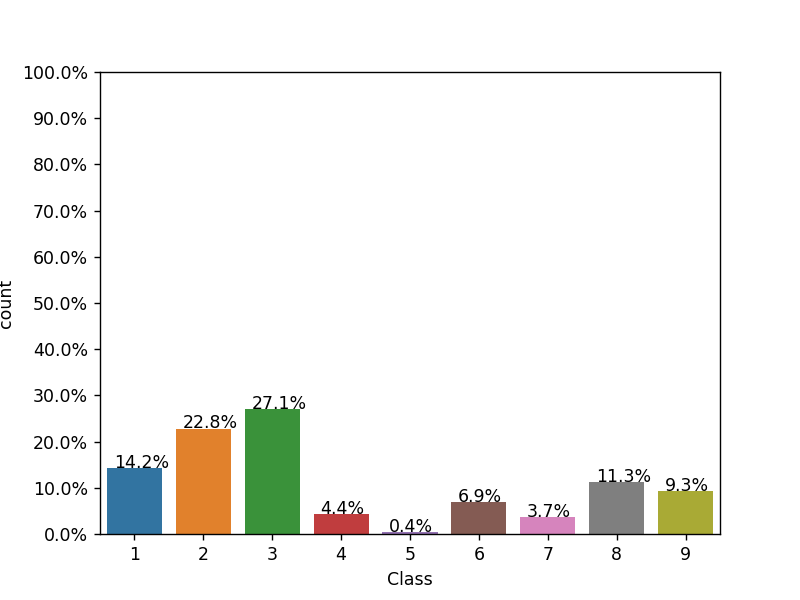

In [3]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

<h2>3.2. Feature extraction </h2>

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [79]:
#file sizes of byte files

files=os.listdir('byteFiles')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('byteFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

                     ID      size  Class
0  01azqd4InC7m9JpocGv5  4.234863      9
1  01IsoiSMh5gxyDYTl4CB  5.538818      2
2  01jsnpXSAlgw6aPeDxrU  3.887939      9
3  01kcPWA9K2BOxQeS5Rju  0.574219      1
4  01SuzwMJEIXsK7A8dQbl  0.370850      8


<h3> 3.2.2 box plots of file size (.byte files) feature </h3>

<IPython.core.display.Javascript object>


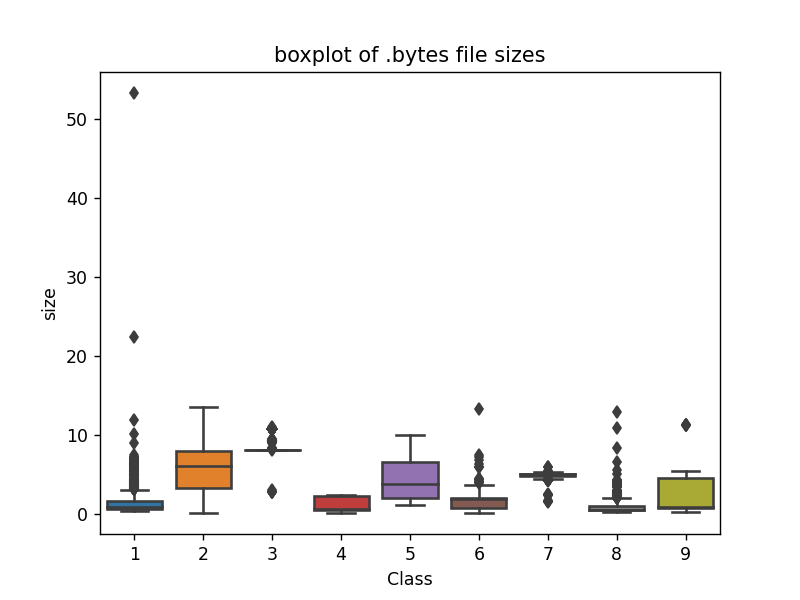

In [5]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

<h3>3.2.3 feature extraction from byte files </h3>

In [6]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000

files = os.listdir('byteFiles')
filenames=[]
array=[]
for file in files:
    if(file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open('byteFiles/'+file+".txt", 'w+')
        with open('byteFiles/'+file+".bytes","r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('byteFiles/'+file+".bytes")
        text_file.close()

files = os.listdir('byteFiles')
filenames2=[]
feature_matrix = np.zeros((len(files),257),dtype=int)
k=0


#program to convert into bag of words of bytefiles
#this is custom-built bag of words this is unigram bag of words
byte_feature_file=open('result.csv','w+')
byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
byte_feature_file.write("\n")
for file in files:
    filenames2.append(file)
    byte_feature_file.write(file+",")
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for hex_code in line:
                    if hex_code=='??':
                        feature_matrix[k][256]+=1
                    else:
                        feature_matrix[k][int(hex_code,16)]+=1
        byte_flie.close()
    for i, row in enumerate(feature_matrix[k]):
        if i!=len(feature_matrix[k])-1:
            byte_feature_file.write(str(row)+",")
        else:
            byte_feature_file.write(str(row))
    byte_feature_file.write("\n")
    
    k += 1

byte_feature_file.close()

In [80]:
byte_features=pd.read_csv("result.csv")
byte_features['ID']  = byte_features['ID'].str.split('.').str[0]
byte_features.head(2)

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   

      8  ...    f7    f8    f9    fa    fb    fc    fd     fe     ff    ??  
0  2965  ...  2804  3687  3101  3211  3097  2758  3099   2759   5753  1824  
1  9291  ...   451  6536   439   281   302  7639   518  17001  54902  8588  

[2 rows x 258 columns]

In [81]:
data_size_byte.head(2)

ID      size  Class
0  01azqd4InC7m9JpocGv5  4.234863      9
1  01IsoiSMh5gxyDYTl4CB  5.538818      2

In [82]:
byte_features_with_size = byte_features.merge(data_size_byte, on='ID')
byte_features_with_size.to_csv("result_with_size.csv")
byte_features_with_size.head(2)

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   

      8  ...    f9    fa    fb    fc    fd     fe     ff    ??      size  \
0  2965  ...  3101  3211  3097  2758  3099   2759   5753  1824  4.234863   
1  9291  ...   439   281   302  7639   518  17001  54902  8588  5.538818   

   Class  
0      9  
1      2  

[2 rows x 260 columns]

In [83]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(byte_features_with_size)

In [84]:
result.head(2)

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   

          5         6         7         8  ...       f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.01356  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.00192  0.001147  0.001329   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121236      2  

[2 rows x 260 columns]

In [12]:
data_y = result['Class']
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...        f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.013560  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.001920  0.001147  0.001329   
2  0.005280  0.005078  0.002155  0.008104  ...  0.009804  0.011777  0.012604   
3  0.000354  0.000310  0.000481  0.000959  ...  0.002121  0.001886  0.002272   
4  0.000232  0.000148  0.000229  0.000376  ...  0.001530  0.000853  0.001052   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121237      2  
2  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 260 columns]

<h3>3.2.4 Multivariate Analysis </h3>

<IPython.core.display.Javascript object>


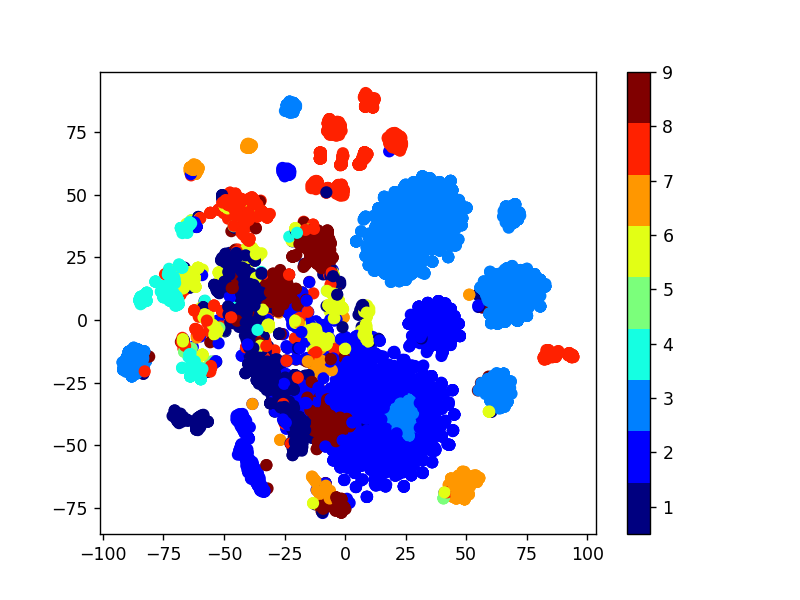

In [13]:
#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


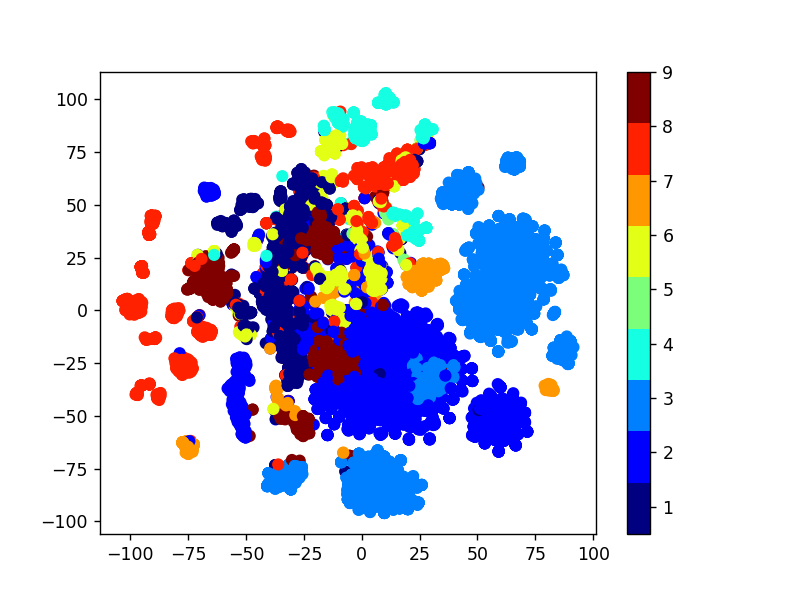

In [14]:
#this is with perplexity 30
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Train Test split

In [15]:
data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result.drop(['ID','Class'], axis=1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [16]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


<IPython.core.display.Javascript object>


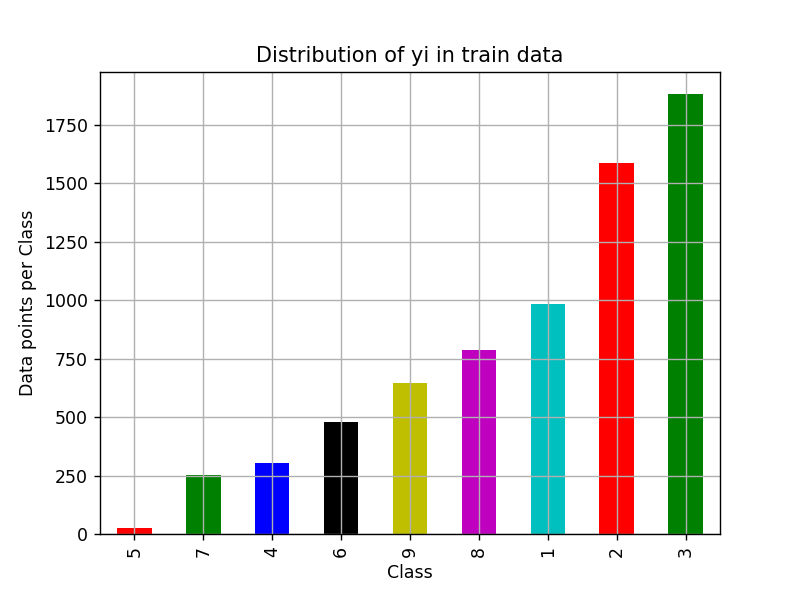

Number of data points in class 9 : 1883 ( 27.074 %)
Number of data points in class 8 : 1586 ( 22.804 %)
Number of data points in class 7 : 986 ( 14.177 %)
Number of data points in class 6 : 786 ( 11.301 %)
Number of data points in class 5 : 648 ( 9.317 %)
Number of data points in class 4 : 481 ( 6.916 %)
Number of data points in class 3 : 304 ( 4.371 %)
Number of data points in class 2 : 254 ( 3.652 %)
Number of data points in class 1 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


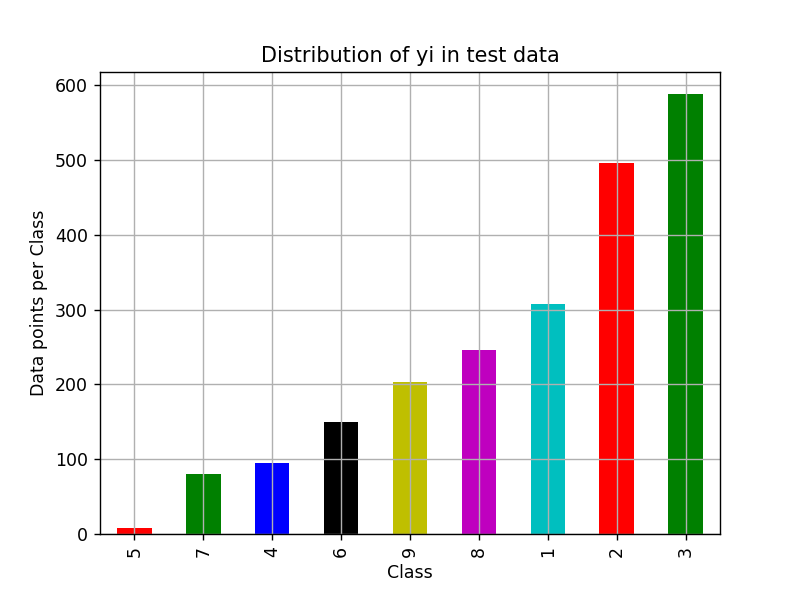

Number of data points in class 9 : 588 ( 27.047 %)
Number of data points in class 8 : 496 ( 22.815 %)
Number of data points in class 7 : 308 ( 14.167 %)
Number of data points in class 6 : 246 ( 11.316 %)
Number of data points in class 5 : 203 ( 9.338 %)
Number of data points in class 4 : 150 ( 6.9 %)
Number of data points in class 3 : 95 ( 4.37 %)
Number of data points in class 2 : 80 ( 3.68 %)
Number of data points in class 1 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


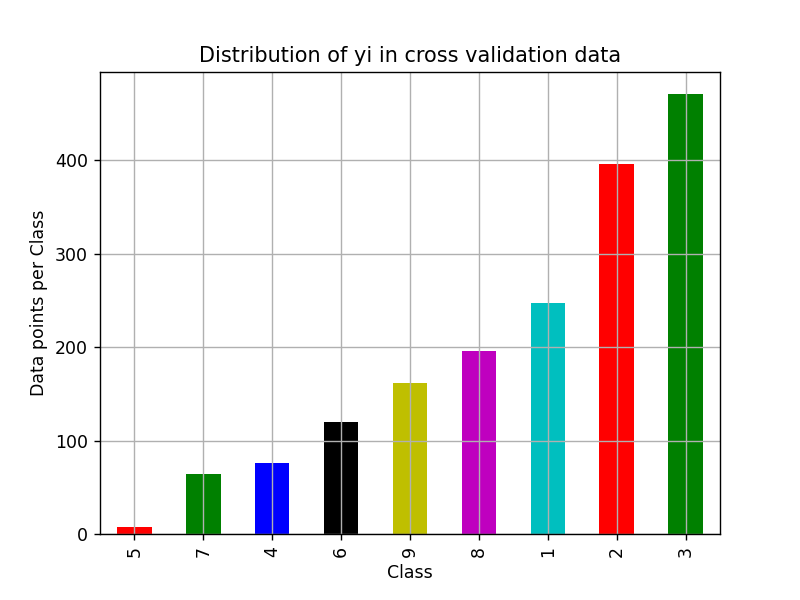

Number of data points in class 9 : 471 ( 27.085 %)
Number of data points in class 8 : 396 ( 22.772 %)
Number of data points in class 7 : 247 ( 14.204 %)
Number of data points in class 6 : 196 ( 11.271 %)
Number of data points in class 5 : 162 ( 9.316 %)
Number of data points in class 4 : 120 ( 6.901 %)
Number of data points in class 3 : 76 ( 4.37 %)
Number of data points in class 2 : 64 ( 3.68 %)
Number of data points in class 1 : 7 ( 0.403 %)


In [20]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sort_values()
test_class_distribution = y_test.value_counts().sort_values()
cv_class_distribution = y_cv.value_counts().sort_values()

my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [232]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h1>4. Machine Learning Models</h1>

<h2>4.1. Machine Leaning Models on bytes files</h2>

<h3>4.1.1. Random Model</h3>

Log loss on Cross Validation Data using Random Model 2.4560459903070195
Log loss on Test Data using Random Model 2.5070670476484134
Number of misclassified points  88.59245630174793
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


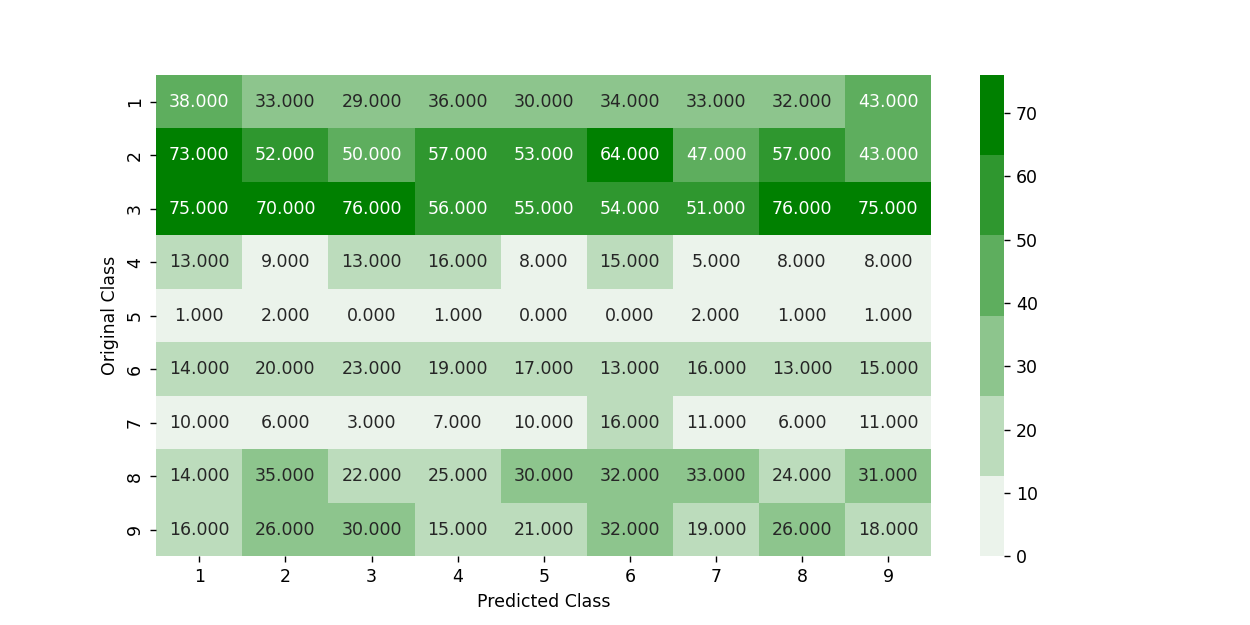

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


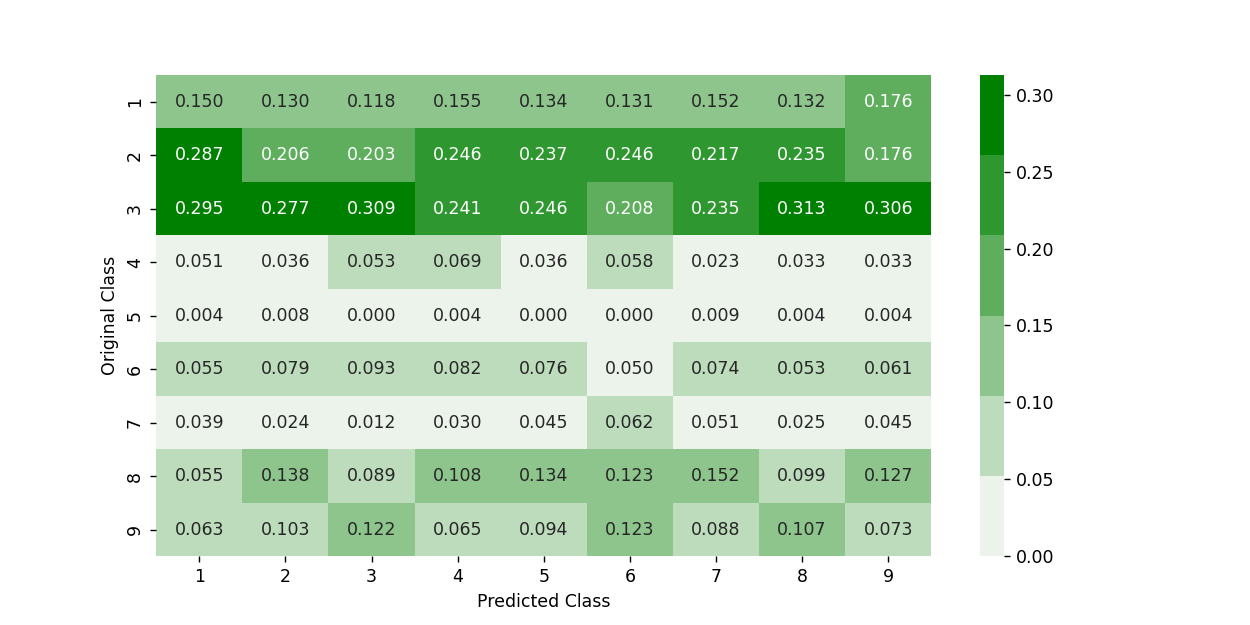

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


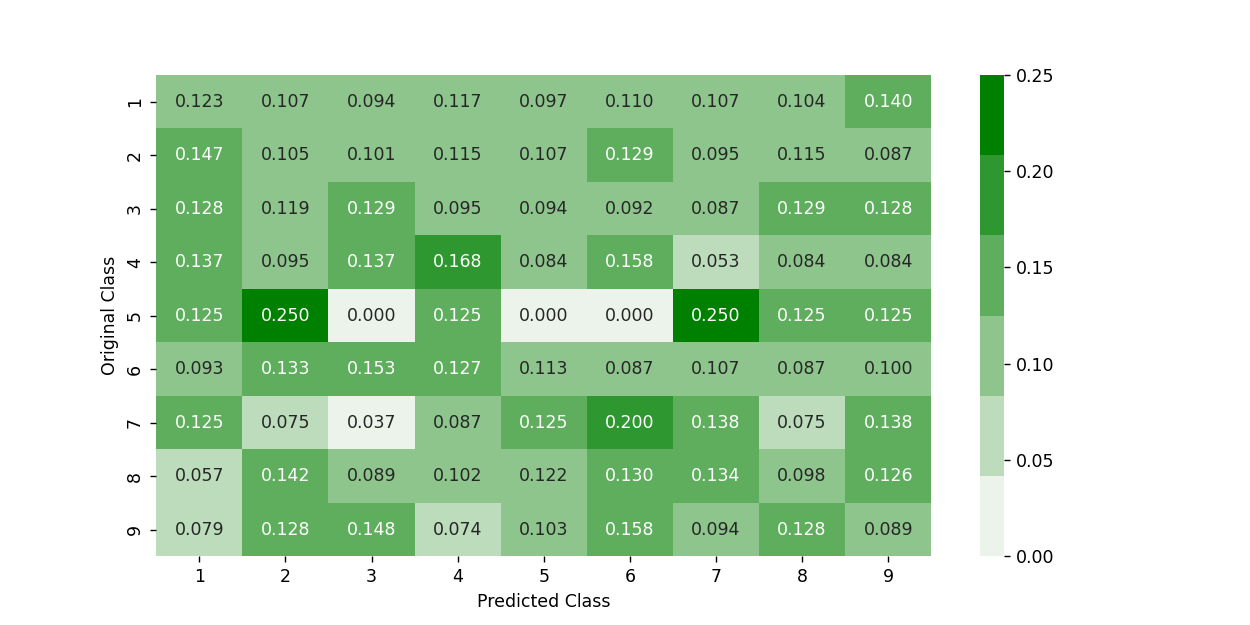

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [22]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h3>4.1.2. K Nearest Neighbour Classification</h3>

log_loss for k =  1 is 0.26585657714935307
log_loss for k =  3 is 0.25430819661342
log_loss for k =  5 is 0.27091722173061034
log_loss for k =  7 is 0.27986673270270856
log_loss for k =  9 is 0.2904348657544054
log_loss for k =  11 is 0.3009369588930093
log_loss for k =  13 is 0.31137435061754076


<IPython.core.display.Javascript object>


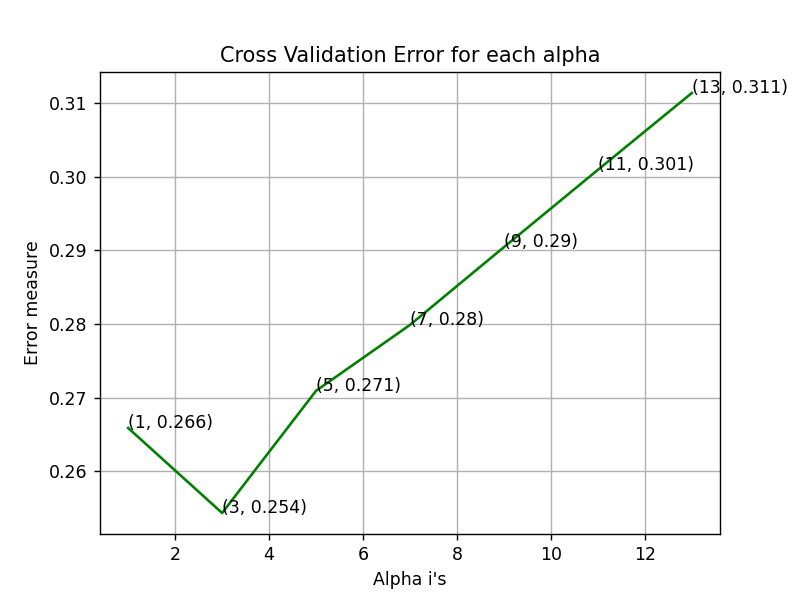

For values of best alpha =  3 The train log loss is: 0.10845575980721857
For values of best alpha =  3 The cross validation log loss is: 0.25430819661342
For values of best alpha =  3 The test log loss is: 0.22636002509484865
Number of misclassified points  5.335786568537258
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


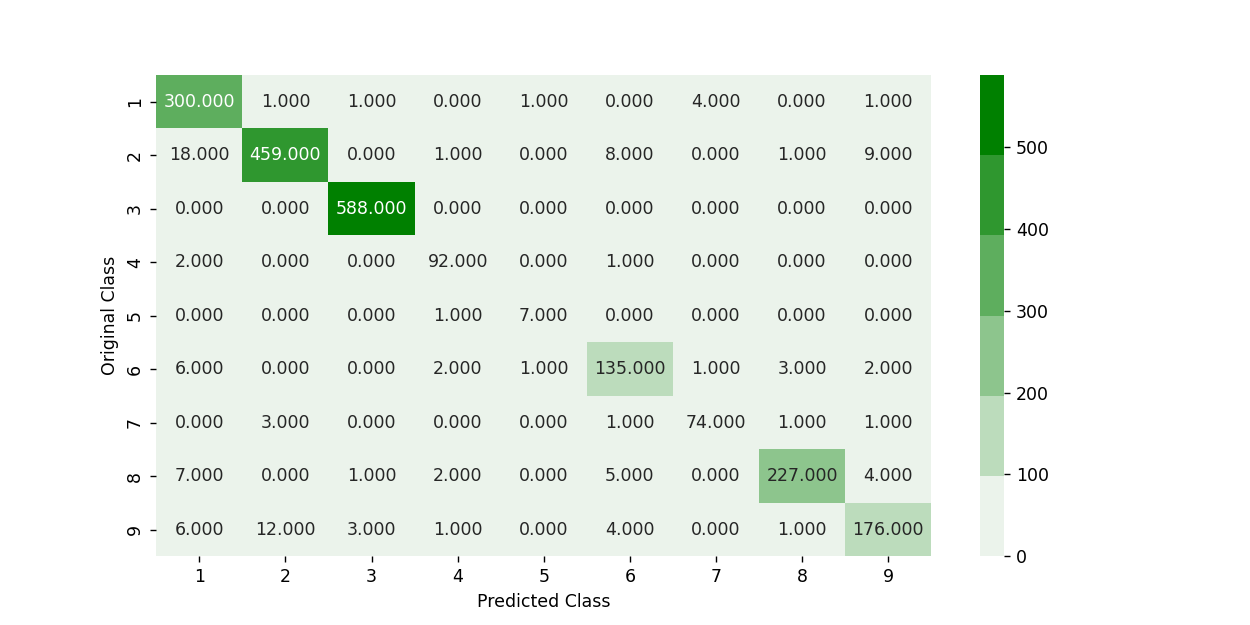

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


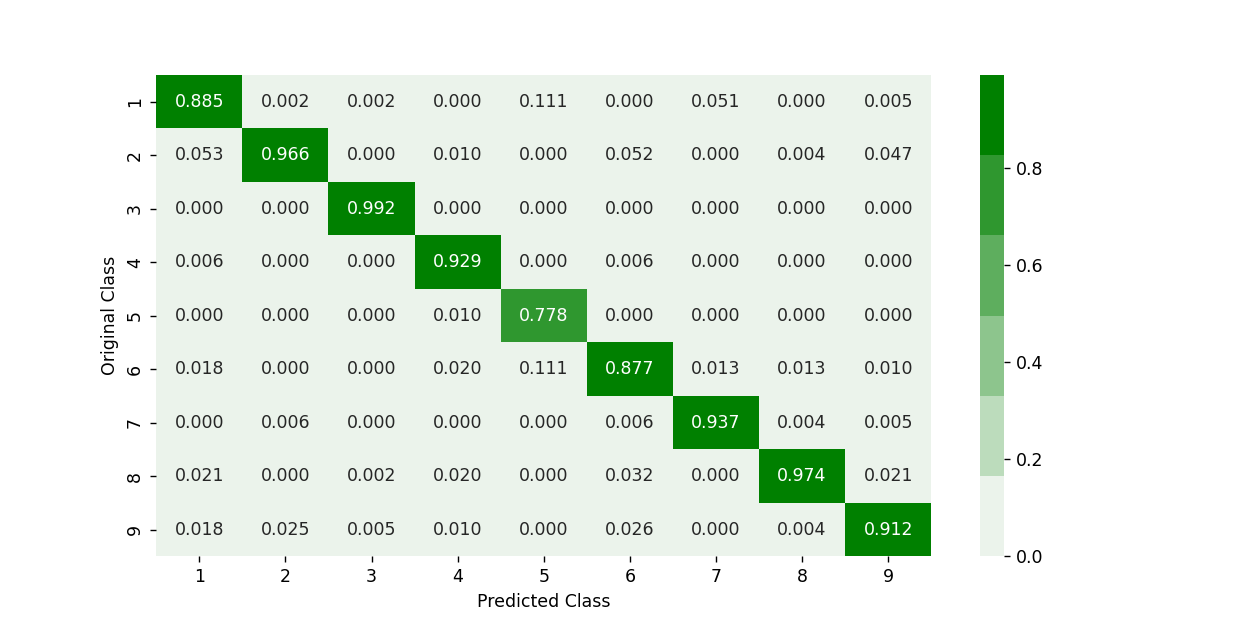

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


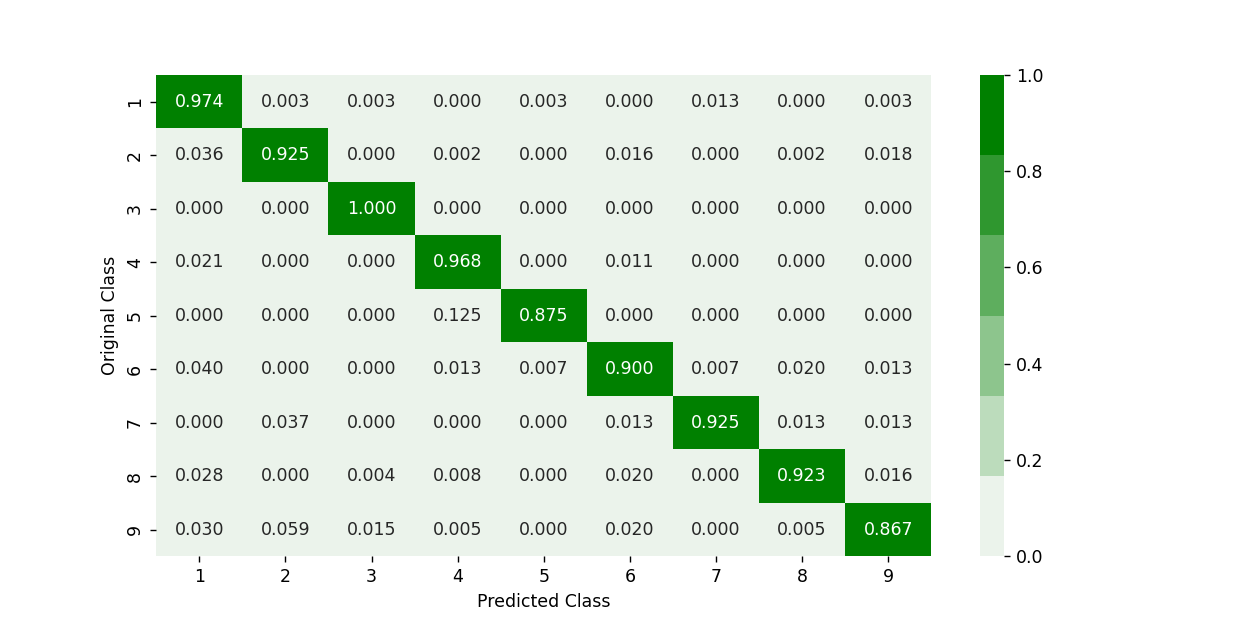

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [23]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
  
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.3. Logistic Regression</h3>

log_loss for c =  1e-05 is 1.133126951011269
log_loss for c =  0.0001 is 1.1330969903702237
log_loss for c =  0.001 is 1.1300157927588128
log_loss for c =  0.01 is 1.1049425091234697
log_loss for c =  0.1 is 1.0088784234315669
log_loss for c =  1 is 0.9603017484370724
log_loss for c =  10 is 0.8996883517057063
log_loss for c =  100 is 0.870320298220437
log_loss for c =  1000 is 0.8649566774755758


<IPython.core.display.Javascript object>


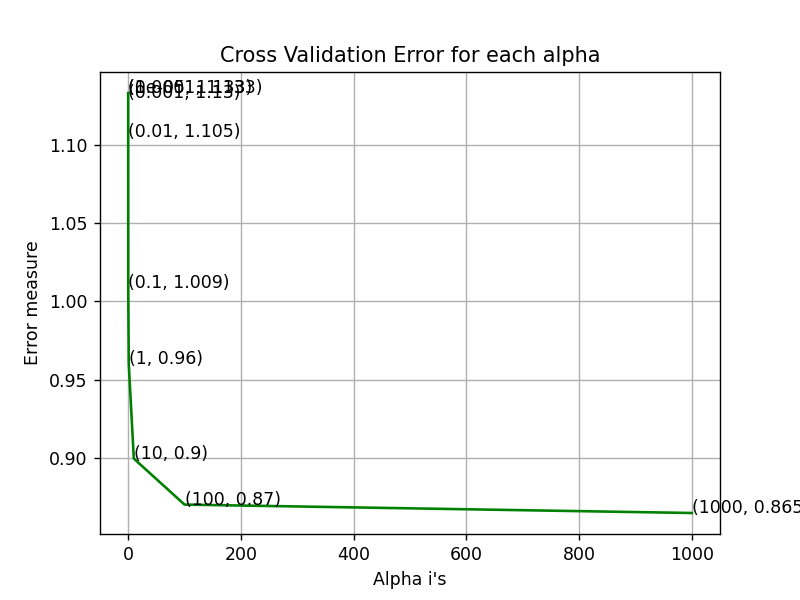

log loss for train data 0.8486358718652206
log loss for cv data 0.8649566774755758
log loss for test data 0.8753172376985842
Number of misclassified points  28.88684452621895
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


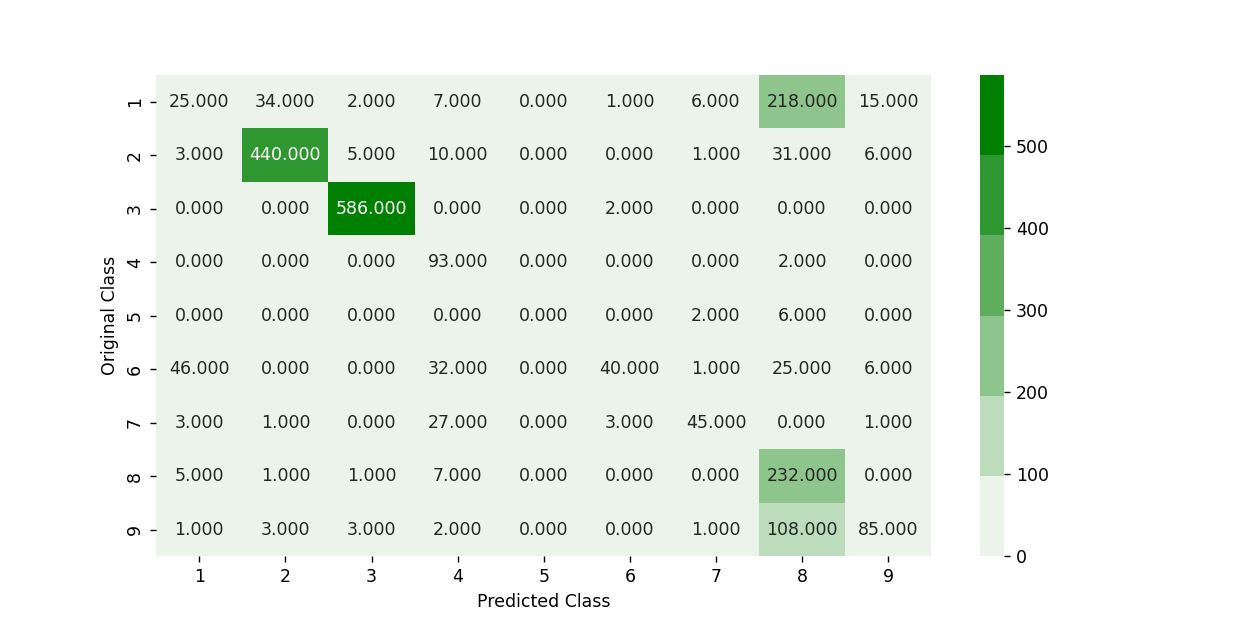

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


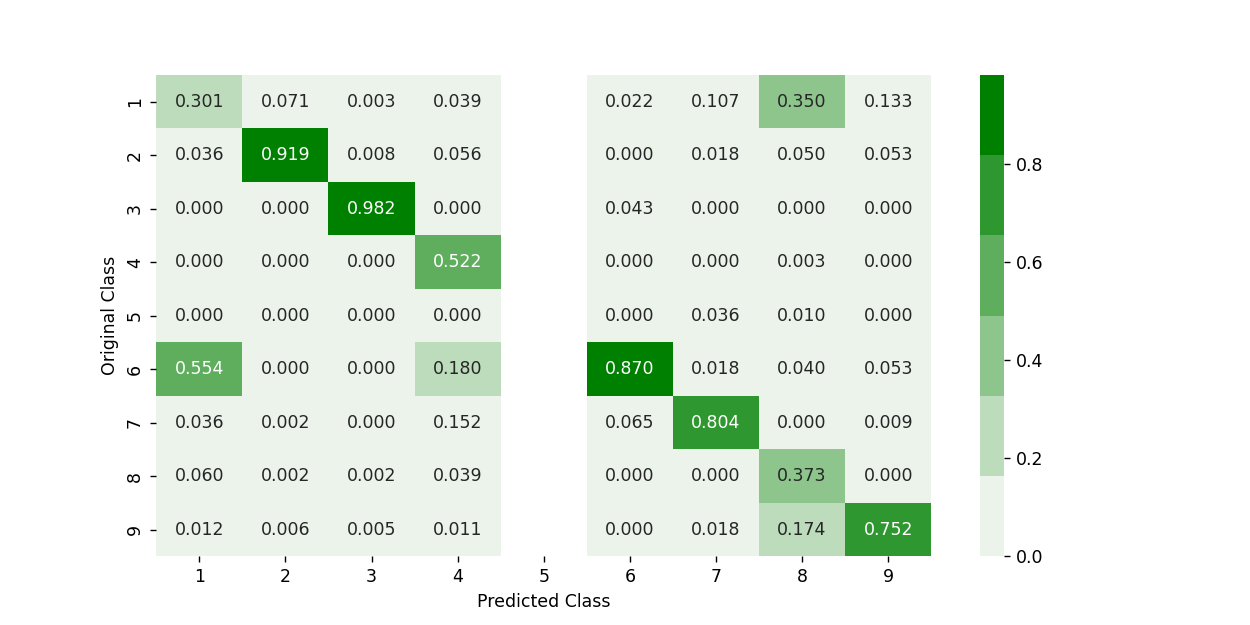

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


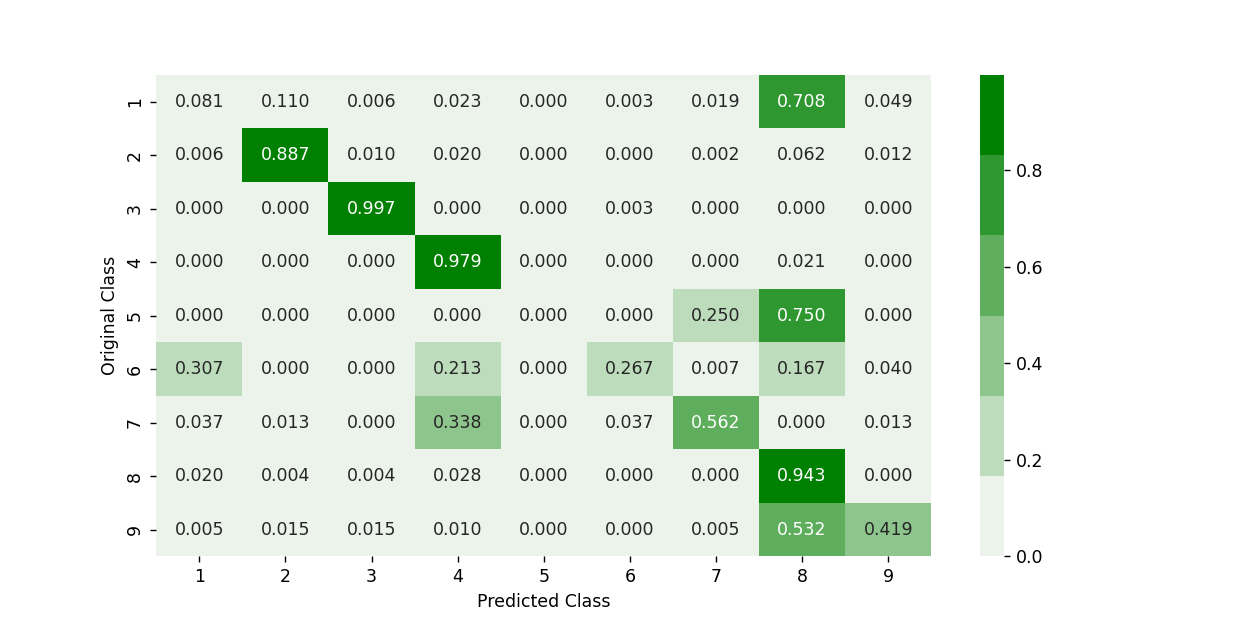

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [27]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3> 4.1.4. Random Forest Classifier </h3>

log_loss for c =  10 is 0.0895601114035449
log_loss for c =  50 is 0.0775818860778236
log_loss for c =  100 is 0.07621364450442558
log_loss for c =  500 is 0.07474055072888088
log_loss for c =  1000 is 0.0744148315444644
log_loss for c =  2000 is 0.07423978207265658
log_loss for c =  3000 is 0.07453189575382695


<IPython.core.display.Javascript object>


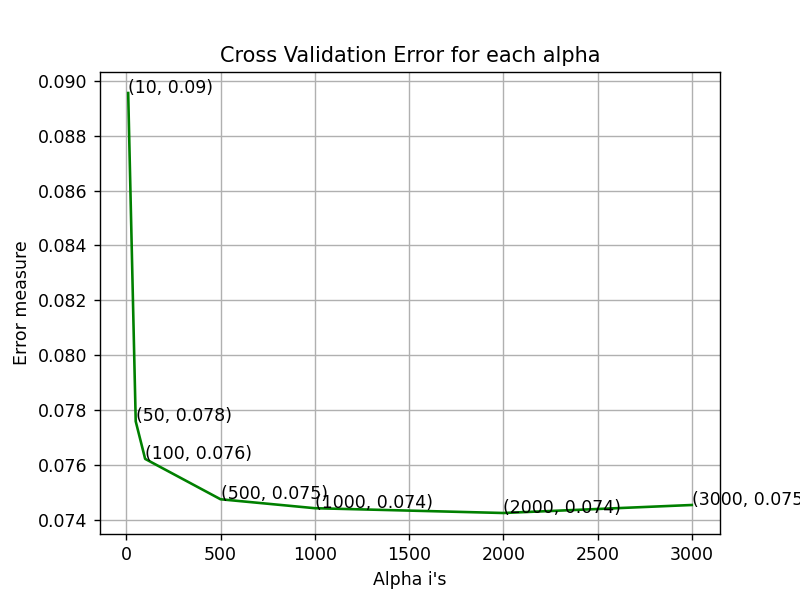

For values of best alpha =  2000 The train log loss is: 0.025998528080294295
For values of best alpha =  2000 The cross validation log loss is: 0.07423978207265658
For values of best alpha =  2000 The test log loss is: 0.08545194622532871
Number of misclassified points  1.701931922723091
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


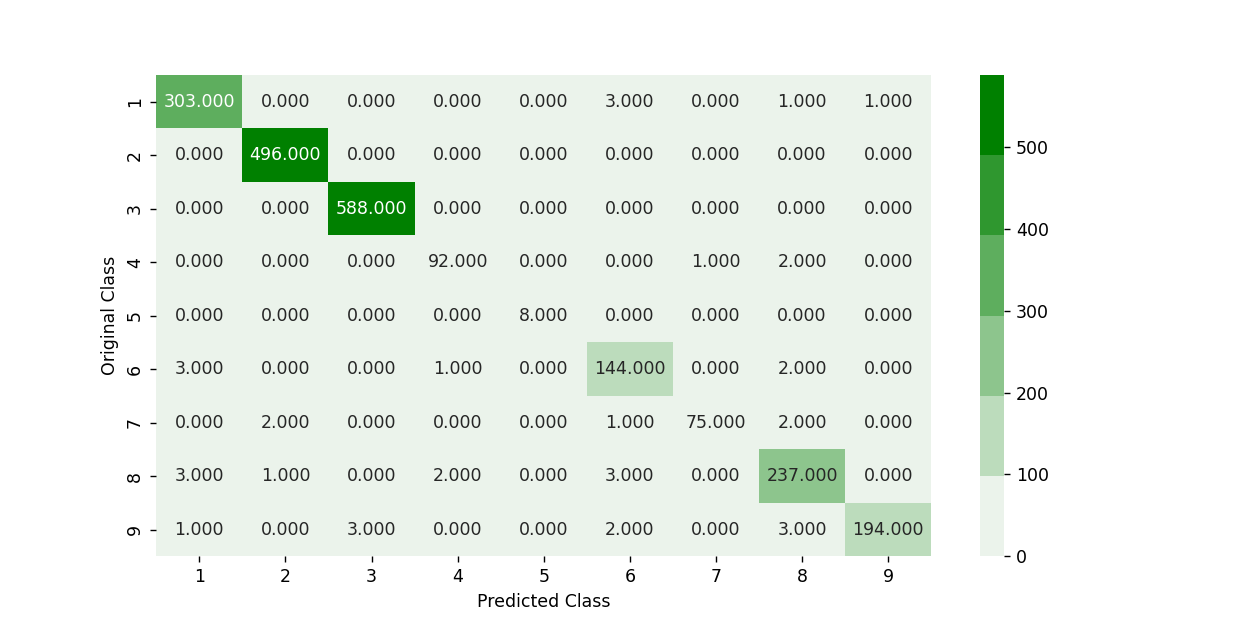

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


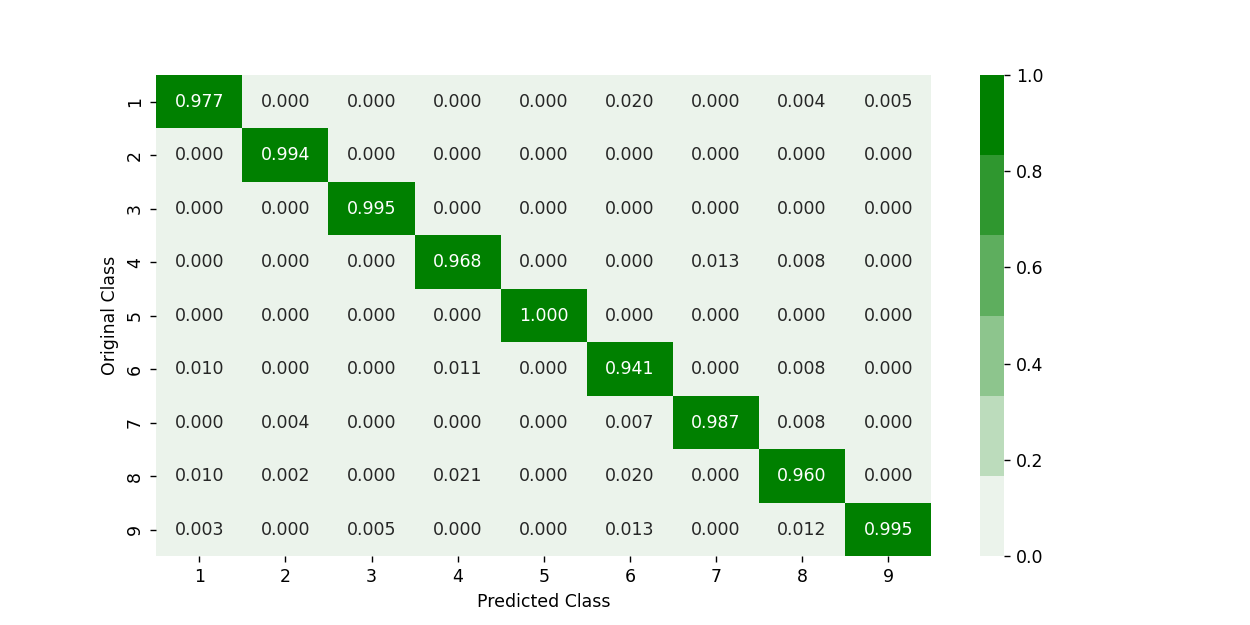

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


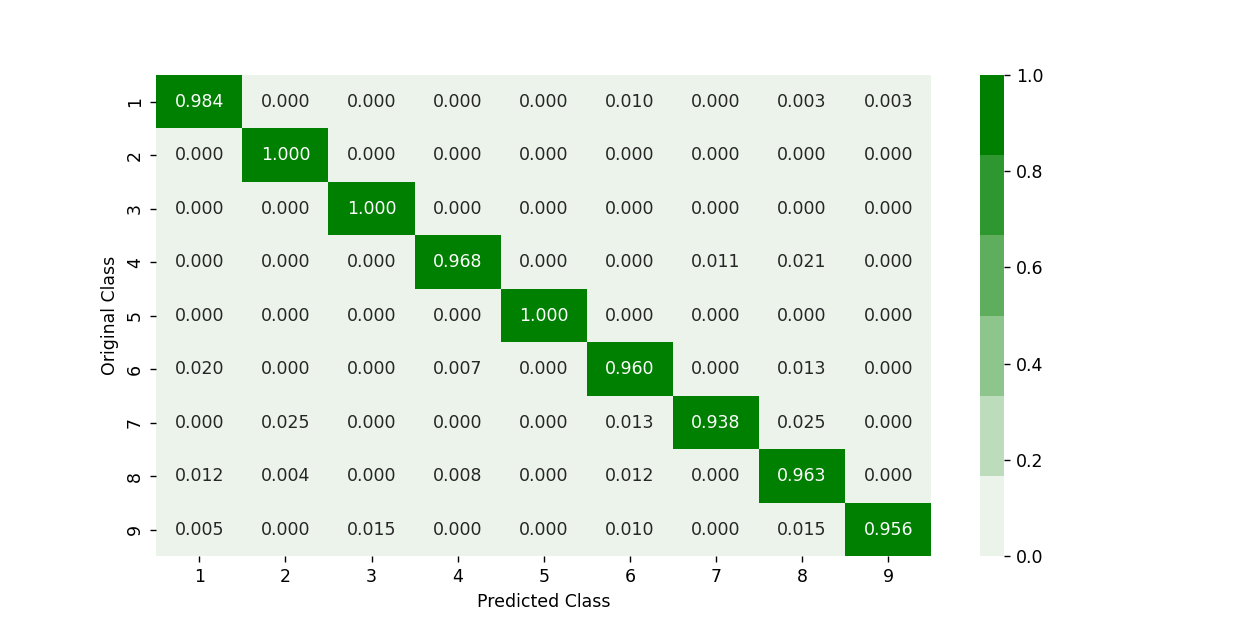

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [28]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification</h3>

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

log_loss for c =  10 is 5.544351339431283
log_loss for c =  50 is 5.801273775885963
log_loss for c =  100 is 5.816001466345653
log_loss for c =  500 is 5.838867574503967
log_loss for c =  1000 is 5.84406742564601
log_loss for c =  2000 is 5.851841299206421


<IPython.core.display.Javascript object>


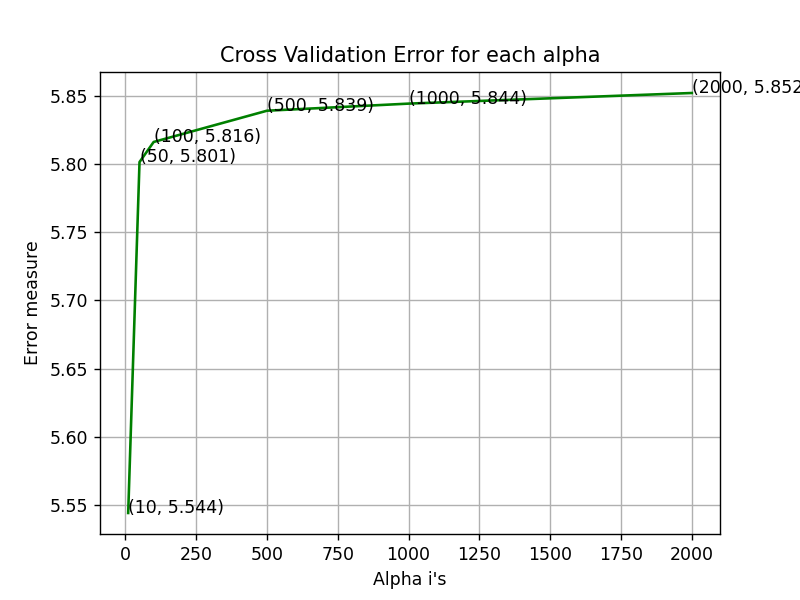

For values of best alpha =  10 The train log loss is: 0.03755726948885271
For values of best alpha =  10 The cross validation log loss is: 0.10418484818833337
For values of best alpha =  10 The test log loss is: 0.09239643327812046
Number of misclassified points  99.90800367985281
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


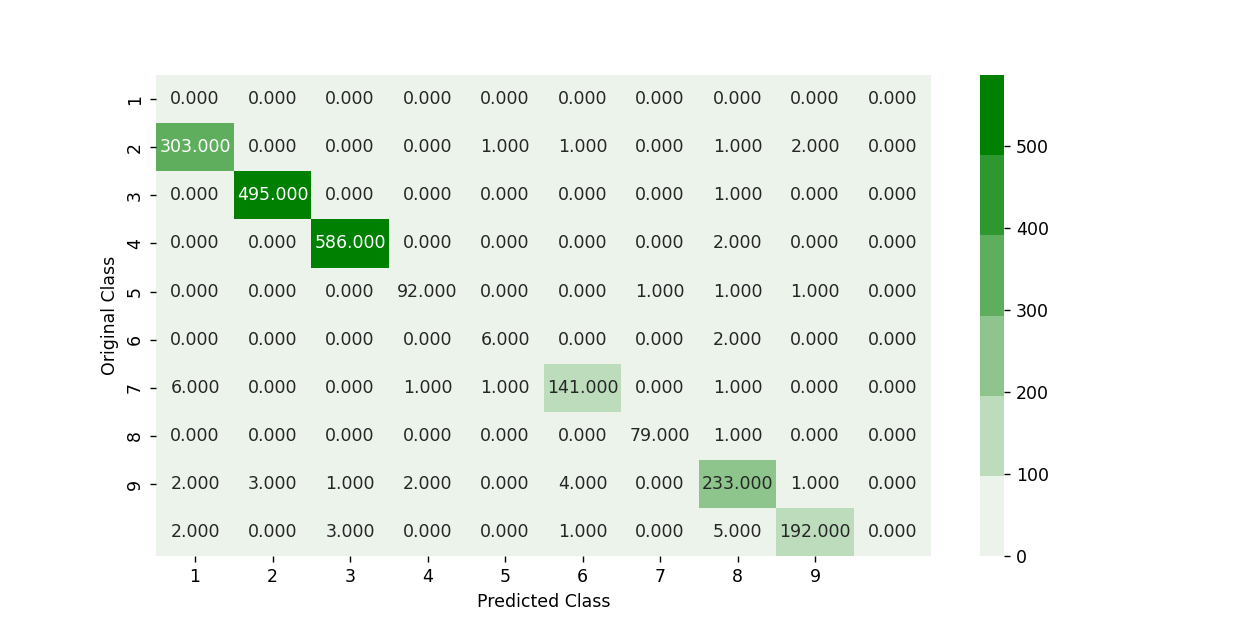

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


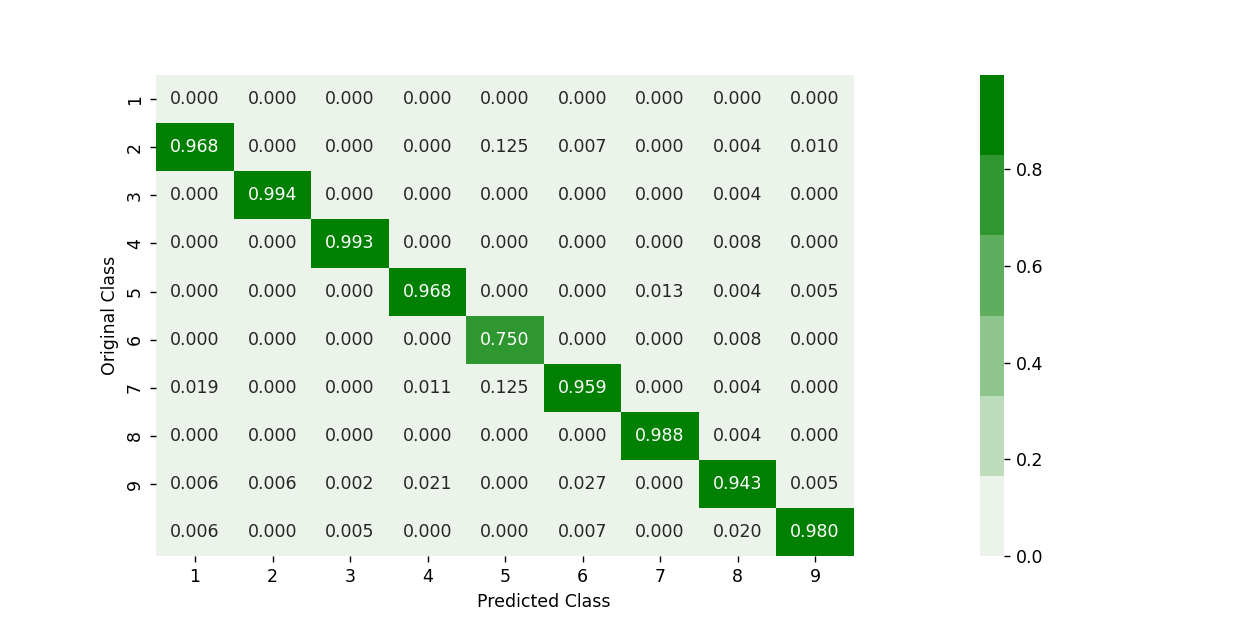

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1. nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


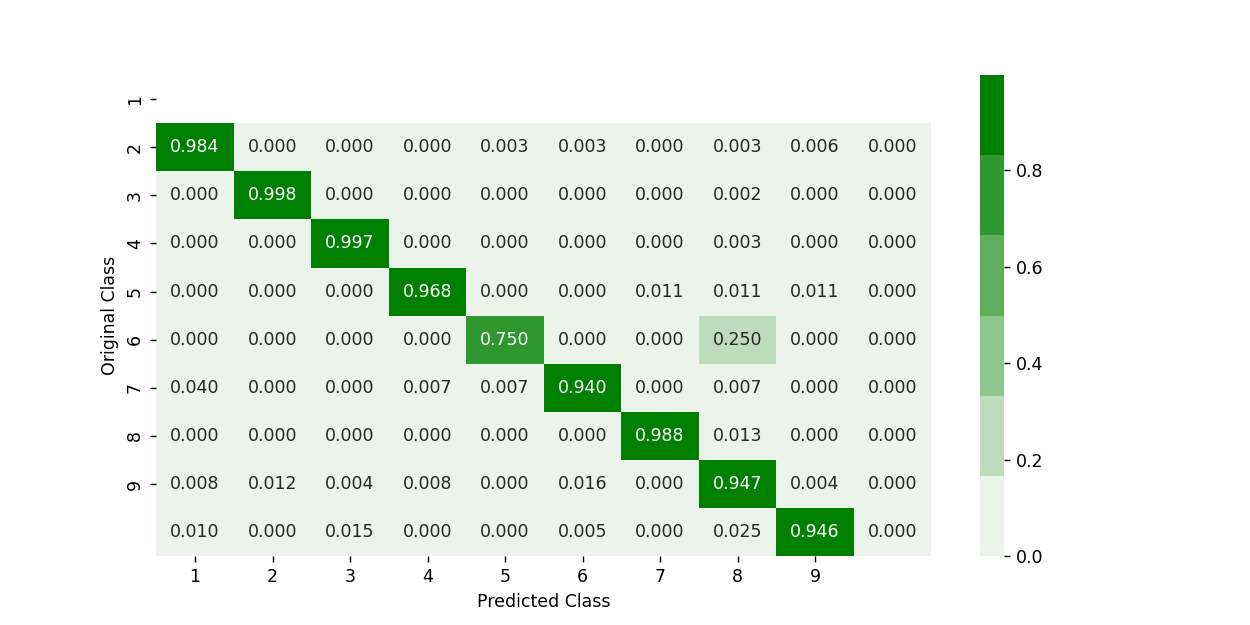

Sum of rows in precision matrix [nan  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [34]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification with best hyper parameters using RandomSearch </h3>

In [35]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_c...
                                           monotone_constraints=None,
                                           n

In [36]:
print (random_cfl1.best_params_)

{'subsample': 0.5, 'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.3}


In [37]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=2000, learning_rate=0.05, colsample_bytree=1, max_depth=3)
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

train loss 0.021931105922952863
cv loss 0.08337830230973779
test loss 0.07598662042003079


<h2> 4.2 Modeling with .asm files </h2>

<pre>
There are 10868 files of asm 
All the files make up about 150 GB
The asm files contains :
1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs
With the help of parallel processing we extracted all the features.In parallel we can use all the cores that are present in our computer.


Here we extracted 52 features from all the asm files which are important.

We read the top solutions and handpicked the features from those papers/videos/blogs. <br> Refer:https://www.kaggle.com/c/malware-classification/discussion
</pre>

<h3> 4.2.1 Feature extraction from asm files </h3>

<p>
<li> To extract the unigram features from the .asm files we need to process ~150GB of data </li>
<li style="font-size:18px"><b>Note: Below two cells will take lot of time (over 48 hours to complete)</b></li>
<li> We will provide you the output file of these two cells, which you can directly use it </li>
</p>

In [39]:
#intially create five folders
#first 
#second
#third
#fourth
#fifth
#this code tells us about random split of files into five folders
folder_1 ='first'
folder_2 ='second'
folder_3 ='third'
folder_4 ='fourth'
folder_5 ='fifth'
folder_6 = 'output'
for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

source='train/'
files = os.listdir('train')
#ID=df['Id'].tolist()
data=list(range(0,10868))
r.shuffle(data)
count=0
for i in range(0,10868):
    if i % 5==0:
        shutil.move(source+files[data[i]],'first')
    elif i%5==1:
        shutil.move(source+files[data[i]],'second')
    elif i%5 ==2:
        shutil.move(source+files[data[i]],'third')
    elif i%5 ==3:
        shutil.move(source+files[data[i]],'fourth')
    elif i%5==4:
        shutil.move(source+files[data[i]],'fifth')

IndexError: list index out of range

In [49]:
files = os.listdir('train')
len(files)

SyntaxError: EOL while scanning string literal (2375676242.py, line 1)

In [ ]:

#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def firstprocess():
    #The prefixes tells about the segments that are present in the asm files
    #There are 450 segments(approx) present in all asm files.
    #this prefixes are best segments that gives us best values.
    #https://en.wikipedia.org/wiki/Data_segment
    
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    #this are opcodes that are used to get best results
    #https://en.wikipedia.org/wiki/X86_instruction_listings
    
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    #best keywords that are taken from different blogs
    keywords = ['.dll','std::',':dword']
    #Below taken registers are general purpose registers and special registers
    #All the registers which are taken are best 
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\asmsmallfile.txt","w+")
    files = os.listdir('first')
    for f in files:
        #filling the values with zeros into the arrays
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        # https://docs.python.org/3/library/codecs.html#codecs.ignore_errors
        # https://docs.python.org/3/library/codecs.html#codecs.Codec.encode
        with codecs.open('first/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                # https://www.tutorialspoint.com/python3/string_rstrip.htm
                line=lines.rstrip().split()
                l=line[0]
                #counting the prefixs in each and every line
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                #counting the opcodes in each and every line
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                #counting registers in the line
                for i in range(len(registers)):
                    for li in line:
                        # we will use registers only in 'text' and 'CODE' segments
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                #counting keywords in the line
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        #pushing the values into the file after reading whole file
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


#same as above 
def secondprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\mediumasmfile.txt","w+")
    files = os.listdir('second')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('second/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()

# same as smallprocess() functions
def thirdprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\largeasmfile.txt","w+")
    files = os.listdir('third')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('third/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fourthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\hugeasmfile.txt","w+")
    files = os.listdir('fourth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fourth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fifthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\trainasmfile.txt","w+")
    files = os.listdir('fifth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fifth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def main():
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    manager=multiprocessing.Manager() 	
    p1=Process(target=firstprocess)
    p2=Process(target=secondprocess)
    p3=Process(target=thirdprocess)
    p4=Process(target=fourthprocess)
    p5=Process(target=fifthprocess)
    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    #After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()

if __name__=="__main__":
    main()

In [85]:
# asmoutputfile.csv(output genarated from the above two cells) will contain all the extracted features from .asm files
# this file will be uploaded in the drive, you can directly use this
dfasm=pd.read_csv("asmoutputfile.csv")
Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y,on='ID', how='left')
result_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  edx  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   18   66   15   43   83    0   17   48   29   
1        0        0       3  ...   18   29   48   82   12    0   14    0   20   
2      145        0       3  ...   13   42   10   67   14    0   11    0    9   
3        0        0       3  ...    6    8   14    7    2    0    8    0    6   
4        0        0       3  ...   12    9   18   29    5    0   11    0   11   

   Class  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 53 columns]

<h4> 4.2.1.1 Files sizes of each .asm file </h4>

In [86]:
#file sizes of byte files

files=os.listdir('asmFiles')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('asmFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

                     ID       size  Class
0  01azqd4InC7m9JpocGv5  56.229886      9
1  01IsoiSMh5gxyDYTl4CB  13.999378      2
2  01jsnpXSAlgw6aPeDxrU   8.507785      9
3  01kcPWA9K2BOxQeS5Rju   0.078190      1
4  01SuzwMJEIXsK7A8dQbl   0.996723      8


<h4> 4.2.1.2 Distribution of .asm file sizes</h4>

<IPython.core.display.Javascript object>


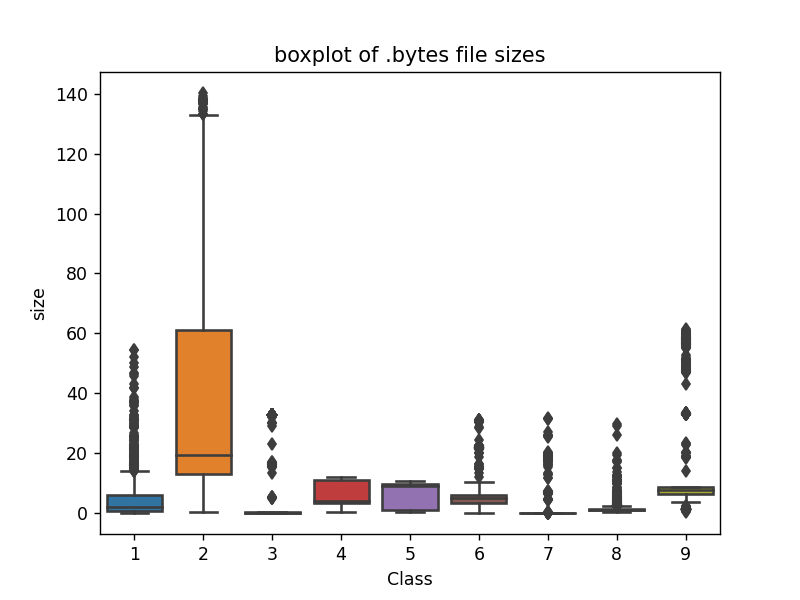

In [52]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [87]:
# add the file size feature to previous extracted features
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(result_asm, asm_size_byte.drop(['Class'], axis=1),on='ID', how='left')
result_asm.head()

(10868, 53)
(10868, 3)


ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   66   15   43   83    0   17   48   29   
1        0        0       3  ...   29   48   82   12    0   14    0   20   
2      145        0       3  ...   42   10   67   14    0   11    0    9   
3        0        0       3  ...    8   14    7    2    0    8    0    6   
4        0        0       3  ...    9   18   29    5    0   11    0   11   

   Class      size  
0      1  0.078190  
1      1  0.063400  
2      1  0.041695  
3      1  0.018757  
4      1  0.037567  

[5 rows x 54 columns]

In [88]:
# we normalize the data each column 
result_asm = normalize(result_asm)
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx       ecx  \
0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360  0.001057   
1  0.000000      0.0  0.000072  ...  0.000328  0.000965  0.000686  0.000153   
2  0.000038      0.0  0.000072  ...  0.000475  0.000201  0.000560  0.000178   
3  0.000000      0.0  0.000072  ...  0.000090  0.000281  0.000059  0.000025   
4  0.000000      0.0  0.000072  ...  0.000102  0.000362  0.000243  0.000064   

   edi       ebp       esp       eip  Class      size  
0  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

<h3> 4.2.2 Univariate analysis on  asm file features</h3>

<IPython.core.display.Javascript object>


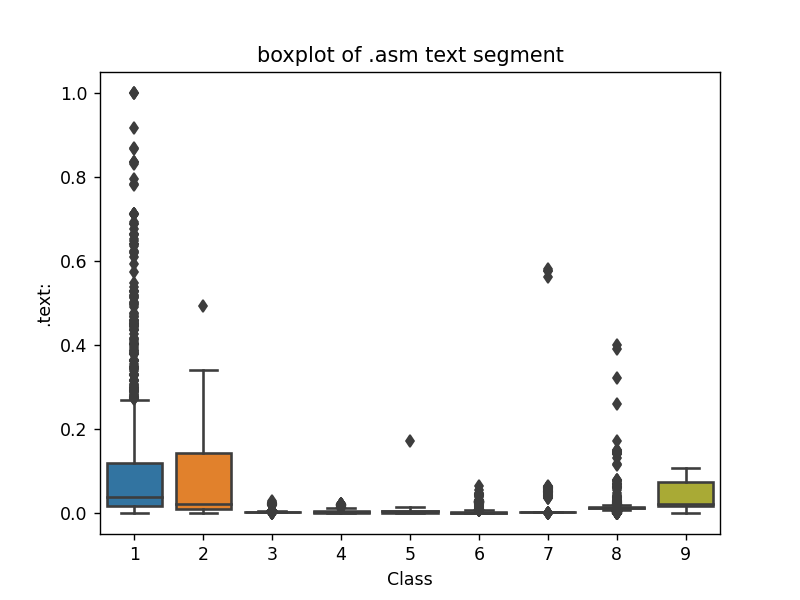

In [55]:
ax = sns.boxplot(x="Class", y=".text:", data=result_asm)
plt.title("boxplot of .asm text segment")
plt.show()

<pre>
The plot is between Text and class 
Class 1,2 and 9 can be easly separated
</pre>

<IPython.core.display.Javascript object>


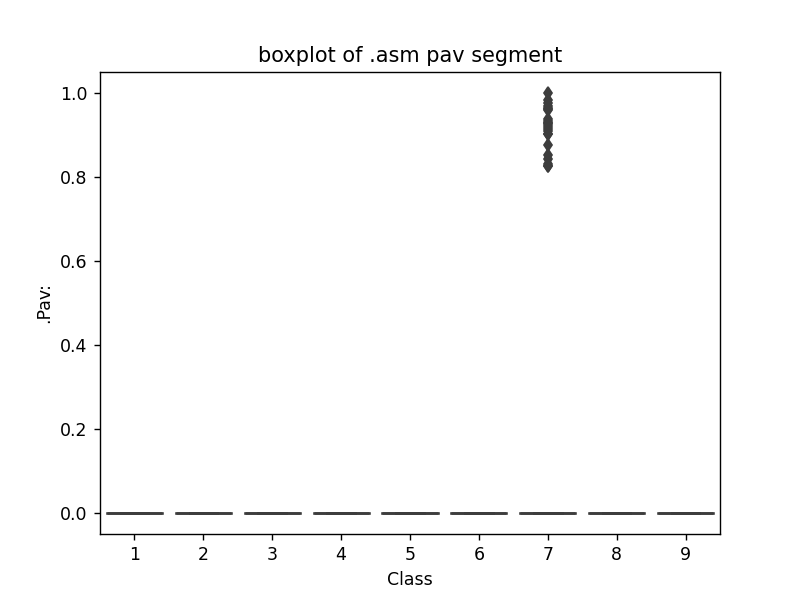

In [56]:
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm pav segment")
plt.show()

<IPython.core.display.Javascript object>


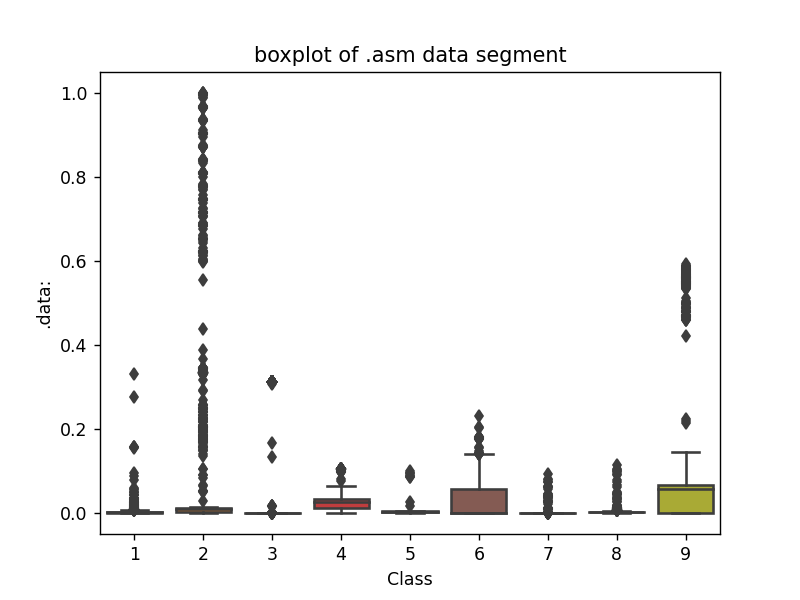

In [57]:
ax = sns.boxplot(x="Class", y=".data:", data=result_asm)
plt.title("boxplot of .asm data segment")
plt.show()

<pre>
The plot is between data segment and class label 
class 6 and class 9 can be easily separated from given points
</pre>

<IPython.core.display.Javascript object>


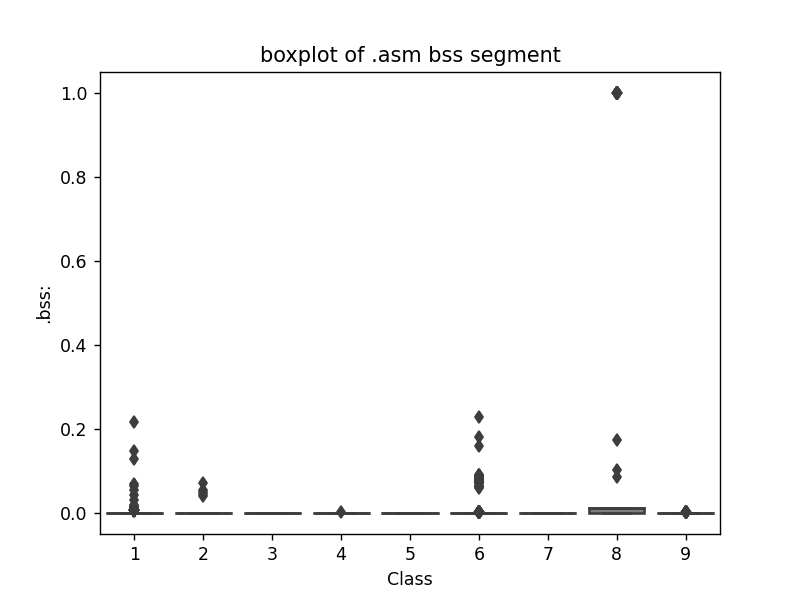

In [58]:
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm bss segment")
plt.show()

<pre>
plot between bss segment and class label
very less number of files are having bss segment
</pre>

<IPython.core.display.Javascript object>


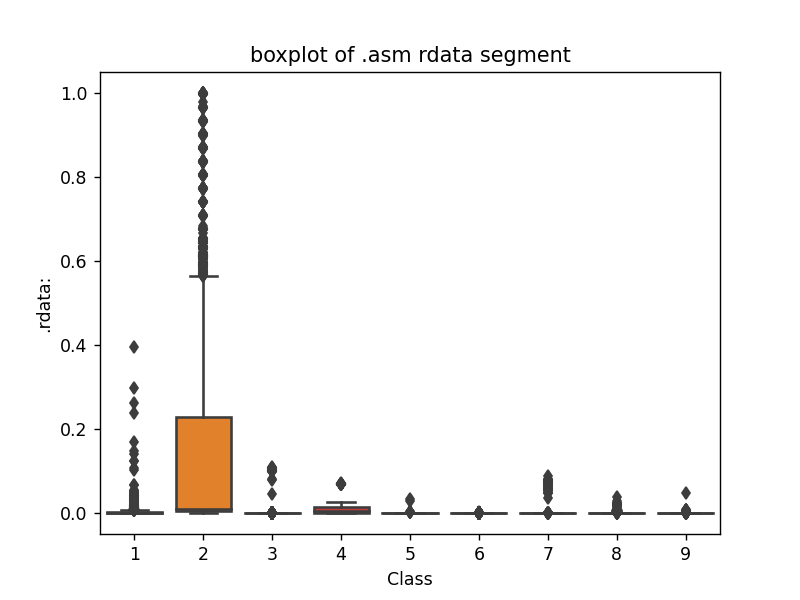

In [59]:
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm rdata segment")
plt.show()

<pre>
Plot between rdata segment and Class segment
Class 2 can be easily separated 75 pecentile files are having 1M rdata lines
</pre>

<IPython.core.display.Javascript object>


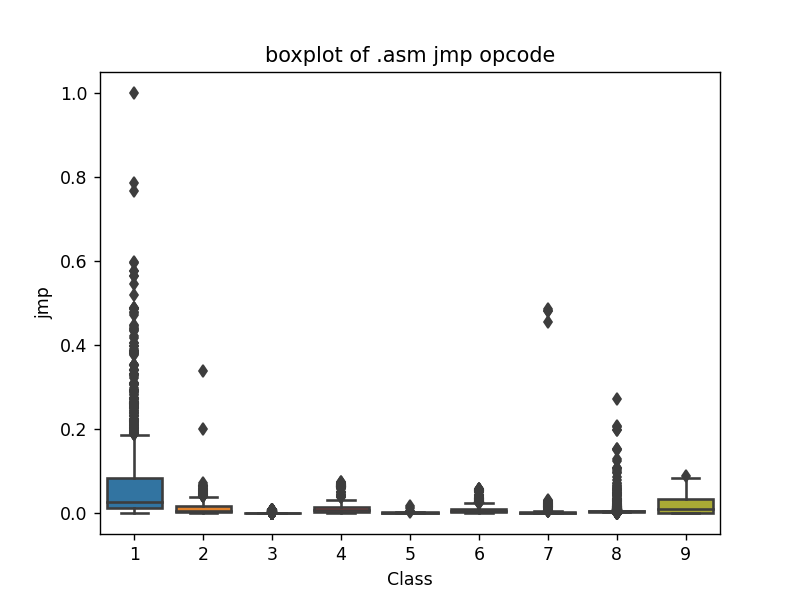

In [60]:
ax = sns.boxplot(x="Class", y="jmp", data=result_asm)
plt.title("boxplot of .asm jmp opcode")
plt.show()

<pre>
plot between jmp and Class label
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


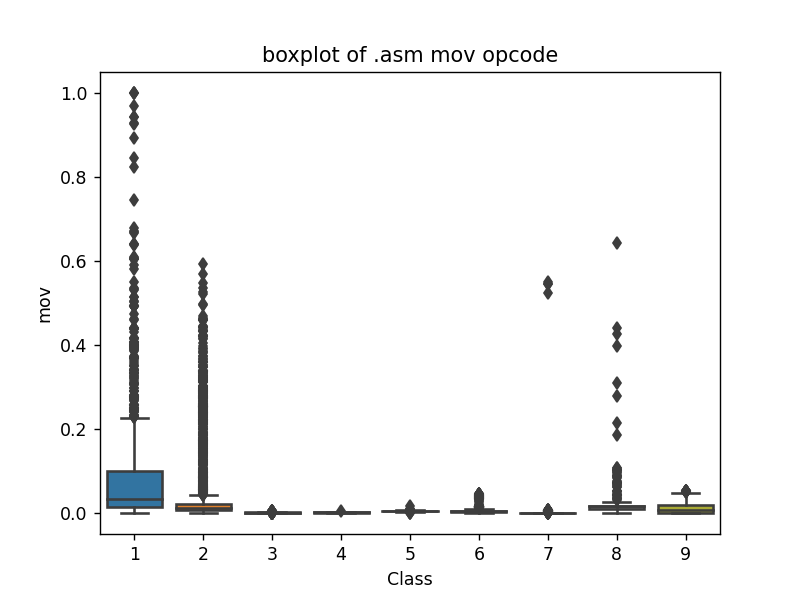

In [61]:
ax = sns.boxplot(x="Class", y="mov", data=result_asm)
plt.title("boxplot of .asm mov opcode")
plt.show()

<pre>
plot between Class label and mov opcode
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


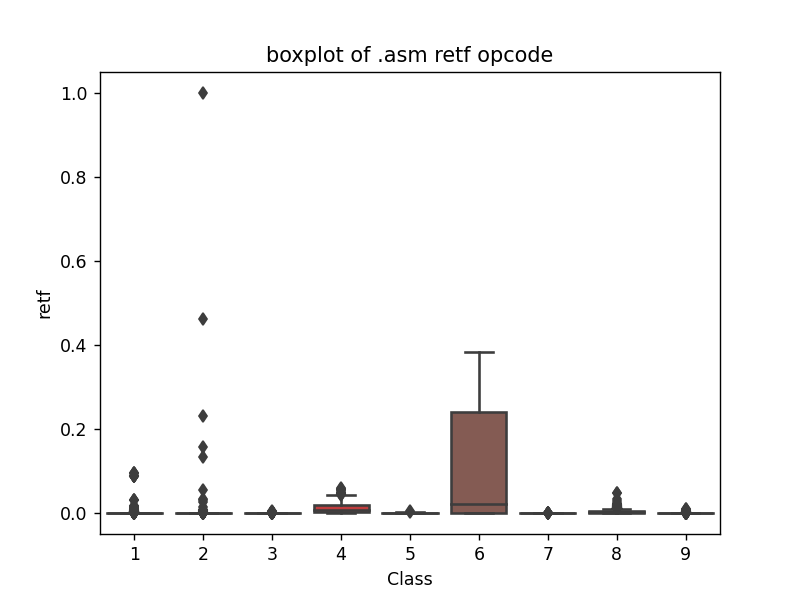

In [62]:
ax = sns.boxplot(x="Class", y="retf", data=result_asm)
plt.title("boxplot of .asm retf opcode")
plt.show()

<pre>
plot between Class label and retf
Class 6 can be easily separated with opcode retf
The frequency of retf is approx of 250.
</pre>

<IPython.core.display.Javascript object>


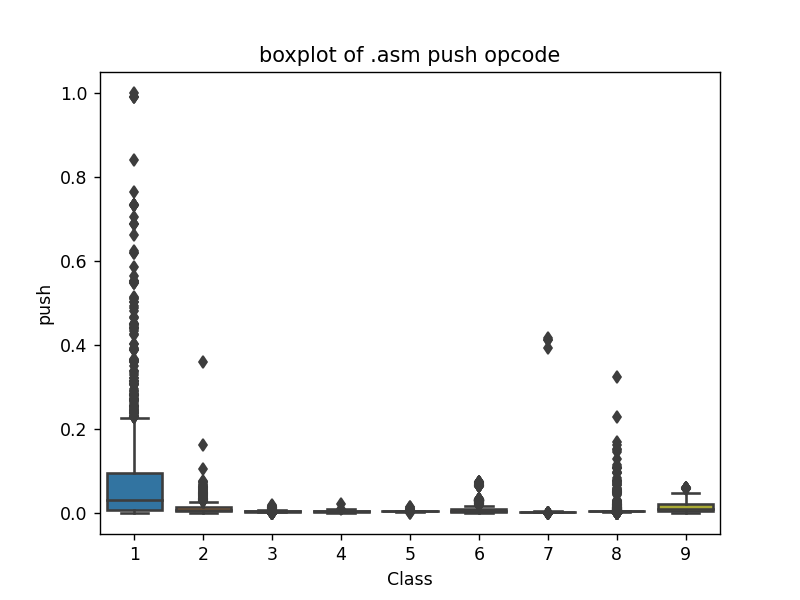

In [63]:
ax = sns.boxplot(x="Class", y="push", data=result_asm)
plt.title("boxplot of .asm push opcode")
plt.show()

<pre>
plot between push opcode and Class label
Class 1 is having 75 precentile files with push opcodes of frequency 1000
</pre>

<h3> 4.2.2 Multivariate Analysis on .asm file features </h3>

<IPython.core.display.Javascript object>


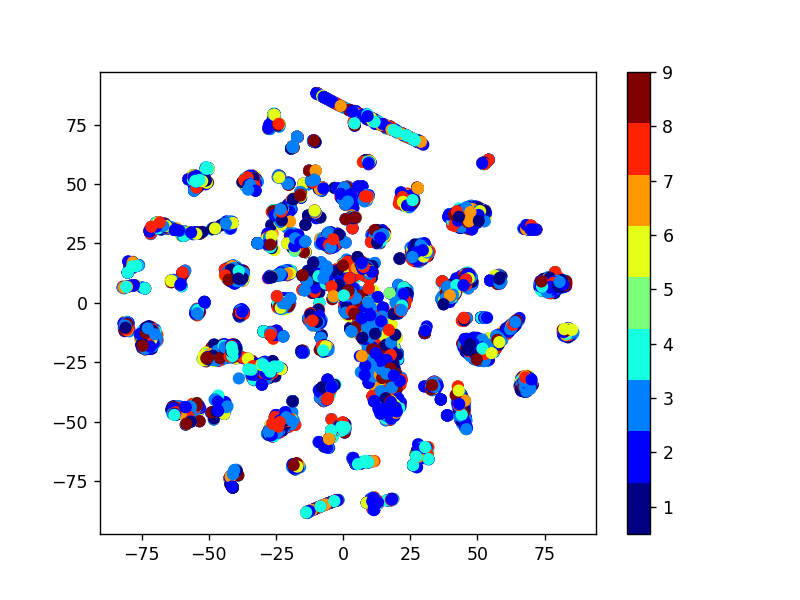

In [64]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_asm.drop(['ID','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


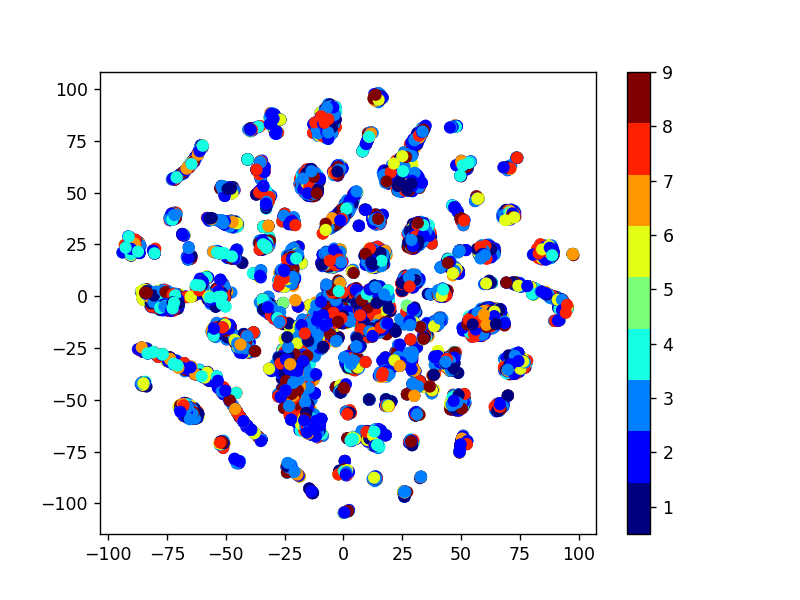

In [65]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_asm.drop(['ID','Class', 'rtn', '.BSS:', '.CODE','size'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<pre>
TSNE for asm data with perplexity 50
</pre>

<h3> 4.2.3 Conclusion on EDA</h3>

<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways
<ul>
<li>1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less </li>
<li>2. Each feature has its unique importance in separating the Class labels.</li>
</ul>
</li>
</p>

<h2> 4.3 Train and test split</h2>

In [66]:
asm_y = result_asm['Class']
asm_x = result_asm.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)

In [67]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [68]:
print( X_cv_asm.isnull().all())

HEADER:    False
.text:     False
.Pav:      False
.idata:    False
.data:     False
.bss:      False
.rdata:    False
.edata:    False
.rsrc:     False
.tls:      False
.reloc:    False
jmp        False
mov        False
retf       False
push       False
pop        False
xor        False
retn       False
nop        False
sub        False
inc        False
dec        False
add        False
imul       False
xchg       False
or         False
shr        False
cmp        False
call       False
shl        False
ror        False
rol        False
jnb        False
jz         False
lea        False
movzx      False
.dll       False
std::      False
:dword     False
edx        False
esi        False
eax        False
ebx        False
ecx        False
edi        False
ebp        False
esp        False
eip        False
size       False
dtype: bool


<h2> 4.4. Machine Learning models on features of .asm files</h2>

<h3> 4.4.1 K-Nearest Neigbors </h3>

log_loss for k =  1 is 0.08586304882232029
log_loss for k =  3 is 0.0905029112935375
log_loss for k =  5 is 0.10636203511960195
log_loss for k =  7 is 0.11562697448786967
log_loss for k =  9 is 0.12490008972313248
log_loss for k =  11 is 0.1345807051392687
log_loss for k =  13 is 0.14427180537847012
log_loss for k =  15 is 0.15260284858654344
log_loss for k =  17 is 0.1583883315230491
log_loss for k =  19 is 0.16547766409137335


<IPython.core.display.Javascript object>


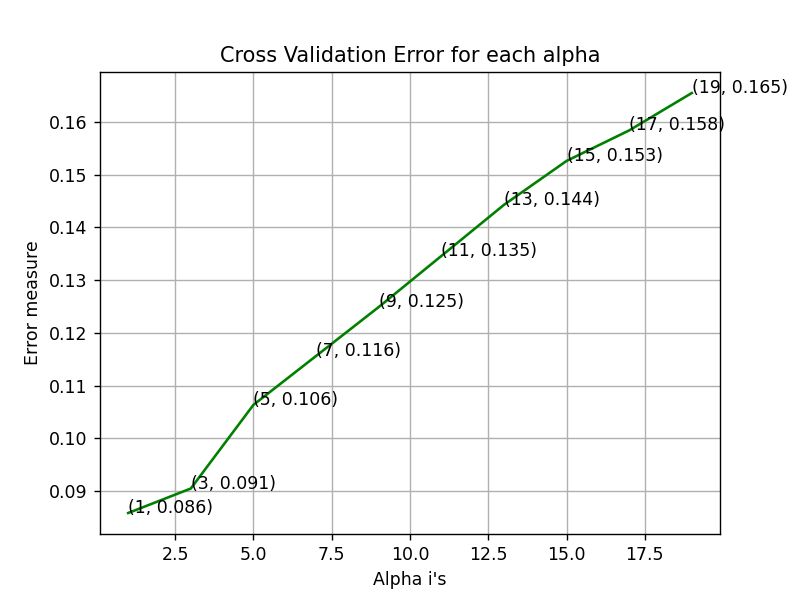

log loss for train data 0.027176999447492425
log loss for cv data 0.08586304882232029
log loss for test data 0.0939938565430514
Number of misclassified points  1.609935602575897
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


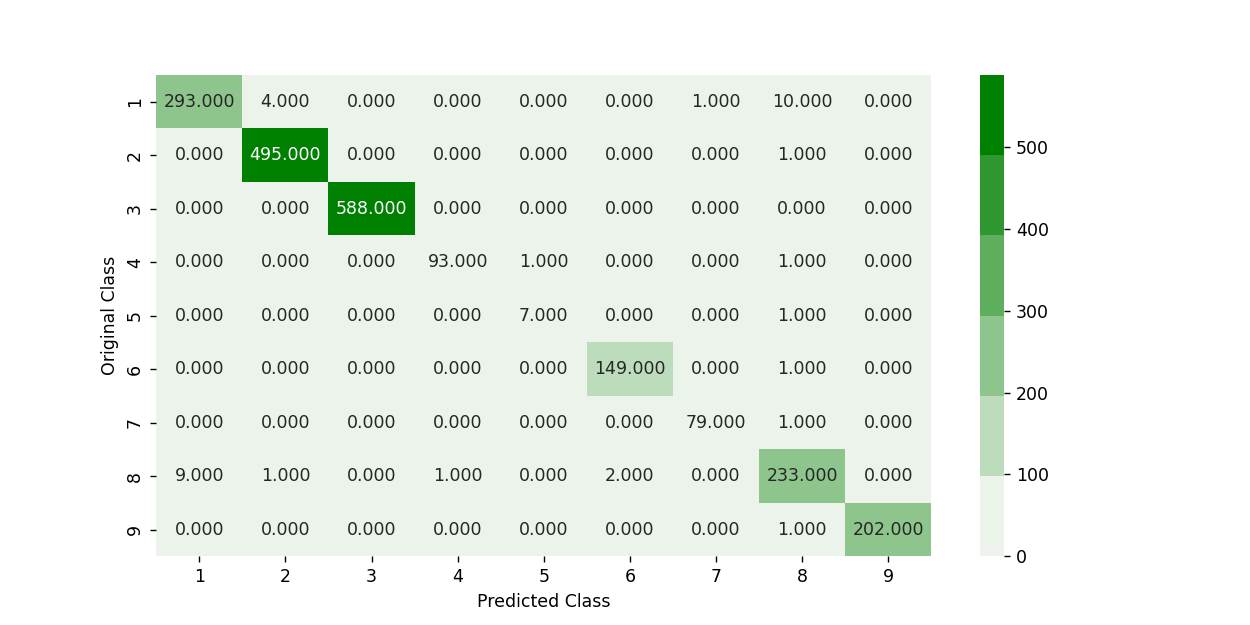

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


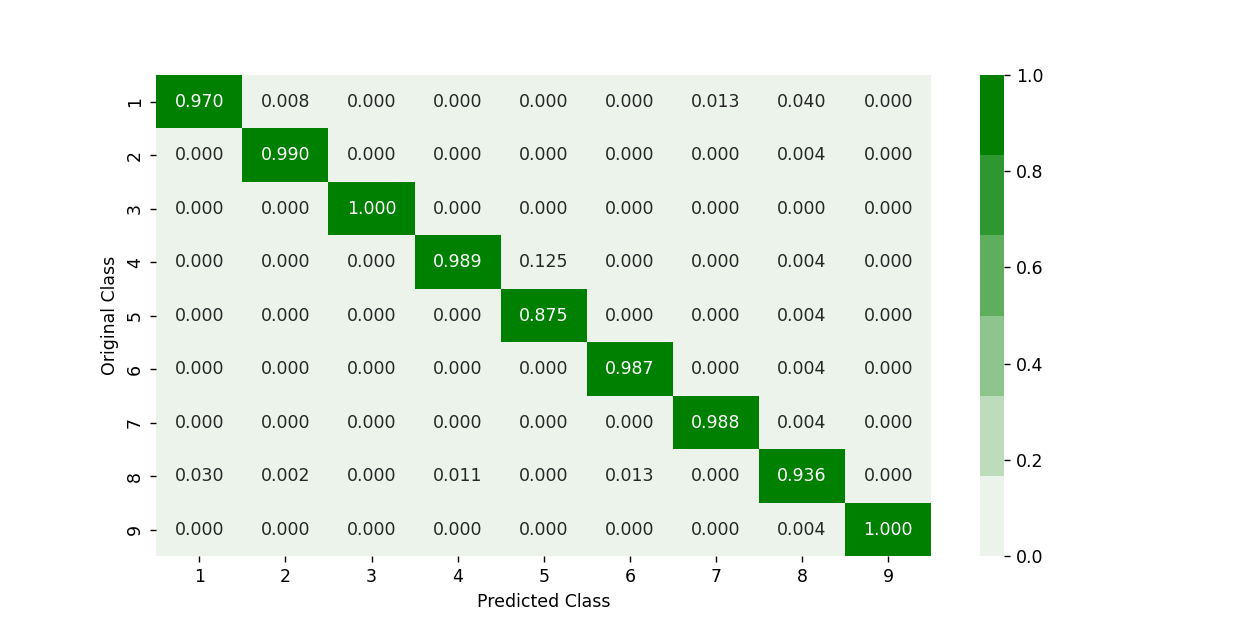

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


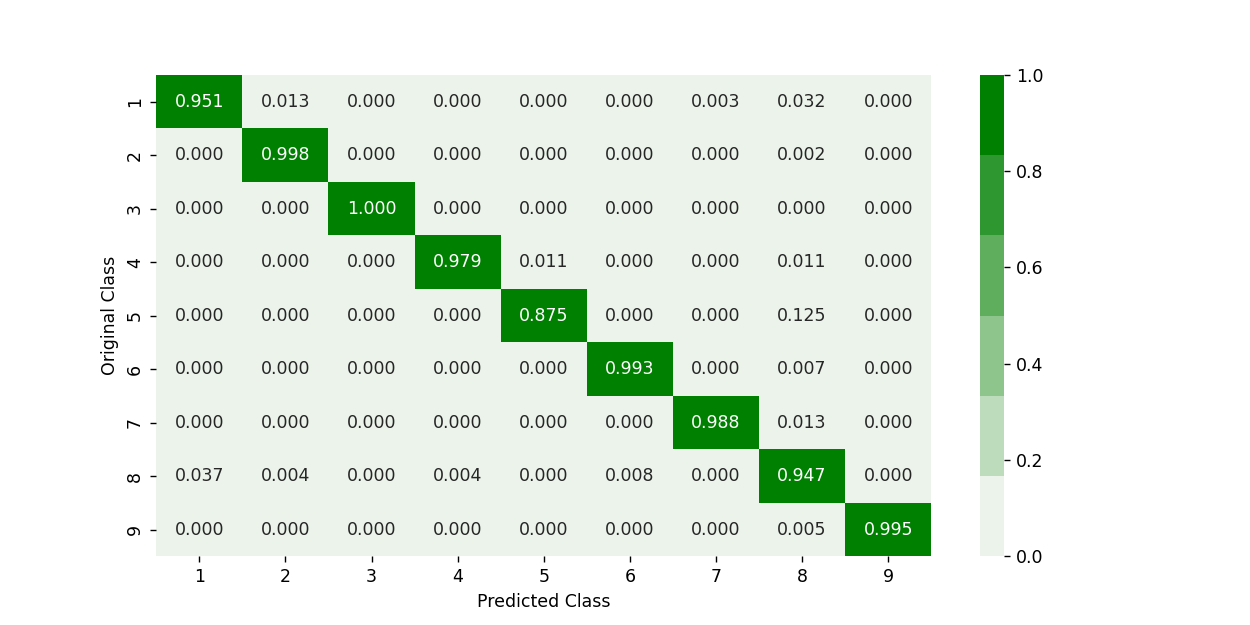

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [69]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.2 Logistic Regression </h3>

log_loss for c =  1e-05 is 1.2921238363030976
log_loss for c =  0.0001 is 1.2918906827871675
log_loss for c =  0.001 is 1.2891883432944096
log_loss for c =  0.01 is 1.2530988784833763
log_loss for c =  0.1 is 1.0495387090060828
log_loss for c =  1 is 1.2104794504632295
log_loss for c =  10 is 1.248045131054808
log_loss for c =  100 is 1.1996223696790715
log_loss for c =  1000 is 1.1872450562042371


<IPython.core.display.Javascript object>


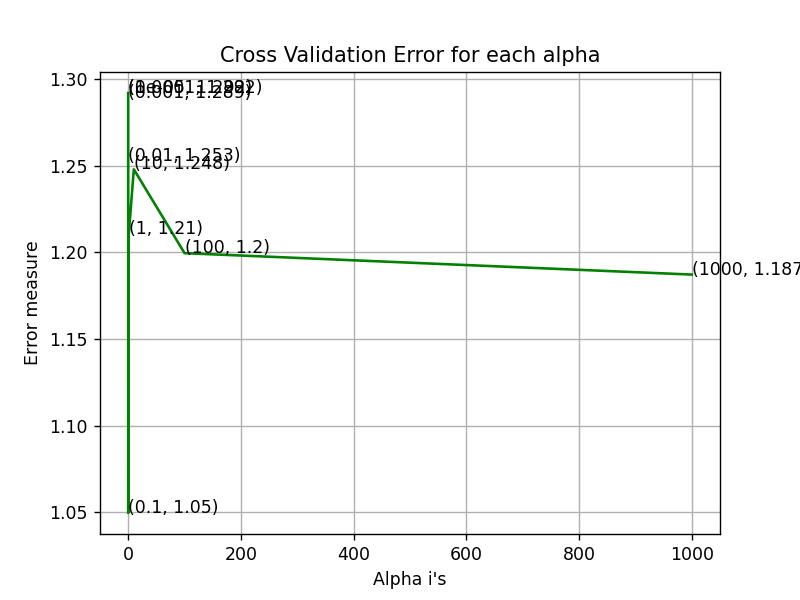

log loss for train data 1.0260451462145785
log loss for cv data 1.0495387090060828
log loss for test data 1.0284410540433457
Number of misclassified points  29.346826126954923
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


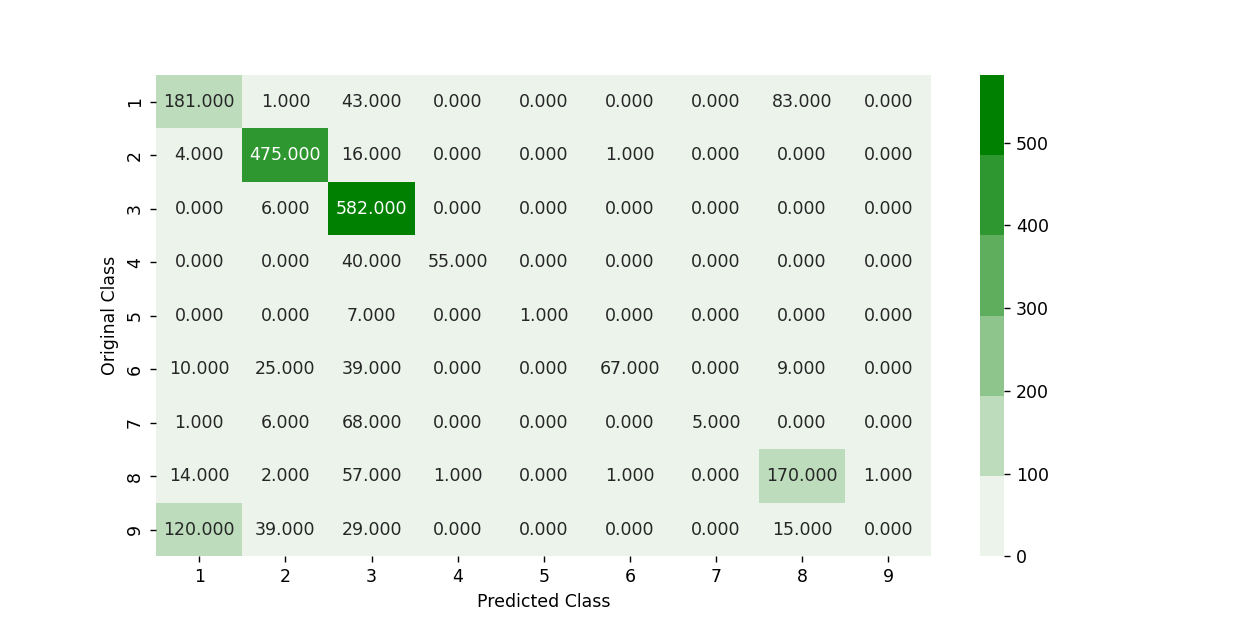

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


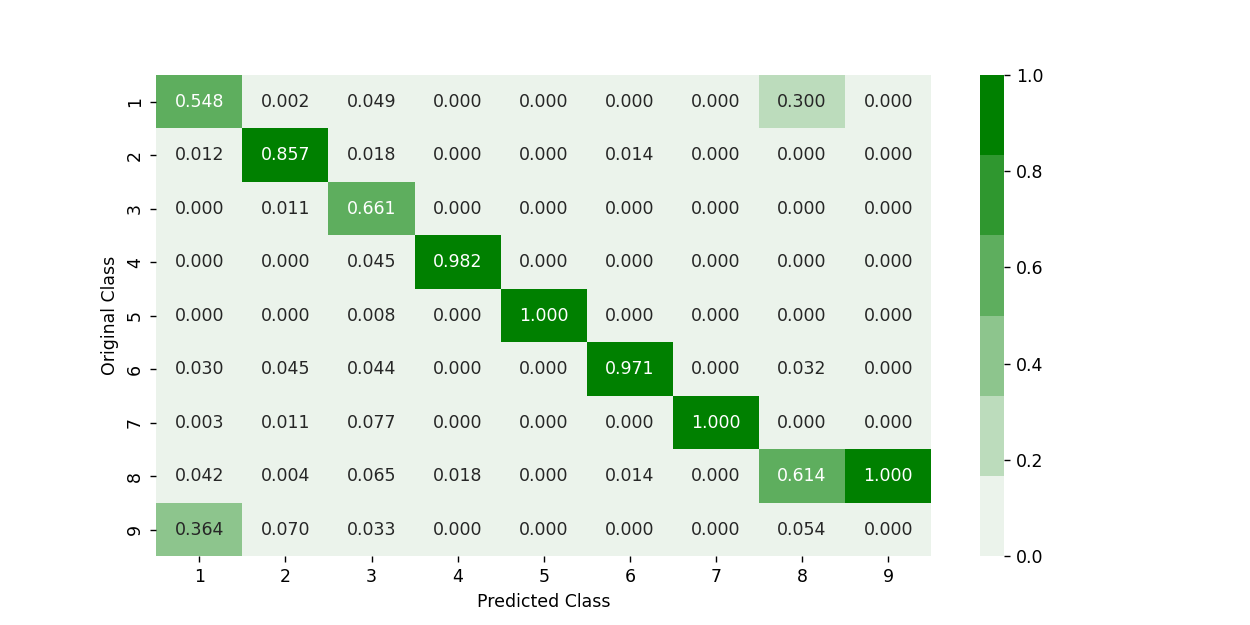

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


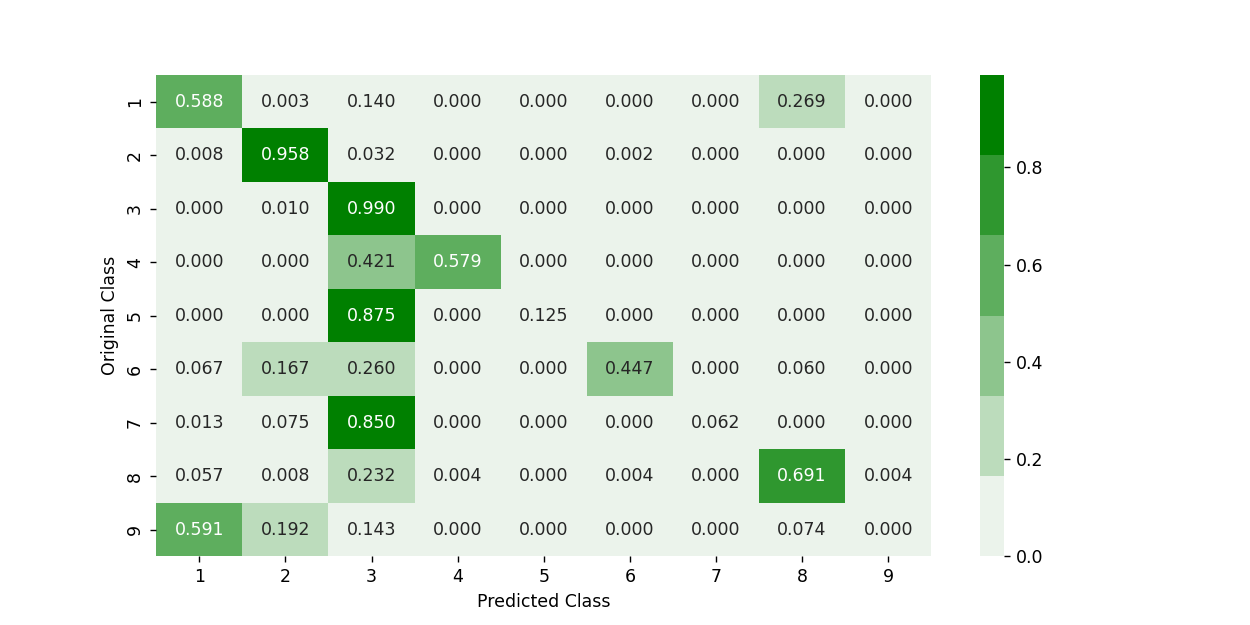

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [70]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.3 Random Forest Classifier</h3>

log_loss for c =  10 is 0.04985765056239902
log_loss for c =  50 is 0.04130933391704944
log_loss for c =  100 is 0.0409973181687774
log_loss for c =  500 is 0.04161561778625237
log_loss for c =  1000 is 0.041927480694838266
log_loss for c =  2000 is 0.0418562087236677
log_loss for c =  3000 is 0.04175517486781179


<IPython.core.display.Javascript object>


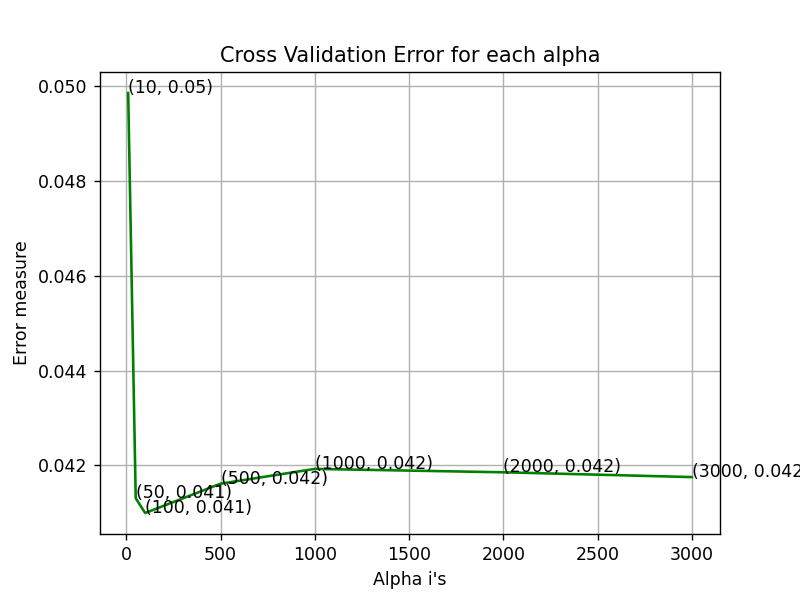

log loss for train data 0.0154122678614834
log loss for cv data 0.0409973181687774
log loss for test data 0.032833911608896385
Number of misclassified points  0.5979760809567618
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


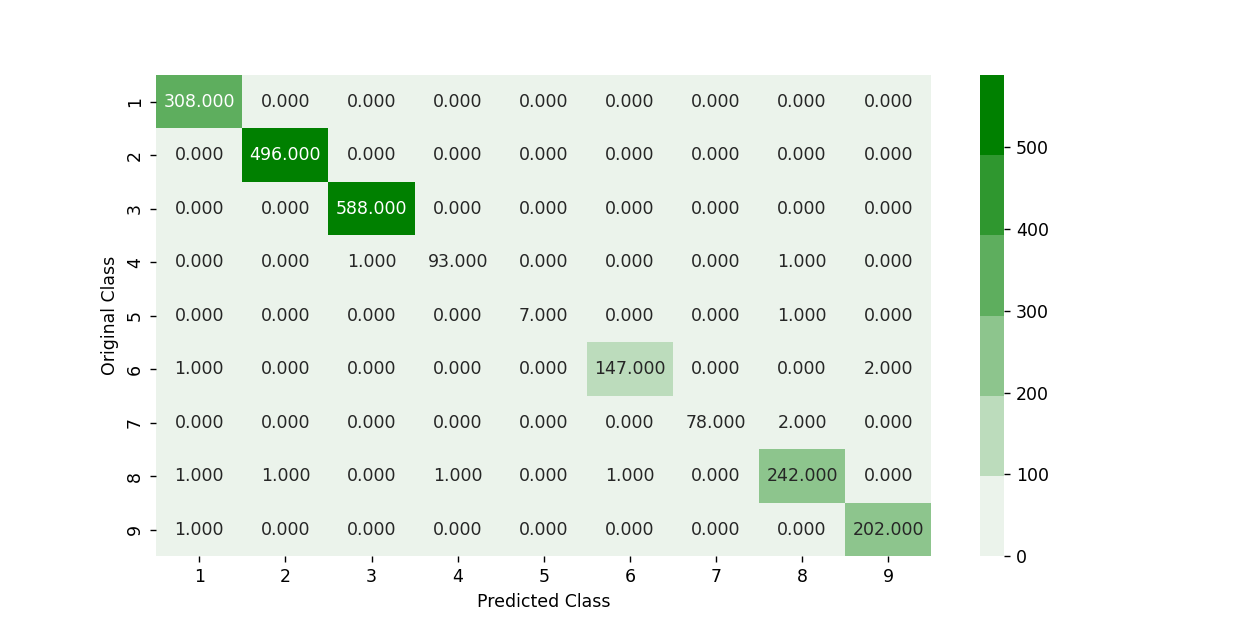

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


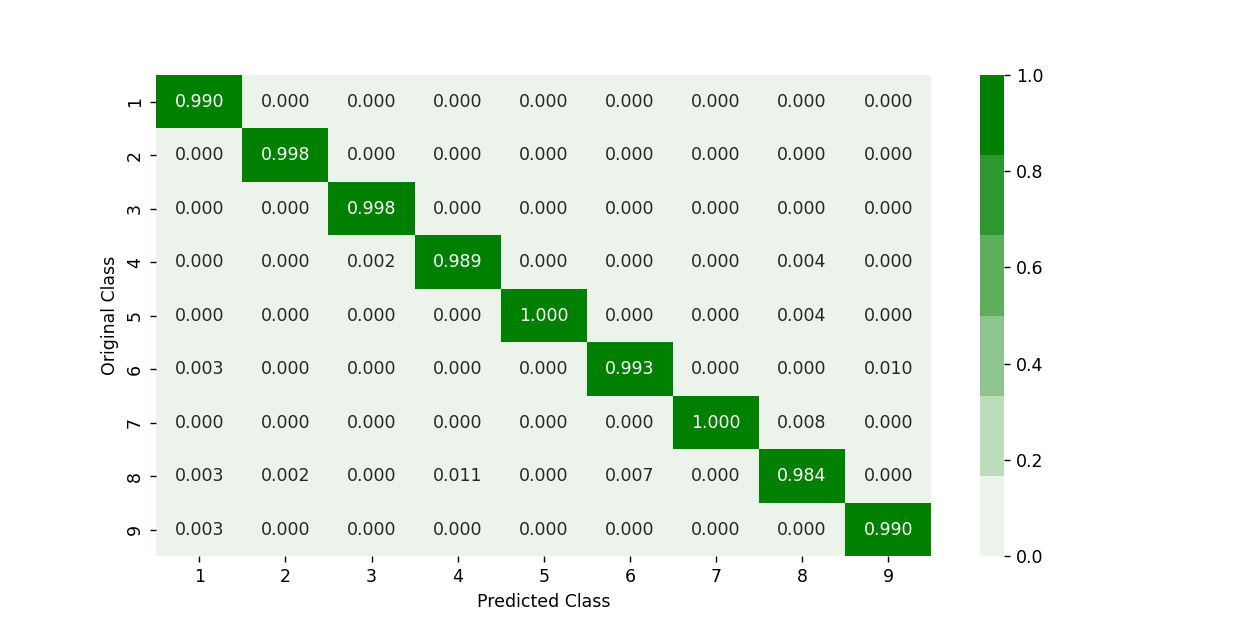

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


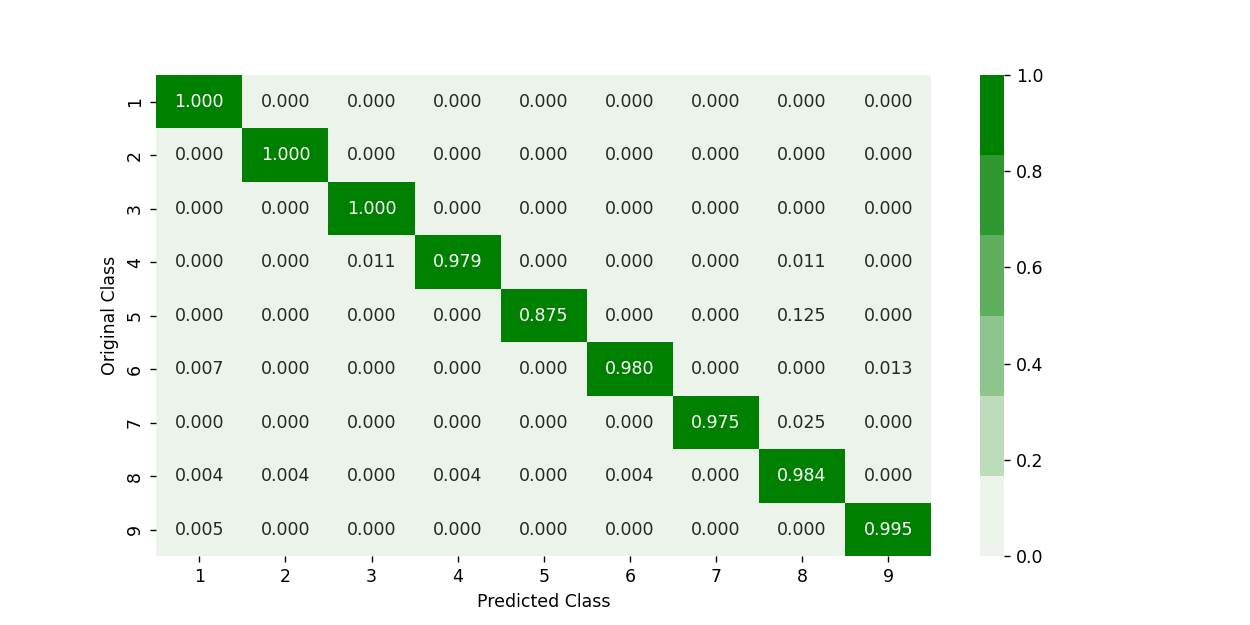

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [71]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.4 XgBoost Classifier</h3>

In [75]:
le = LabelEncoder()
y_train_asm = le.fit_transform(y_train_asm)

log_loss for c =  10 is 5.810552715840147
log_loss for c =  50 is 5.9569323148666555
log_loss for c =  100 is 5.964157499804744
log_loss for c =  500 is 5.9749527772326445
log_loss for c =  1000 is 5.974550376784131
log_loss for c =  2000 is 5.969105608750231
log_loss for c =  3000 is 5.965833805898348


<IPython.core.display.Javascript object>


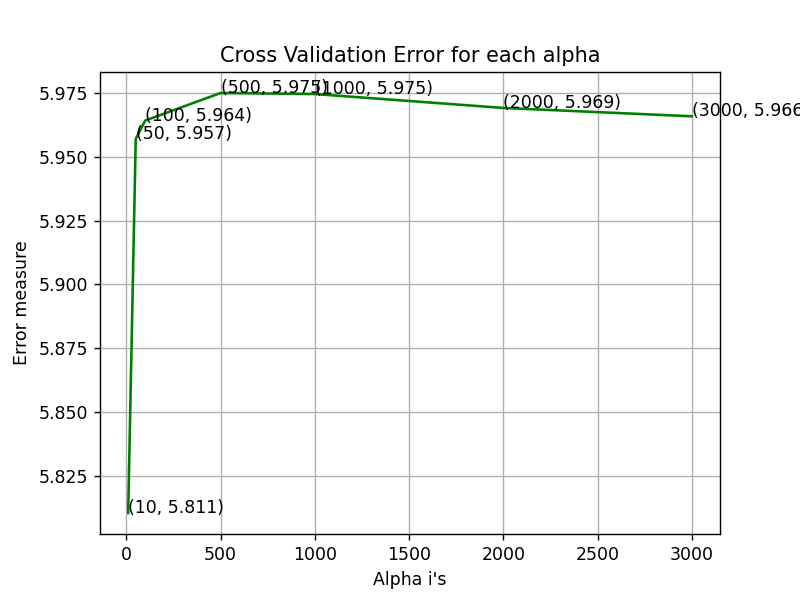

For values of best alpha =  10 The train log loss is: 0.02177305375041982
For values of best alpha =  10 The cross validation log loss is: 0.042079797626692325
For values of best alpha =  10 The test log loss is: 0.052323900163647165
Number of misclassified points  99.81600735970562
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


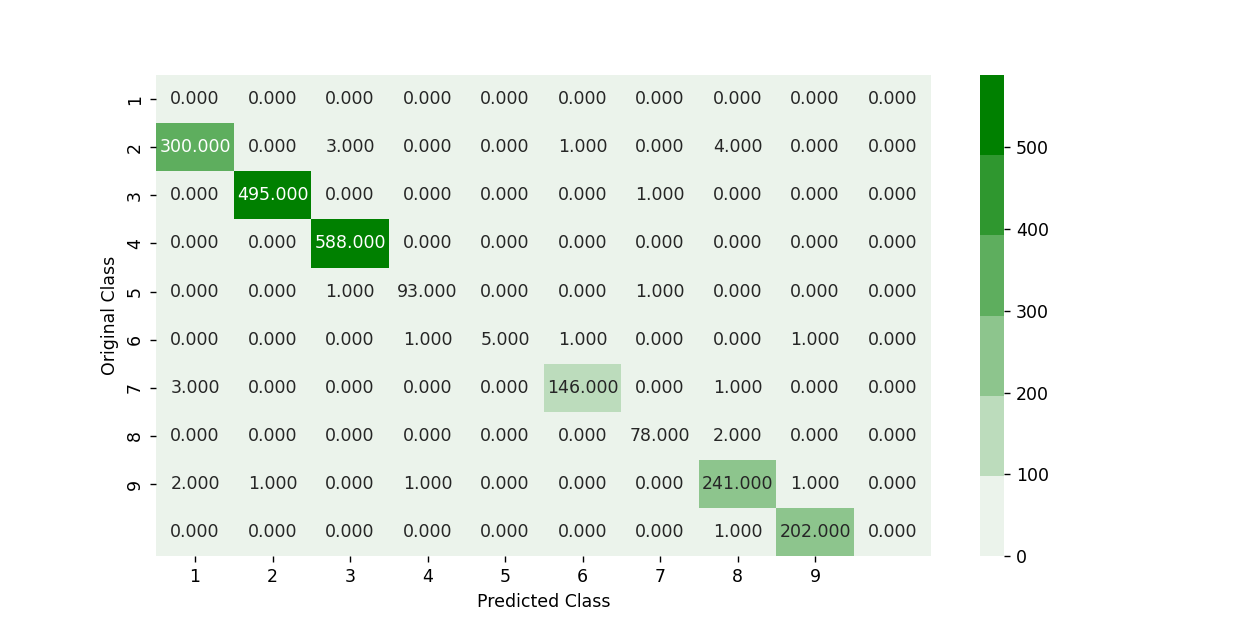

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


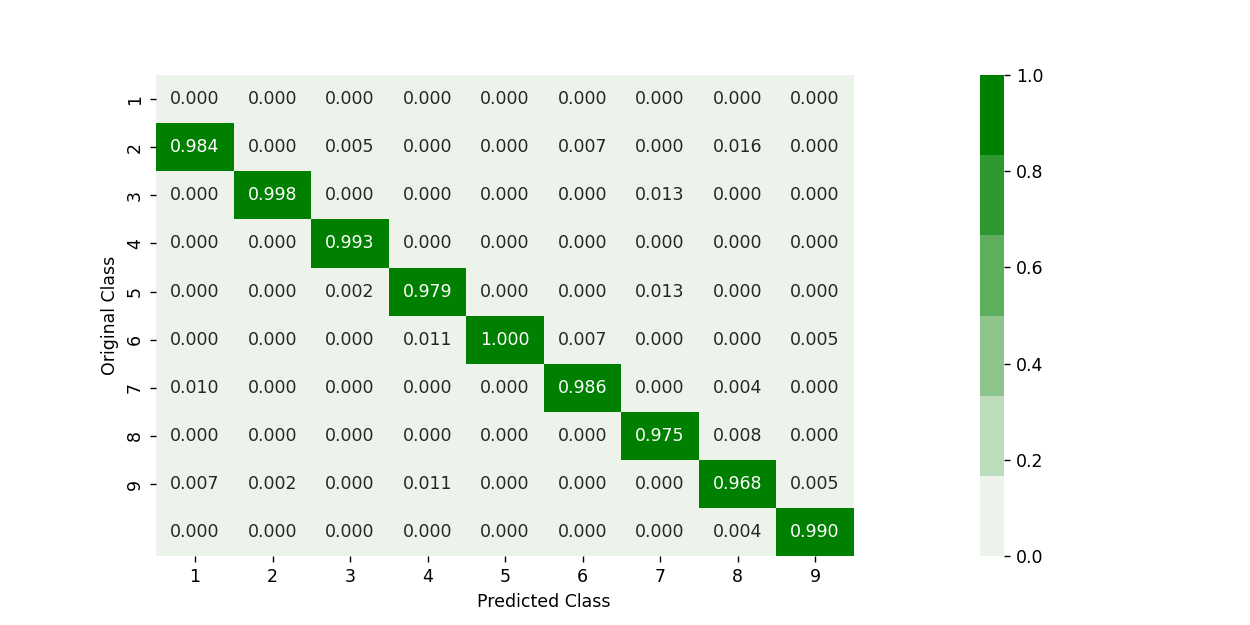

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1. nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


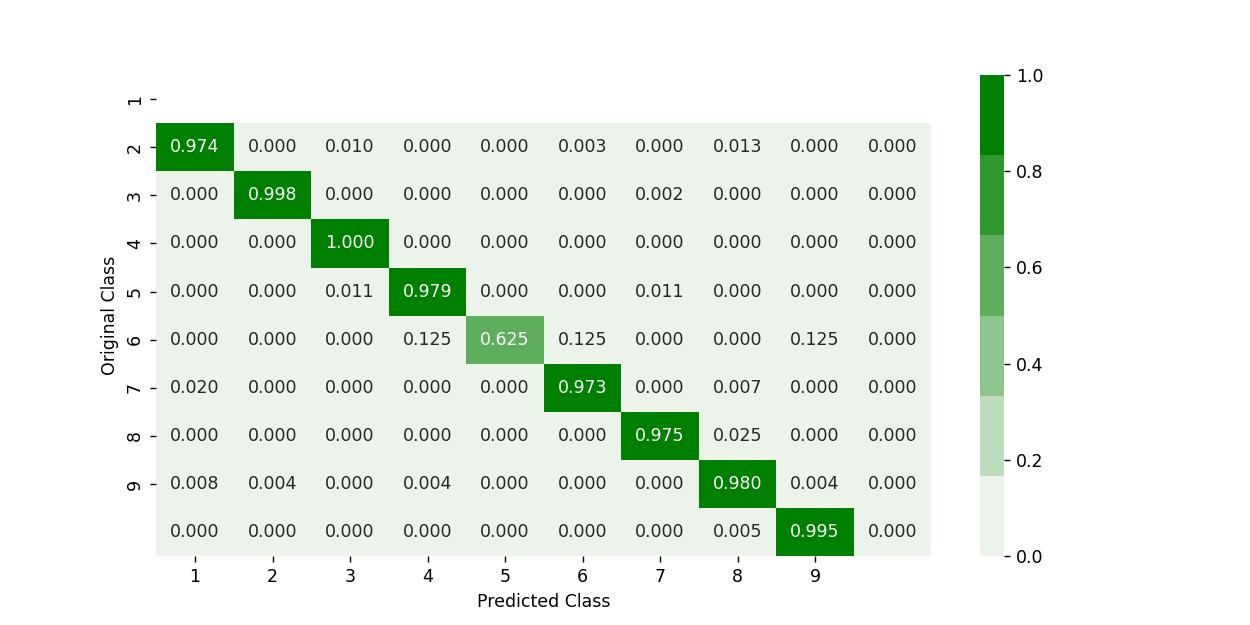

Sum of rows in precision matrix [nan  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [76]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.5 Xgboost Classifier with best hyperparameters</h3>

In [77]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_asm,y_train_asm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_c...
                                           monotone_constraints=None,
                                           n

In [78]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.3}


In [79]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=200,subsample=0.5,learning_rate=0.15,colsample_bytree=0.5,max_depth=3)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

train loss 0.012376968065536762
cv loss 0.03205302810314282
test loss 0.030785034455535706


<h2> 4.5. Machine Learning models on features of both .asm and .bytes files</h2>

<h3> 4.5.1. Merging both asm and byte file features</h3>

In [89]:
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...        f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.013560  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.001920  0.001147  0.001329   
2  0.005280  0.005078  0.002155  0.008104  ...  0.009804  0.011777  0.012604   
3  0.000354  0.000310  0.000481  0.000959  ...  0.002121  0.001886  0.002272   
4  0.000232  0.000148  0.000229  0.000376  ...  0.001530  0.000853  0.001052   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121236      2  
2  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 260 columns]

In [90]:
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx       ecx  \
0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360  0.001057   
1  0.000000      0.0  0.000072  ...  0.000328  0.000965  0.000686  0.000153   
2  0.000038      0.0  0.000072  ...  0.000475  0.000201  0.000560  0.000178   
3  0.000000      0.0  0.000072  ...  0.000090  0.000281  0.000059  0.000025   
4  0.000000      0.0  0.000072  ...  0.000102  0.000362  0.000243  0.000064   

   edi       ebp       esp       eip  Class      size  
0  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

In [91]:
print(result.shape)
print(result_asm.shape)

(10868, 260)
(10868, 54)


In [92]:
result_x = pd.merge(result,result_asm.drop(['Class'], axis=1),on='ID', how='left')
result_y = result_x['Class']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class'], axis=1)
result_x.head()

0         1         2         3         4         5         6  \
0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   

          7         8         9  ...       edx       esi       eax       ebx  \
0  0.002946  0.002638  0.003531  ...  0.015418  0.025875  0.025744  0.004910   
1  0.006984  0.008267  0.000394  ...  0.004961  0.012316  0.007858  0.007570   
2  0.002155  0.008104  0.002707  ...  0.000095  0.006181  0.000100  0.003773   
3  0.000481  0.000959  0.000521  ...  0.000343  0.000746  0.000301  0.000360   
4  0.000229  0.000376  0.000246  ...  0.000343  0.013875  0.000482  0.012932   

        ecx  edi       ebp       esp       eip    size_y  
0  0.008930  0.0  0.027174  0.000428  0.049896  0.400910  
1  0.005350  0.0  0.043478  0.000673  0.024839  0.099719  
2  0.000713  0.0  0.048913  0.000000  0.012802  0.060553  
3  0.001057  0.0  0.030797  0.001468  0.003173  0.000432  
4  0.001363  0.0  0.027174  0.000000  0.008316  0.006983  

[5 rows x 307 columns]

<h3> 4.5.2. Multivariate Analysis on final fearures</h3>

<IPython.core.display.Javascript object>


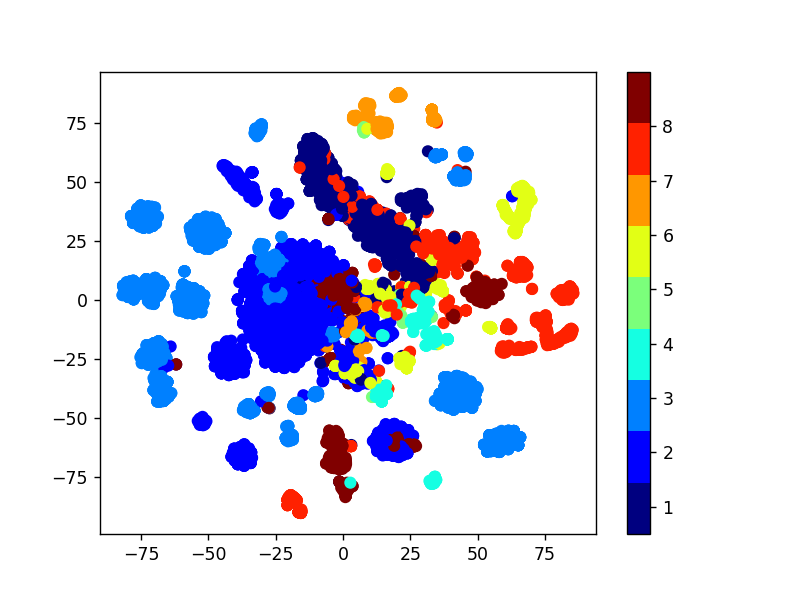

In [87]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_x)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

<h3> 4.5.3. Train and Test split</h3>

In [88]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3> 4.5.4. Random Forest Classifier on final features</h3>

log_loss for c =  10 is 0.038473544291464074
log_loss for c =  50 is 0.03314297351343541
log_loss for c =  100 is 0.0323512946898331
log_loss for c =  500 is 0.03249690855035643
log_loss for c =  1000 is 0.03218554905833443
log_loss for c =  2000 is 0.03206016419493975
log_loss for c =  3000 is 0.03180093631401334


<IPython.core.display.Javascript object>


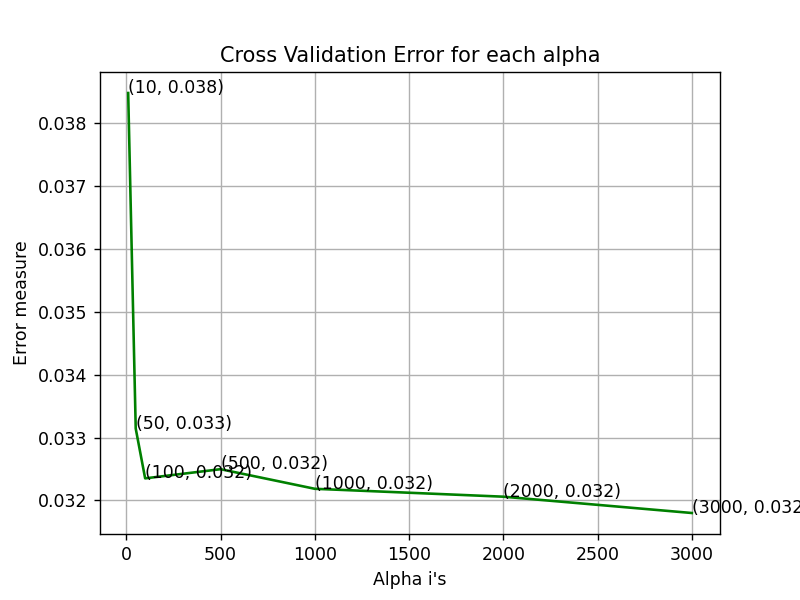

For values of best alpha =  3000 The train log loss is: 0.016482037698716694
For values of best alpha =  3000 The cross validation log loss is: 0.03180093631401334
For values of best alpha =  3000 The test log loss is: 0.049452952893567936


In [89]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h3> 4.5.5. XgBoost Classifier on final features</h3>

In [91]:
le = LabelEncoder()
y_train_merge = le.fit_transform(y_train_merge)

log_loss for c =  10 is 5.96123453468119
log_loss for c =  50 is 6.130357802208891
log_loss for c =  100 is 6.145231878123089
log_loss for c =  500 is 6.153995021048668
log_loss for c =  1000 is 6.153957302285985
log_loss for c =  2000 is 6.15385191197377
log_loss for c =  3000 is 6.153868276158185


<IPython.core.display.Javascript object>


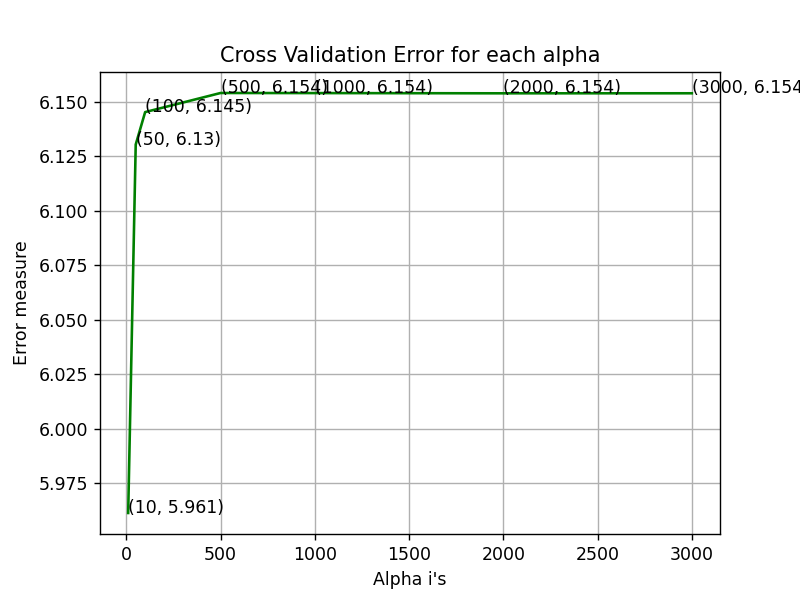

For values of best alpha =  10 The train log loss is: 0.012516387663857946
For values of best alpha =  10 The cross validation log loss is: 0.02789072274958981
For values of best alpha =  10 The test log loss is: 0.03601892095027635


In [92]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=3000,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h3> 4.5.5. XgBoost Classifier on final features with best hyper parameters using Random search</h3>

In [93]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_c...
                                           monotone_constraints=None,
                                           n

In [94]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1}


For values of best alpha =  10 The train log loss is: 0.011874460006644012
For values of best alpha =  10 The cross validation log loss is: 0.03156055016155298
For values of best alpha =  10 The test log loss is: 0.03378290599090462
Number of misclassified points  87.71849126034958
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


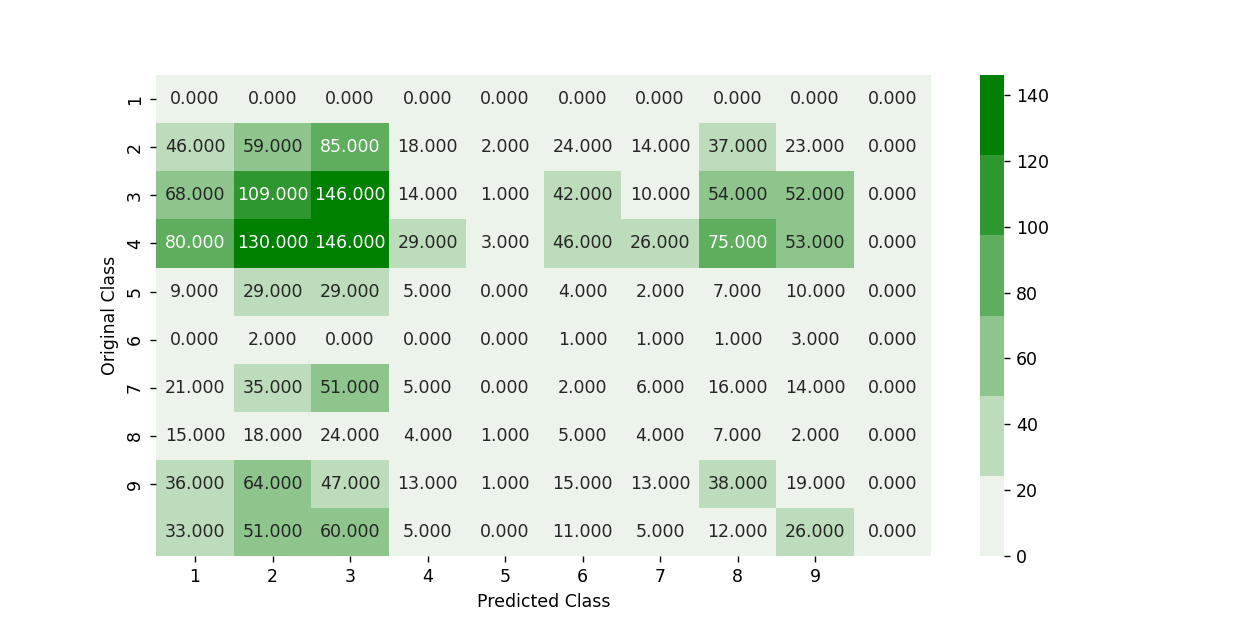

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


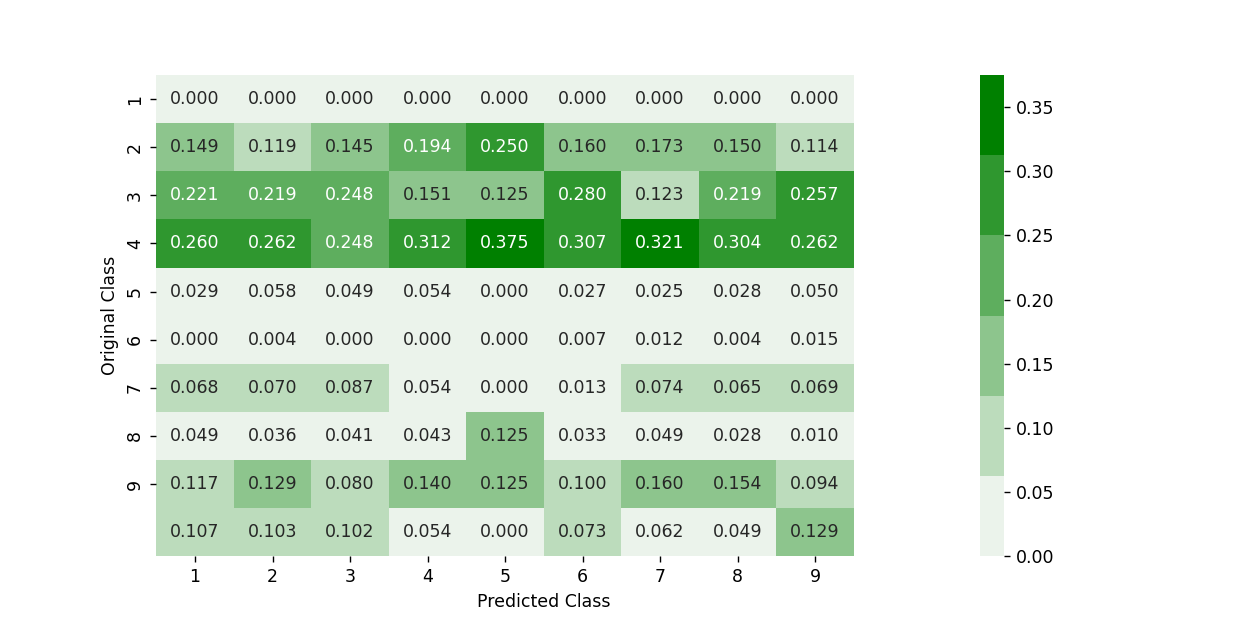

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1. nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


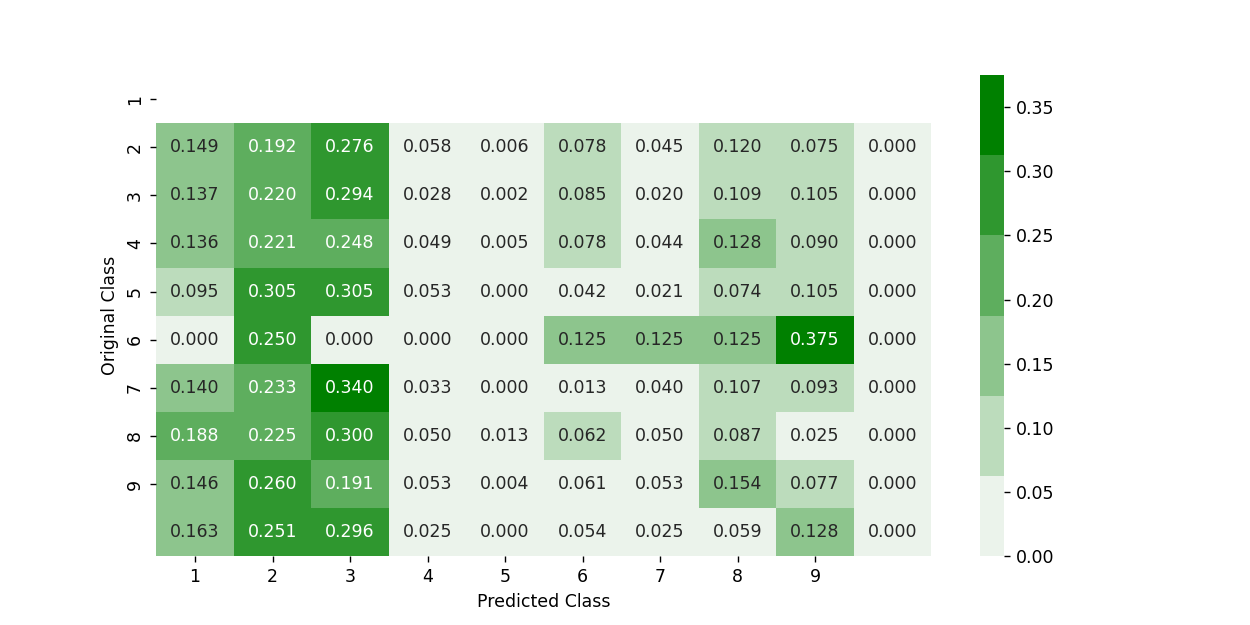

Sum of rows in precision matrix [nan  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [95]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=500,max_depth=3,learning_rate=0.1,colsample_bytree=1,subsample=1,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_merge))

<h1> 5. Assignments </h1>

<ol>
<li> Add bi-grams on byte files and improve the log-loss</li>
<li> Watch the video (<a href='https://www.youtube.com/watch?v=VLQTRlLGz5Y#t=13m11s'>video</a>) and include pixel intensity features to improve the logloss </li>
</ol>

<pre>
1. you need to donwload the train from kaggle, which is of size ~17GB, after extracting it will occupy ~128GB data your dirve

2. if you are having computation power limitations, you can try using google colab, with GPU option enabled (you can search for how to enable GPU in colab) or you can work with the Google Cloud, check this tutorials by one of our student: https://www.youtube.com/channel/UCRH_z-oM0LROvHPe_KYR4Wg (we suggest you to use GCP over Colab)

3. To Extract the .7z file in google cloud, once after you upload the file into server, in your ipython notebook create a new cell and write thess commands
  a. !sudo apt-get install p7zip
  b. !7z x file_name.7z -o path/where/you/want/to/extract
  
https://askubuntu.com/a/341637
</pre>

# ***bigram on byte file***

In [95]:
result_x['ID'] = result.ID
result_x.head()

0         1         2         3         4         5         6  \
0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   

          7         8         9  ...       esi       eax       ebx       ecx  \
0  0.002946  0.002638  0.003531  ...  0.025875  0.025744  0.004910  0.008930   
1  0.006984  0.008267  0.000394  ...  0.012316  0.007858  0.007570  0.005350   
2  0.002155  0.008104  0.002707  ...  0.006181  0.000100  0.003773  0.000713   
3  0.000481  0.000959  0.000521  ...  0.000746  0.000301  0.000360  0.001057   
4  0.000229  0.000376  0.000246  ...  0.013875  0.000482  0.012932  0.001363   

   edi       ebp       esp       eip    size_y                    ID  
0  0.0  0.027174  0.000428  0.049896  0.400910  01azqd4InC7m9JpocGv5  
1  0.0  0.043478  0.000673  0.024839  0.099719  01IsoiSMh5gxyDYTl4CB  
2  0.0  0.048913  0.000000  0.012802  0.060553  01jsnpXSAlgw6aPeDxrU  
3  0.0  0.030797  0.001468  0.003173  0.000432  01kcPWA9K2BOxQeS5Rju  
4  0.0  0.027174  0.000000  0.008316  0.006983  01SuzwMJEIXsK7A8dQbl  

[5 rows x 308 columns]

In [4]:
vocab = "00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"

In [5]:
def bigram():    
    bigram_bytevocab = []
    for ind, val in enumerate(vocab.split(',')):
        for j in range(0, len(vocab.split(','))):
            bigram_bytevocab.append(val + ' ' +vocab.split(',')[j])
    return bigram_bytevocab

In [6]:
bigram()

['00 00',
 '00 01',
 '00 02',
 '00 03',
 '00 04',
 '00 05',
 '00 06',
 '00 07',
 '00 08',
 '00 09',
 '00 0a',
 '00 0b',
 '00 0c',
 '00 0d',
 '00 0e',
 '00 0f',
 '00 10',
 '00 11',
 '00 12',
 '00 13',
 '00 14',
 '00 15',
 '00 16',
 '00 17',
 '00 18',
 '00 19',
 '00 1a',
 '00 1b',
 '00 1c',
 '00 1d',
 '00 1e',
 '00 1f',
 '00 20',
 '00 21',
 '00 22',
 '00 23',
 '00 24',
 '00 25',
 '00 26',
 '00 27',
 '00 28',
 '00 29',
 '00 2a',
 '00 2b',
 '00 2c',
 '00 2d',
 '00 2e',
 '00 2f',
 '00 30',
 '00 31',
 '00 32',
 '00 33',
 '00 34',
 '00 35',
 '00 36',
 '00 37',
 '00 38',
 '00 39',
 '00 3a',
 '00 3b',
 '00 3c',
 '00 3d',
 '00 3e',
 '00 3f',
 '00 40',
 '00 41',
 '00 42',
 '00 43',
 '00 44',
 '00 45',
 '00 46',
 '00 47',
 '00 48',
 '00 49',
 '00 4a',
 '00 4b',
 '00 4c',
 '00 4d',
 '00 4e',
 '00 4f',
 '00 50',
 '00 51',
 '00 52',
 '00 53',
 '00 54',
 '00 55',
 '00 56',
 '00 57',
 '00 58',
 '00 59',
 '00 5a',
 '00 5b',
 '00 5c',
 '00 5d',
 '00 5e',
 '00 5f',
 '00 60',
 '00 61',
 '00 62',
 '00 63',


In [7]:
bigram_bytevocab = bigram()

In [8]:
len(bigram_bytevocab)

66049

In [9]:
bigram_bytevocab[:10]

['00 00',
 '00 01',
 '00 02',
 '00 03',
 '00 04',
 '00 05',
 '00 06',
 '00 07',
 '00 08',
 '00 09']

In [10]:
from tqdm import tqdm 
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
import scipy

In [11]:
vec = CountVectorizer(lowercase=False,ngram_range=(2,2), vocabulary=bigram_bytevocab)
byte_bi_gm_vec = scipy.sparse.csr_matrix((10868, 66049))

for ind, f in tqdm(enumerate(os.listdir('byteFiles'))):
    fol = open('byteFiles/' + f)
    byte_bi_gm_vec[ind, :]+= scipy.sparse.csr_matrix(vec.fit_transform([fol.read().replace('\n', ' ').lower()]))
    fol.close()

10868it [100:54:37, 33.43s/it] 


In [12]:
byte_bi_gm_vec

<10868x66049 sparse matrix of type '<class 'numpy.float64'>'
	with 502109160 stored elements in Compressed Sparse Row format>

In [13]:
scipy.sparse.save_npz('by_bi_gram.npz', byte_bi_gm_vec)

In [21]:
byte_bi_gm_vec

<10868x66049 sparse matrix of type '<class 'numpy.float64'>'
	with 502109160 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.preprocessing import normalize
import scipy
byte_bi_gms_vec = normalize(scipy.sparse.load_npz('by_bi_gram.npz'), axis = 0)

In [7]:
# random forest feature extracxtion 
def random_forest_features_ext(df, feat, k):
    r_forest = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
    r_forest.fit(df, result_y)
    important_feat_ind = np.argsort(r_forest.feature_importances_)[::-1]
    important_val = np.take(r_forest.feature_importances_, important_feat_ind[:20])
    important_feat_name = np.take(feat, important_feat_ind[:20])
    sns.set()
    plt.figure(figsize = (20, 10))
    x = sns.barplot(x = important_feat_name, y = important_val)
    x.set_xticklabels(labels = important_feat_name, rotation = 45)
    sns.set_palette(reversed(sns.color_palette("pastel", 10)), 10)
    plt.title('important_Features')
    plt.xlabel('feat_Names')
    plt.ylabel('feat importance')
    return important_feat_ind[:k]

In [14]:
by_bigram_indx = random_forest_features_ext(normalize(byte_bi_gms_vec, axis = 0), bigram_bytevocab, 300)

In [15]:
np.save('by_bigram_indx', by_bigram_indx)

In [16]:
by_bigram_indx = np.load('by_bigram_indx.npy')

In [17]:
top_by_bigram = np.zeros((10868, 0))
for i in by_bigram_indx:
    s_icd = byte_bi_gms_vec[:, i].todense()
    top_by_bigram = np.hstack([top_by_bigram, s_icd])

In [18]:
top_by_bigram

matrix([[3.13770788e-04, 5.93101300e-03, 1.20277865e-04, ...,
         1.21802573e-02, 1.08574576e-02, 4.36766163e-03],
        [0.00000000e+00, 5.18963637e-03, 0.00000000e+00, ...,
         7.83656260e-05, 1.84415416e-04, 0.00000000e+00],
        [1.56885394e-04, 3.70688312e-03, 1.50347331e-05, ...,
         2.05989645e-03, 1.44458743e-03, 1.06765062e-02],
        ...,
        [0.00000000e+00, 0.00000000e+00, 1.50347331e-05, ...,
         0.00000000e+00, 7.68397567e-06, 3.88236590e-03],
        [1.56885394e-04, 1.48275325e-03, 6.01389323e-05, ...,
         2.23901788e-05, 1.53679513e-05, 7.76473179e-03],
        [3.92213486e-04, 1.48275325e-03, 3.00694662e-05, ...,
         0.00000000e+00, 7.68397567e-06, 4.85295737e-03]])

In [19]:
bigram_bytevocab

['00 00',
 '00 01',
 '00 02',
 '00 03',
 '00 04',
 '00 05',
 '00 06',
 '00 07',
 '00 08',
 '00 09',
 '00 0a',
 '00 0b',
 '00 0c',
 '00 0d',
 '00 0e',
 '00 0f',
 '00 10',
 '00 11',
 '00 12',
 '00 13',
 '00 14',
 '00 15',
 '00 16',
 '00 17',
 '00 18',
 '00 19',
 '00 1a',
 '00 1b',
 '00 1c',
 '00 1d',
 '00 1e',
 '00 1f',
 '00 20',
 '00 21',
 '00 22',
 '00 23',
 '00 24',
 '00 25',
 '00 26',
 '00 27',
 '00 28',
 '00 29',
 '00 2a',
 '00 2b',
 '00 2c',
 '00 2d',
 '00 2e',
 '00 2f',
 '00 30',
 '00 31',
 '00 32',
 '00 33',
 '00 34',
 '00 35',
 '00 36',
 '00 37',
 '00 38',
 '00 39',
 '00 3a',
 '00 3b',
 '00 3c',
 '00 3d',
 '00 3e',
 '00 3f',
 '00 40',
 '00 41',
 '00 42',
 '00 43',
 '00 44',
 '00 45',
 '00 46',
 '00 47',
 '00 48',
 '00 49',
 '00 4a',
 '00 4b',
 '00 4c',
 '00 4d',
 '00 4e',
 '00 4f',
 '00 50',
 '00 51',
 '00 52',
 '00 53',
 '00 54',
 '00 55',
 '00 56',
 '00 57',
 '00 58',
 '00 59',
 '00 5a',
 '00 5b',
 '00 5c',
 '00 5d',
 '00 5e',
 '00 5f',
 '00 60',
 '00 61',
 '00 62',
 '00 63',


In [20]:
by_bigram_indx

array([23212, 36648,  7820,  3982, 62116, 34685, 41934, 46700, 58527,
        7615,  6600, 55764, 65018, 17619, 58113, 65624, 11064, 18250,
        7560, 54253, 10930, 56872, 61570, 41932, 19504, 10838, 62089,
       63185, 34926, 62666, 10410, 61335, 42702, 36905, 32587, 63619,
       65185, 64416, 11708, 11968, 58482, 40847,  6779, 34477, 39808,
       39199, 60184, 37485, 38170, 55353, 34726, 10949, 38340, 63105,
       10233, 48040, 38279, 64223, 60991,   388, 42436, 45502, 12003,
       64591,  7925,  2774, 63133, 37516, 60280, 45932, 10983, 10882,
       48285, 65099, 57080,  2193, 64165, 64160, 44181, 52192, 62783,
       11355, 47776, 64447, 54347,  7891, 11189, 37821, 64135, 40855,
        7658, 56868, 58410, 31597, 44191, 65181, 62994, 46555, 44194,
       31830, 65658, 17741, 18502,  2219, 23006, 30081,    15,  1167,
         133, 35023,   128, 65535, 50254,  2195, 35808,   965, 23010,
       29815, 24249,   515, 51852, 21984, 32710, 28903, 52125, 35536,
        4079,   106,

In [21]:
by_bigram_df = pd.DataFrame(top_by_bigram, columns = np.take(bigram_bytevocab, by_bigram_indx))

In [22]:
by_bigram_df.head()

5a 52     8e 9a     1e 6e     0f 7f     f1 b3     86 f7     a3 2b  \
0  0.000314  0.005931  0.000120  0.000245  0.008667  0.001485  0.004130   
1  0.000000  0.005190  0.000000  0.000655  0.000000  0.001485  0.000516   
2  0.000157  0.003707  0.000015  0.000205  0.003250  0.002971  0.004646   
3  0.000235  0.001483  0.000030  0.000041  0.002167  0.000000  0.001549   
4  0.000157  0.000000  0.000000  0.000000  0.000000  0.000743  0.002065   

      b5 b7     e3 bc     1d a2  ...     9d 00     00 63     a0 35     85 c9  \
0  0.000647  0.004788  0.001437  ...  0.025659  0.020282  0.000068  0.009491   
1  0.000129  0.000000  0.000000  ...  0.000193  0.000200  0.000000  0.001726   
2  0.045020  0.003830  0.000821  ...  0.003374  0.003489  0.000027  0.004854   
3  0.000129  0.001915  0.000205  ...  0.000150  0.001290  0.000014  0.000755   
4  0.000259  0.000000  0.000205  ...  0.000086  0.000073  0.000000  0.000108   

      0c 35     77 07     8b f8     dd 00     00 d8     81 c0  
0  0.000196  0.000434  0.002394  0.012180  0.010857  0.004368  
1  0.000036  0.000124  0.001450  0.000078  0.000184  0.000000  
2  0.000321  0.000496  0.001146  0.002060  0.001445  0.010677  
3  0.000036  0.000062  0.001551  0.000090  0.000284  0.000971  
4  0.000000  0.000000  0.000000  0.000022  0.000015  0.000485  

[5 rows x 300 columns]

In [23]:
by_bigram_df.to_csv('by_bigram_df.csv')

In [4]:
by_bigram_df = pd.read_csv('by_bigram_df.csv').drop('Unnamed: 0', axis = 1).fillna(0)

In [5]:
by_bigram_df['ID'] = result_x.ID

In [6]:
by_bigram_df.head()#--------->feature 1

5a 52     8e 9a     1e 6e     0f 7f     f1 b3     86 f7     a3 2b  \
0  0.000314  0.005931  0.000120  0.000245  0.008667  0.001485  0.004130   
1  0.000000  0.005190  0.000000  0.000655  0.000000  0.001485  0.000516   
2  0.000157  0.003707  0.000015  0.000205  0.003250  0.002971  0.004646   
3  0.000235  0.001483  0.000030  0.000041  0.002167  0.000000  0.001549   
4  0.000157  0.000000  0.000000  0.000000  0.000000  0.000743  0.002065   

      b5 b7     e3 bc     1d a2  ...     00 63     a0 35     85 c9     0c 35  \
0  0.000647  0.004788  0.001437  ...  0.020282  0.000068  0.009491  0.000196   
1  0.000129  0.000000  0.000000  ...  0.000200  0.000000  0.001726  0.000036   
2  0.045020  0.003830  0.000821  ...  0.003489  0.000027  0.004854  0.000321   
3  0.000129  0.001915  0.000205  ...  0.001290  0.000014  0.000755  0.000036   
4  0.000259  0.000000  0.000205  ...  0.000073  0.000000  0.000108  0.000000   

      77 07     8b f8     dd 00     00 d8     81 c0                    ID  
0  0.000434  0.002394  0.012180  0.010857  0.004368  01azqd4InC7m9JpocGv5  
1  0.000124  0.001450  0.000078  0.000184  0.000000  01IsoiSMh5gxyDYTl4CB  
2  0.000496  0.001146  0.002060  0.001445  0.010677  01jsnpXSAlgw6aPeDxrU  
3  0.000062  0.001551  0.000090  0.000284  0.000971  01kcPWA9K2BOxQeS5Rju  
4  0.000000  0.000000  0.000022  0.000015  0.000485  01SuzwMJEIXsK7A8dQbl  

[5 rows x 301 columns]

# ***Bigram on opcode asm***

In [213]:
op_cd = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']

In [17]:
def asm_op_cd_bigram():
    asm_op_cd_bigram_l = []
    for ind, val in enumerate(op_cd):
        for j in range(0, len(op_cd)):
            asm_op_cd_bigram_l.append(val + ' ' + op_cd[j])
    return asm_op_cd_bigram_l

In [18]:
asm_op_cd_bigram = asm_op_cd_bigram()

In [19]:
len(asm_op_cd_bigram)

676

In [137]:
def op_cd_c0llect():
    op_f = open("op_cd_file1.txt", "w+")
    for asm_file in os.listdir('asmFiles'):
        op_cd_str = ""
        with codecs.open('asmFiles/' + asm_file, encoding='cp1252', errors ='replace') as c:
            for l in c:
                Line = l.rstrip().split()            
                for line in Line:
                    if line in op_cd:
                        op_cd_str += line + ' '
        op_f.write(op_cd_str + "\n")
    op_f.close()
op_cd_c0llect()

In [139]:
vec = CountVectorizer(ngram_range=(2, 2), vocabulary = asm_op_cd_bigram)
op_cd_bi_vec = scipy.sparse.csr_matrix((10868, len(asm_op_cd_bigram)))
raw_op_cd = open('op_cd_file1.txt').read().split('\n')

for ix in range(10868):
    op_cd_bi_vec[ix, :] += scipy.sparse.csr_matrix(vec.transform([raw_op_cd[ix]]))

In [140]:
op_cd_bi_vec

<10868x676 sparse matrix of type '<class 'numpy.float64'>'
	with 1877309 stored elements in Compressed Sparse Row format>

In [141]:
scipy.sparse.save_npz('op_cd_bigram.npz', op_cd_bi_vec)

In [13]:
import scipy
op_cd_bi_vec=scipy.sparse.load_npz('op_cd_bigram.npz')

In [20]:
from sklearn.preprocessing import normalize
op_bigram_indxes = random_forest_features_ext(normalize(op_cd_bi_vec, axis = 0), asm_op_cd_bigram, 200)

In [21]:
op_cd_bi_vec.shape

(10868, 676)

In [22]:
len(asm_op_cd_bigram)

676

In [23]:
op_bigram_indxes.shape

(200,)

In [220]:
len([op_cd_bi_vec])

1

In [24]:
op_bigram_df = pd.DataFrame.sparse.from_spmatrix(normalize(op_cd_bi_vec, axis = 0), columns = asm_op_cd_bigram)

In [25]:
op_bigram_df

jmp jmp   jmp mov  jmp retf  jmp push   jmp pop   jmp xor  jmp retn  \
0      0.031815  0.003894  0.000000  0.000420  0.000000  0.002374  0.000000   
1      0.000000  0.000649  0.000000  0.000210  0.000374  0.000419  0.000703   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000101  0.000000  0.000070  0.000000  0.000279  0.000703   
4      0.000362  0.001156  0.001467  0.000280  0.000374  0.000140  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10864  0.013160  0.000325  0.005869  0.001331  0.003369  0.000419  0.001405   
10865  0.006074  0.000183  0.010271  0.000700  0.002994  0.000140  0.002108   
10866  0.027404  0.002860  0.013205  0.014850  0.069618  0.003212  0.015460   
10867  0.028199  0.003124  0.010271  0.012608  0.060260  0.004190  0.009135   

        jmp nop   jmp sub   jmp inc  ...  movzx cmp  movzx call  movzx shl  \
0      0.000000  0.008950  0.000000  ...   0.000000         0.0        0.0   
1      0.000000  0.000000  0.000000  ...   0.000471         0.0        0.0   
2      0.000000  0.000000  0.000000  ...   0.005648         0.0        0.0   
3      0.000000  0.000000  0.000000  ...   0.000000         0.0        0.0   
4      0.000000  0.000000  0.000000  ...   0.005177         0.0        0.0   
...         ...       ...       ...  ...        ...         ...        ...   
10863  0.000000  0.000000  0.000000  ...   0.000000         0.0        0.0   
10864  0.025013  0.000746  0.003618  ...   0.000000         0.0        0.0   
10865  0.033351  0.000746  0.002714  ...   0.000000         0.0        0.0   
10866  0.000000  0.040649  0.027136  ...   0.000000         0.0        0.0   
10867  0.000000  0.032444  0.019900  ...   0.000000         0.0        0.0   

       movzx ror  movzx rol  movzx jnb  movzx jz  movzx rtn  movzx lea  \
0            0.0        0.0        0.0  0.000000        0.0   0.000000   
1            0.0        0.0        0.0  0.000000        0.0   0.000000   
2            0.0        0.0        0.0  0.002399        0.0   0.009469   
3            0.0        0.0        0.0  0.000000        0.0   0.000000   
4            0.0        0.0        0.0  0.000000        0.0   0.000000   
...          ...        ...        ...       ...        ...        ...   
10863        0.0        0.0        0.0  0.000000        0.0   0.000000   
10864        0.0        0.0        0.0  0.000000        0.0   0.000000   
10865        0.0        0.0        0.0  0.000000        0.0   0.000000   
10866        0.0        0.0        0.0  0.000000        0.0   0.000000   
10867        0.0        0.0        0.0  0.000000        0.0   0.000000   

       movzx movzx  
0         0.000000  
1         0.000000  
2         0.001869  
3         0.000000  
4         0.000623  
...            ...  
10863     0.000000  
10864     0.000000  
10865     0.000000  
10866     0.000000  
10867     0.000000  

[10868 rows x 676 columns]

In [26]:
for colm in op_bigram_df.columns:
    if colm not in np.take(asm_op_cd_bigram, op_bigram_indxes):
        op_bigram_df.drop(colm, axis = 1, inplace = True)

In [27]:
op_bigram_df.to_csv('op_bigram_df.csv')

In [28]:
op_bigram_df = pd.read_csv('op_bigram_df.csv').drop('Unnamed: 0', axis = 1).fillna(0)

In [29]:
op_bigram_df['ID'] = result_x.ID
op_bigram_df.head()

jmp jmp   jmp mov  jmp push   jmp pop  jmp sub   jmp dec   jmp add  \
0  0.031815  0.003894   0.00042  0.000000  0.00895  0.001268  0.016752   
1  0.000000  0.000649   0.00021  0.000374  0.00000  0.000000  0.001971   
2  0.000000  0.000000   0.00000  0.000000  0.00000  0.000000  0.000000   
3  0.000000  0.000101   0.00007  0.000000  0.00000  0.000000  0.000000   
4  0.000362  0.001156   0.00028  0.000374  0.00000  0.000000  0.000000   

    jmp cmp  jmp call  jmp jz  ...  movzx mov  movzx push  movzx xor  \
0  0.000112  0.000564     0.0  ...   0.000000    0.000000   0.000000   
1  0.000000  0.000000     0.0  ...   0.002315    0.000344   0.000000   
2  0.000000  0.000000     0.0  ...   0.000000    0.005852   0.005032   
3  0.000000  0.000564     0.0  ...   0.000000    0.000000   0.000162   
4  0.000112  0.000000     0.0  ...   0.000220    0.000000   0.000487   

   movzx sub  movzx or  movzx cmp  movzx jz  movzx lea  movzx movzx  \
0   0.000000  0.000000   0.000000  0.000000   0.000000     0.000000   
1   0.001884  0.004541   0.000471  0.000000   0.000000     0.000000   
2   0.001884  0.009839   0.005648  0.002399   0.009469     0.001869   
3   0.000000  0.000000   0.000000  0.000000   0.000000     0.000000   
4   0.000235  0.001514   0.005177  0.000000   0.000000     0.000623   

                     ID  
0  01azqd4InC7m9JpocGv5  
1  01IsoiSMh5gxyDYTl4CB  
2  01jsnpXSAlgw6aPeDxrU  
3  01kcPWA9K2BOxQeS5Rju  
4  01SuzwMJEIXsK7A8dQbl  

[5 rows x 201 columns]

# ***Image pixel feature extraction from asm***

In [52]:
import numpy as np
import os
import codecs
import imageio
import array
from datetime import datetime as dt

if not os.path.isdir("imgfile_asm"):
    os.mkdir("imgfile_asm")

In [53]:
list_of_asmfile=os.listdir("asmFiles/")

def extracting_img_from_text(filenames_list_arr, saving_img_folder):  
    for fname in tqdm(filenames_list_arr):
        
        if(fname.endswith("asm")):
            f = codecs.open("asmFiles/" + fname, 'rb')
            size_asm_file_current = os.path.getsize("asmFiles/"+fname)        
        
        file_width = int(size_asm_file_current**0.5)
        
        rem = size_asm_file_current % file_width
        
        
        arr_image = array.array('B')
        
        arr_image.frombytes(f.read())
        f.close()
        
        generated_image_arr = np.reshape(arr_image[:file_width * file_width], (file_width, file_width))
        
        generated_image_arr = np.uint8(generated_image_arr)
        
        imageio.imwrite(saving_img_folder+'/' + fname.split(".")[0] + '.png', generated_image_arr)
        
extracting_img_from_text(list_of_asmfile, "imgfile_asm")

100%|██████████| 10868/10868 [1:51:43<00:00,  1.62it/s] 


In [181]:
import cv2
Image_feat = np.zeros((10868, 500))

In [182]:
for i, asmf in enumerate(os.listdir("asmFiles")):
    Image = cv2.imread("imgfile_asm/" + asmf.split('.')[0] + '.png')
    Image_arr = Image.flatten()[:500]
    Image_feat[i, :] += Image_arr

In [183]:
Image_feat_name = []
for i in range(500):
    Image_feat_name.append('pix' + str(i))


In [184]:
from sklearn.preprocessing import normalize
Image_df = pd.DataFrame(normalize(Image_feat, axis = 0), columns = Image_feat_name)

In [185]:
Image_df['ID'] = result_x.ID

In [186]:
Image_df.head()

pix0      pix1      pix2      pix3      pix4      pix5      pix6  \
0  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
1  0.006560  0.006560  0.006560  0.013504  0.013504  0.013504  0.012927   
2  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
3  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
4  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   

       pix7      pix8      pix9  ...    pix491    pix492    pix493    pix494  \
0  0.008320  0.008320  0.007913  ...  0.002942  0.010763  0.010763  0.010763   
1  0.012927  0.012927  0.013963  ...  0.019285  0.003312  0.003312  0.003312   
2  0.008320  0.008320  0.007913  ...  0.002942  0.010763  0.010763  0.010763   
3  0.008320  0.008320  0.007913  ...  0.002942  0.010763  0.010763  0.010763   
4  0.008320  0.008320  0.007913  ...  0.002942  0.010763  0.010763  0.010763   

     pix495    pix496    pix497    pix498    pix499                    ID  
0  0.008968  0.008968  0.008968  0.010794  0.010794  01azqd4InC7m9JpocGv5  
1  0.011464  0.011464  0.011464  0.003003  0.003003  01IsoiSMh5gxyDYTl4CB  
2  0.008968  0.008968  0.008968  0.010794  0.010794  01jsnpXSAlgw6aPeDxrU  
3  0.008968  0.008968  0.008968  0.010794  0.010794  01kcPWA9K2BOxQeS5Rju  
4  0.008968  0.008968  0.008968  0.010794  0.010794  01SuzwMJEIXsK7A8dQbl  

[5 rows x 501 columns]

In [187]:
import joblib
joblib.dump(Image_df, 'F_Image_df')

['F_Image_df']

In [188]:
import joblib
Image_df=joblib.load('F_Image_df')

In [189]:
Image_df.head()

pix0      pix1      pix2      pix3      pix4      pix5      pix6  \
0  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
1  0.006560  0.006560  0.006560  0.013504  0.013504  0.013504  0.012927   
2  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
3  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
4  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   

       pix7      pix8      pix9  ...    pix491    pix492    pix493    pix494  \
0  0.008320  0.008320  0.007913  ...  0.002942  0.010763  0.010763  0.010763   
1  0.012927  0.012927  0.013963  ...  0.019285  0.003312  0.003312  0.003312   
2  0.008320  0.008320  0.007913  ...  0.002942  0.010763  0.010763  0.010763   
3  0.008320  0.008320  0.007913  ...  0.002942  0.010763  0.010763  0.010763   
4  0.008320  0.008320  0.007913  ...  0.002942  0.010763  0.010763  0.010763   

     pix495    pix496    pix497    pix498    pix499                    ID  
0  0.008968  0.008968  0.008968  0.010794  0.010794  01azqd4InC7m9JpocGv5  
1  0.011464  0.011464  0.011464  0.003003  0.003003  01IsoiSMh5gxyDYTl4CB  
2  0.008968  0.008968  0.008968  0.010794  0.010794  01jsnpXSAlgw6aPeDxrU  
3  0.008968  0.008968  0.008968  0.010794  0.010794  01kcPWA9K2BOxQeS5Rju  
4  0.008968  0.008968  0.008968  0.010794  0.010794  01SuzwMJEIXsK7A8dQbl  

[5 rows x 501 columns]

# ***byte unigram + byte size + asm unigram + asm size***

In [107]:
result_x

0         1         2         3         4         5         6  \
0      0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1      0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2      0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3      0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4      0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.002300  0.001657  0.000596  0.000659  0.000758  0.000656  0.000644   
10864  0.001324  0.000420  0.000138  0.000158  0.000168  0.000121  0.000114   
10865  0.002476  0.000311  0.000150  0.000174  0.000192  0.000088  0.000140   
10866  0.001588  0.000615  0.000252  0.000273  0.000313  0.000221  0.000243   
10867  0.001543  0.000525  0.000214  0.000233  0.000303  0.000226  0.000222   

              7         8         9  ...       esi       eax       ebx  \
0      0.002946  0.002638  0.003531  ...  0.025875  0.025744  0.004910   
1      0.006984  0.008267  0.000394  ...  0.012316  0.007858  0.007570   
2      0.002155  0.008104  0.002707  ...  0.006181  0.000100  0.003773   
3      0.000481  0.000959  0.000521  ...  0.000746  0.000301  0.000360   
4      0.000229  0.000376  0.000246  ...  0.013875  0.000482  0.012932   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.001036  0.001022  0.001257  ...  0.000181  0.000161  0.000125   
10864  0.000204  0.000229  0.000258  ...  0.001751  0.002773  0.000878   
10865  0.000135  0.000232  0.000172  ...  0.002870  0.002231  0.000845   
10866  0.000375  0.000360  0.000454  ...  0.007457  0.009486  0.001322   
10867  0.000343  0.000355  0.000376  ...  0.006226  0.009908  0.001255   

            ecx  edi       ebp       esp       eip    size_y  \
0      0.008930  0.0  0.027174  0.000428  0.049896  0.400910   
1      0.005350  0.0  0.043478  0.000673  0.024839  0.099719   
2      0.000713  0.0  0.048913  0.000000  0.012802  0.060553   
3      0.001057  0.0  0.030797  0.001468  0.003173  0.000432   
4      0.001363  0.0  0.027174  0.000000  0.008316  0.006983   
...         ...  ...       ...       ...       ...       ...   
10863  0.000217  0.0  0.007246  0.000000  0.004596  0.080249   
10864  0.001745  0.0  0.000000  0.000000  0.000000  0.014462   
10865  0.001236  0.0  0.000000  0.000000  0.000000  0.013834   
10866  0.003440  0.0  0.000000  0.000000  0.000000  0.027948   
10867  0.003261  0.0  0.000000  0.000000  0.000000  0.025171   

                         ID  
0      01azqd4InC7m9JpocGv5  
1      01IsoiSMh5gxyDYTl4CB  
2      01jsnpXSAlgw6aPeDxrU  
3      01kcPWA9K2BOxQeS5Rju  
4      01SuzwMJEIXsK7A8dQbl  
...                     ...  
10863  loIP1tiwELF9YNZQjSUO  
10864  LOP6HaJKXpkic5dyuVnT  
10865  LOqA6FX02GWguYrI1Zbe  
10866  LoWgaidpb2IUM5ACcSGO  
10867  lS0IVqXeJrN6Dzi9Pap1  

[10868 rows x 308 columns]

# ***Concatinating features opcode bigram 200, byte bigram 300, Image pixel top 500***

In [190]:
Fnl_df = pd.concat([result_x, op_bigram_df, by_bigram_df, Image_df], axis = 1, join = 'inner')
Fnl_df = Fnl_df.drop('ID', axis = 1)
Fnl_df.head()

0         1         2         3         4         5         6  \
0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   

          7         8         9  ...    pix490    pix491    pix492    pix493  \
0  0.002946  0.002638  0.003531  ...  0.002942  0.002942  0.010763  0.010763   
1  0.006984  0.008267  0.000394  ...  0.019285  0.019285  0.003312  0.003312   
2  0.002155  0.008104  0.002707  ...  0.002942  0.002942  0.010763  0.010763   
3  0.000481  0.000959  0.000521  ...  0.002942  0.002942  0.010763  0.010763   
4  0.000229  0.000376  0.000246  ...  0.002942  0.002942  0.010763  0.010763   

     pix494    pix495    pix496    pix497    pix498    pix499  
0  0.010763  0.008968  0.008968  0.008968  0.010794  0.010794  
1  0.003312  0.011464  0.011464  0.011464  0.003003  0.003003  
2  0.010763  0.008968  0.008968  0.008968  0.010794  0.010794  
3  0.010763  0.008968  0.008968  0.008968  0.010794  0.010794  
4  0.010763  0.008968  0.008968  0.008968  0.010794  0.010794  

[5 rows x 1307 columns]

In [191]:
Fnl_df.to_csv('Fnl_df_1.csv')

In [192]:
Fnl_df = pd.read_csv('Fnl_df_1.csv')
#Fnl_df.drop("Unnamed: 0.3", axis=1, inplace=True)

In [193]:
Fnl_df.head()

Unnamed: 0         0         1         2         3         4         5  \
0           0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835   
1           1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873   
2           2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280   
3           3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354   
4           4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232   

          6         7         8  ...    pix490    pix491    pix492    pix493  \
0  0.002058  0.002946  0.002638  ...  0.002942  0.002942  0.010763  0.010763   
1  0.004747  0.006984  0.008267  ...  0.019285  0.019285  0.003312  0.003312   
2  0.005078  0.002155  0.008104  ...  0.002942  0.002942  0.010763  0.010763   
3  0.000310  0.000481  0.000959  ...  0.002942  0.002942  0.010763  0.010763   
4  0.000148  0.000229  0.000376  ...  0.002942  0.002942  0.010763  0.010763   

     pix494    pix495    pix496    pix497    pix498    pix499  
0  0.010763  0.008968  0.008968  0.008968  0.010794  0.010794  
1  0.003312  0.011464  0.011464  0.011464  0.003003  0.003003  
2  0.010763  0.008968  0.008968  0.008968  0.010794  0.010794  
3  0.010763  0.008968  0.008968  0.008968  0.010794  0.010794  
4  0.010763  0.008968  0.008968  0.008968  0.010794  0.010794  

[5 rows x 1308 columns]

In [194]:
result_y

0        9
1        2
2        9
3        1
4        8
        ..
10863    4
10864    4
10865    4
10866    4
10867    4
Name: Class, Length: 10868, dtype: int64

# ***Stratify sampling***

In [195]:
X_tr_fnl, X_test_fnl, y_tr_fnl, y_te_fnl = train_test_split(Fnl_df, result_y, 
                                                                            stratify = result_y, test_size = 0.20)
X_tr_fnl_go, X_cv_fnl_go, y_tr_fnl_go, y_cv_fnl_go = train_test_split(X_tr_fnl, y_tr_fnl, 
                                                                    stratify = y_tr_fnl, test_size = 0.20)

# ***Xgboost modeling using raRandomizedSearchCV searching best params***

In [196]:
from sklearn import preprocessing

In [197]:
le = preprocessing.LabelEncoder()
y_tr_fnl_go = le.fit_transform(y_tr_fnl_go)

In [198]:
xg_boosting = XGBClassifier()

prameters={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1],
    'tree_method':['gpu_hist']
}

clf = RandomizedSearchCV(xg_boosting, param_distributions=prameters, verbose=10, n_jobs=-1)

clf.fit(X_tr_fnl_go, y_tr_fnl_go)

print(clf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'tree_method': 'gpu_hist', 'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 0.5}


# ***Xgboost modeling with best params***

In [199]:
n_est = clf.best_params_['n_estimators']
s_sample = clf.best_params_['subsample']
maxdepth = clf.best_params_['max_depth']
lr = clf.best_params_['learning_rate']
col_s_bytree = clf.best_params_['colsample_bytree']
tree_m = clf.best_params_['tree_method']



Xg_boosting_bestparam = XGBClassifier(n_estimators=n_est, 
                                      max_depth=maxdepth, learning_rate= lr, colsample_bytree=col_s_bytree, subsample=s_sample, 
                                      tree_method=tree_m, nthread=-1)

Xg_boosting_bestparam.fit(X_tr_fnl_go, y_tr_fnl_go, verbose=True)

sigmoid_clf = CalibratedClassifierCV(Xg_boosting_bestparam, method="sigmoid")

sigmoid_clf.fit(X_tr_fnl_go, y_tr_fnl_go)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=0.5,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None, gamma=0,
                                                    gpu_id=0,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                             

# ***Test Multiclass Log loss***

In [200]:
n_est = clf.best_params_['n_estimators']

test_y_pred = sigmoid_clf.predict_proba(X_test_fnl)

print('number of estimators = ', n_est, "test log loss is:", 
      log_loss(y_te_fnl, test_y_pred))

number of estimators =  1000 test log loss is: 0.02032956040834087


# ***Train Multiclass Log loss***

In [201]:
train_y_pred = sigmoid_clf.predict_proba(X_tr_fnl_go)

print ('number of estimators = ', n_est, "train log loss is:", log_loss(y_tr_fnl_go, train_y_pred))

number of estimators =  1000 train log loss is: 0.011796915949613409


# ***CV Multiclass Log loss***

In [202]:
cv_y_pred = sigmoid_clf.predict_proba(X_cv_fnl_go)

print ('number of estimators = ', n_est, "cv log loss is:", log_loss(y_cv_fnl_go, cv_y_pred))

number of estimators =  1000 cv log loss is: 0.017110130956878


# ***Concatinating features opcode bigram 200, opcode trigram 200, byte bigram 300, Image pixel top 500***

# opcode trigram

In [208]:
def asm_op_cd_trigram():
    asm_op_cd_trigram_l = []
    for ind, val in enumerate(op_cd):
        for j in range(0, len(op_cd)):
            for t in range(0, len(op_cd)):
                asm_op_cd_trigram_l.append(val + ' ' + op_cd[j] + ' ' + op_cd[t])
    return asm_op_cd_trigram_l

In [209]:
asm_op_cd_trigram = asm_op_cd_trigram()

In [210]:
len(asm_op_cd_trigram)

17576

In [214]:
raw_op_cd = open('op_cd_file1.txt').read().split('\n')

In [215]:
from sklearn.feature_extraction.text import CountVectorizer
vec_tri = CountVectorizer(ngram_range=(3, 3), vocabulary = asm_op_cd_trigram)
op_cd_tri_vec = scipy.sparse.csr_matrix((10868, len(asm_op_cd_trigram)))

for ix in range(10868):
    op_cd_tri_vec[ix, :] += scipy.sparse.csr_matrix(vec_tri.transform([raw_op_cd[ix]]))

In [216]:
op_cd_tri_vec

<10868x17576 sparse matrix of type '<class 'numpy.float64'>'
	with 7332672 stored elements in Compressed Sparse Row format>

In [217]:
scipy.sparse.save_npz('op_cd_trigram.npz', op_cd_tri_vec)

In [218]:
op_cd_tri_vec=scipy.sparse.load_npz('op_cd_trigram.npz')

In [219]:
op_trigram_indxes = random_forest_features_ext(normalize(op_cd_tri_vec, axis = 0), asm_op_cd_trigram, 200)

In [220]:
op_trigram_df = pd.DataFrame.sparse.from_spmatrix(normalize(op_cd_tri_vec, axis = 0), columns = asm_op_cd_trigram)
op_trigram_df = op_trigram_df.loc[:, np.intersect1d(op_trigram_df.columns, np.take(asm_op_cd_trigram, op_trigram_indxes))]

In [221]:
op_trigram_df.to_csv('op_trigram_df.csv')

In [222]:
op_trigram_df = pd.read_csv('op_trigram_df.csv').drop('Unnamed: 0', axis = 1).fillna(0)

In [223]:
op_trigram_df['ID'] = result.ID
op_trigram_df.head() # feat 3

add call mov  add cmp jmp  add cmp jz  add cmp pop  add mov add  \
0      0.019075     0.000000    0.000000     0.001122     0.002183   
1      0.000000     0.000000    0.000620     0.002244     0.001364   
2      0.000000     0.000000    0.000310     0.000000     0.000000   
3      0.000000     0.000000    0.000000     0.000000     0.000000   
4      0.000444     0.001292    0.001861     0.000000     0.001091   

   add mov cmp  add mov dec  add mov jmp  add mov lea  add mov mov  ...  \
0     0.001340          0.0     0.001563     0.007125     0.003593  ...   
1     0.000670          0.0     0.000625     0.000419     0.002705  ...   
2     0.000000          0.0     0.000000     0.000419     0.000000  ...   
3     0.000000          0.0     0.000000     0.000000     0.000000  ...   
4     0.004914          0.0     0.002814     0.001257     0.014009  ...   

   xor jmp cmp  xor mov mov  xor pop call  xor pop jmp  xor pop pop  \
0          0.0     0.001768           0.0          0.0     0.000391   
1          0.0     0.001667           0.0          0.0     0.000391   
2          0.0     0.000000           0.0          0.0     0.000000   
3          0.0     0.000051           0.0          0.0     0.000000   
4          0.0     0.000202           0.0          0.0     0.000000   

   xor pop push  xor pop retn  xor push push  xor sub inc  \
0           0.0      0.000683       0.002738          0.0   
1           0.0      0.000228       0.000000          0.0   
2           0.0      0.000000       0.004107          0.0   
3           0.0      0.000000       0.000000          0.0   
4           0.0      0.000000       0.000228          0.0   

                     ID  
0  01azqd4InC7m9JpocGv5  
1  01IsoiSMh5gxyDYTl4CB  
2  01jsnpXSAlgw6aPeDxrU  
3  01kcPWA9K2BOxQeS5Rju  
4  01SuzwMJEIXsK7A8dQbl  

[5 rows x 201 columns]

# ***creating Final df***

In [224]:
Fnl_df = pd.concat([result_x, op_bigram_df, op_trigram_df, by_bigram_df, Image_df], axis = 1, join = 'inner')
Fnl_df = Fnl_df.drop('ID', axis = 1)
Fnl_df.head()

0         1         2         3         4         5         6  \
0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   

          7         8         9  ...    pix490    pix491    pix492    pix493  \
0  0.002946  0.002638  0.003531  ...  0.002942  0.002942  0.010763  0.010763   
1  0.006984  0.008267  0.000394  ...  0.019285  0.019285  0.003312  0.003312   
2  0.002155  0.008104  0.002707  ...  0.002942  0.002942  0.010763  0.010763   
3  0.000481  0.000959  0.000521  ...  0.002942  0.002942  0.010763  0.010763   
4  0.000229  0.000376  0.000246  ...  0.002942  0.002942  0.010763  0.010763   

     pix494    pix495    pix496    pix497    pix498    pix499  
0  0.010763  0.008968  0.008968  0.008968  0.010794  0.010794  
1  0.003312  0.011464  0.011464  0.011464  0.003003  0.003003  
2  0.010763  0.008968  0.008968  0.008968  0.010794  0.010794  
3  0.010763  0.008968  0.008968  0.008968  0.010794  0.010794  
4  0.010763  0.008968  0.008968  0.008968  0.010794  0.010794  

[5 rows x 1507 columns]

# ***statify sampling of Final df***

In [237]:
X_tr_fnl, X_test_fnl, y_tr_fnl, y_te_fnl = train_test_split(Fnl_df, result_y, 
                                                                            stratify = result_y, test_size = 0.20)
X_tr_fnl_go, X_cv_fnl_go, y_tr_fnl_go, y_cv_fnl_go = train_test_split(X_tr_fnl, y_tr_fnl, 
                                                                    stratify = y_tr_fnl, test_size = 0.20)

In [238]:
y_tr_fnl_go

1792     3
2347     9
785      3
9434     9
716      9
        ..
4758     6
10038    7
10386    8
1136     3
4521     1
Name: Class, Length: 6955, dtype: int64

In [239]:
le = preprocessing.LabelEncoder()
y_tr_fnl_go = le.fit_transform(y_tr_fnl_go)

In [240]:
y_tr_fnl_go

array([2, 8, 2, ..., 7, 2, 0], dtype=int64)

# ***Xgboost modeling using raRandomizedSearchCV searching best params***

In [227]:
xg_boosting = XGBClassifier()

prameters={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1],
    'tree_method':['gpu_hist']
}

clf = RandomizedSearchCV(xg_boosting, param_distributions=prameters, verbose=10, n_jobs=-1)

clf.fit(X_tr_fnl_go, y_tr_fnl_go)

print(clf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'tree_method': 'gpu_hist', 'subsample': 1, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.1}


# ***Xgboost modeling with best params***

In [228]:
n_est = clf.best_params_['n_estimators']
s_sample = clf.best_params_['subsample']
maxdepth = clf.best_params_['max_depth']
lr = clf.best_params_['learning_rate']
col_s_bytree = clf.best_params_['colsample_bytree']
tree_m = clf.best_params_['tree_method']



Xg_boosting_bestparam = XGBClassifier(n_estimators=n_est, 
                                      max_depth=maxdepth, learning_rate= lr, colsample_bytree=col_s_bytree, subsample=s_sample, 
                                      tree_method=tree_m, nthread=-1)

Xg_boosting_bestparam.fit(X_tr_fnl_go, y_tr_fnl_go, verbose=True)

sigmoid_clf = CalibratedClassifierCV(Xg_boosting_bestparam, method="sigmoid")

sigmoid_clf.fit(X_tr_fnl_go, y_tr_fnl_go)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=0.1,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None, gamma=0,
                                                    gpu_id=0,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                             

# ***Test Multiclass Log loss***

In [229]:
n_est = clf.best_params_['n_estimators']

test_y_pred = sigmoid_clf.predict_proba(X_test_fnl)

print('number of estimators = ', n_est, "test log loss is:", 
      log_loss(y_te_fnl, test_y_pred))

number of estimators =  500 test log loss is: 0.01808531825872724


# ***Train Multiclass Log loss***

In [230]:
train_y_pred = sigmoid_clf.predict_proba(X_tr_fnl_go)

print ('number of estimators = ', n_est, "train log loss is:", log_loss(y_tr_fnl_go, train_y_pred))

number of estimators =  500 train log loss is: 0.010942280839165756


# ***CV Multiclass Log loss***

In [231]:
cv_y_pred = sigmoid_clf.predict_proba(X_cv_fnl_go)

print ('number of estimators = ', n_est, "cv log loss is:", log_loss(y_cv_fnl_go, cv_y_pred))

number of estimators =  500 cv log loss is: 0.03997112731773951


# ***Ploting confusion matrix, precision matrix and recall matrix***

In [245]:
le = preprocessing.LabelEncoder()
y_te_fnl = le.fit_transform(y_te_fnl)

Number of misclassified points  0.13799448022079117
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


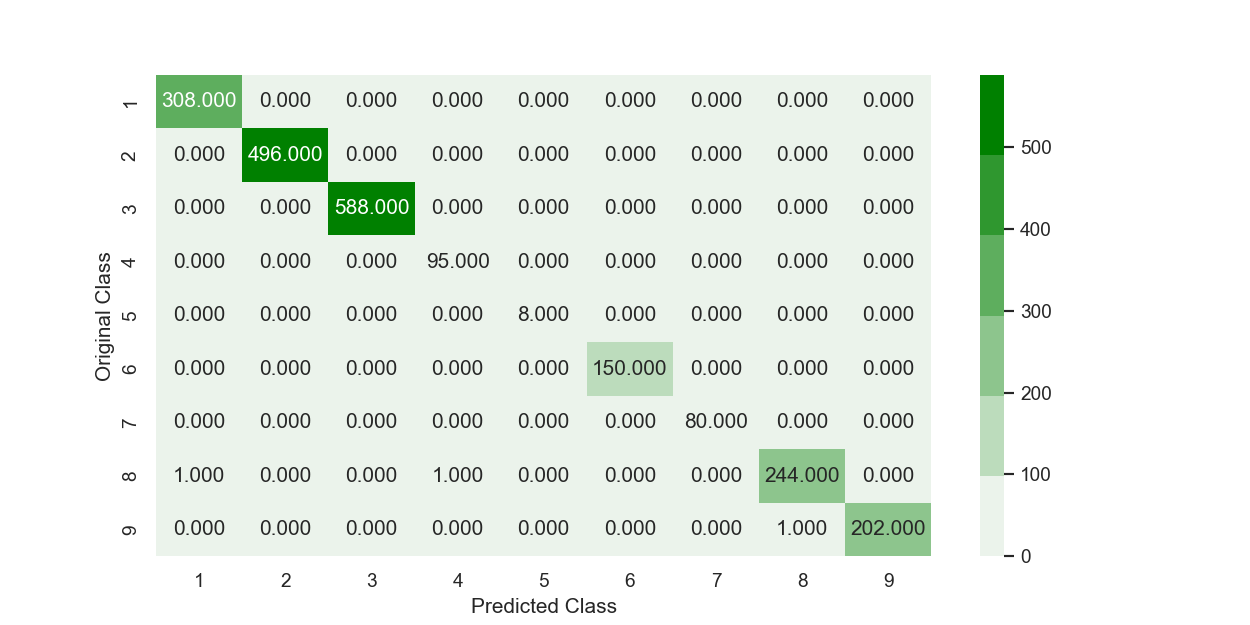

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


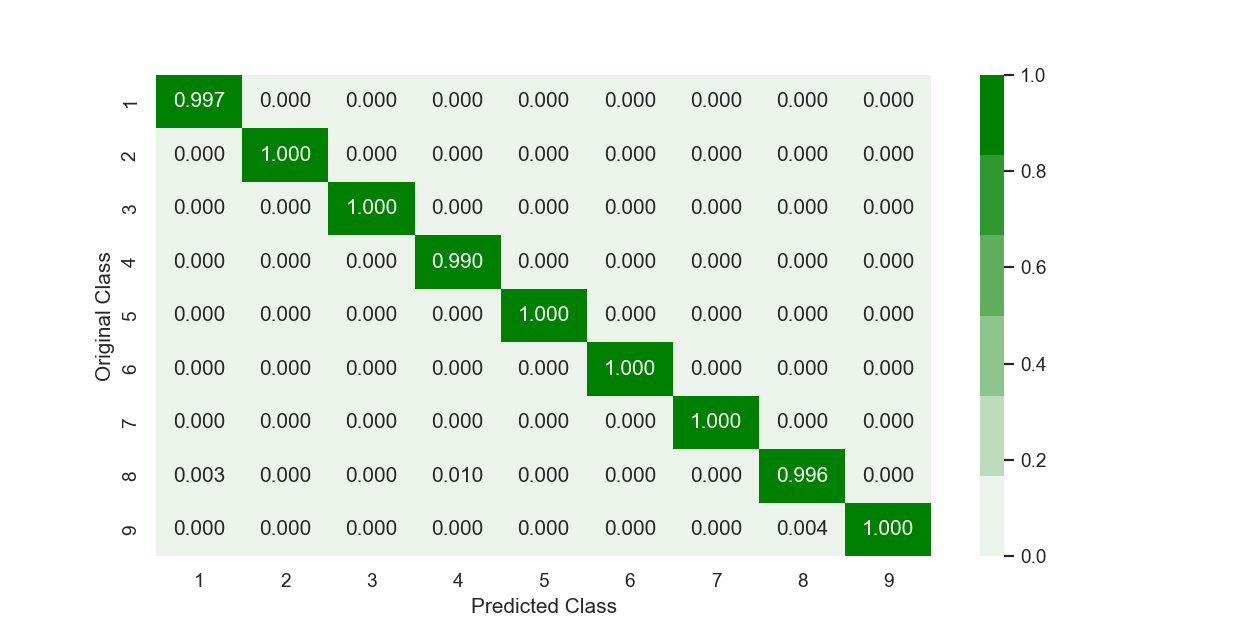

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


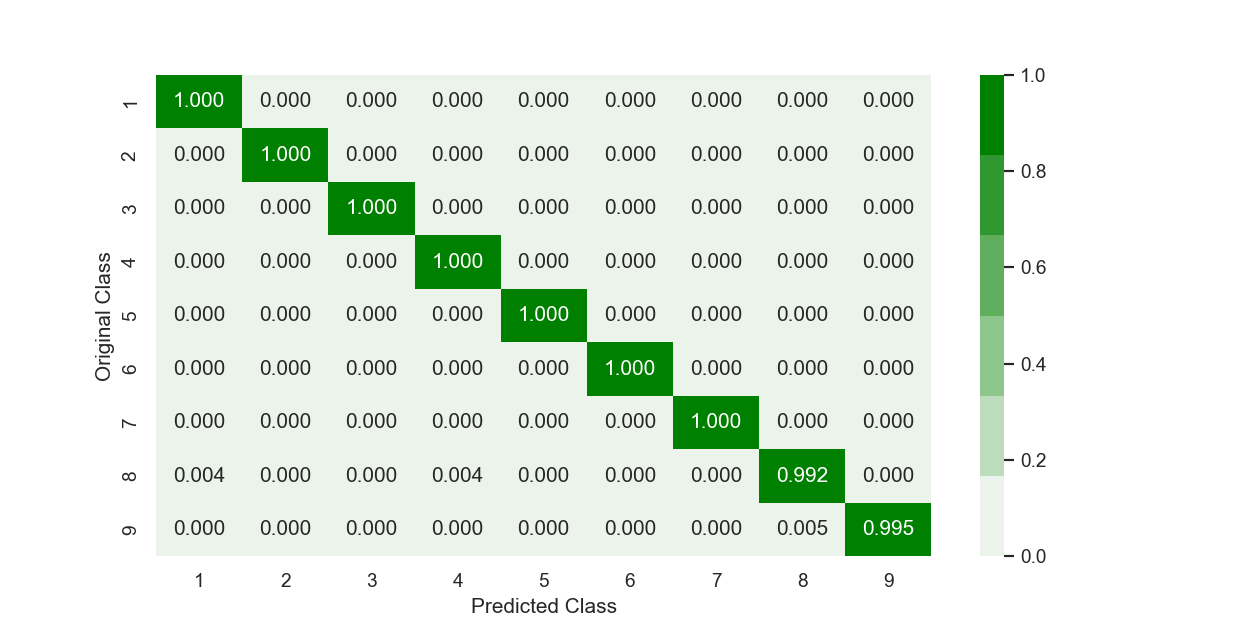

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [246]:
plot_confusion_matrix(y_te_fnl,sigmoid_clf.predict(X_test_fnl))

# ***procedure 1***
- **Feature 1:** byte unigram + byte size + asm unigram + asm size features ***(result_x)***. Already given in the notebook i just added an id colm which is equal to result.csv id. total 308 colms
- **Feature 2:** byte bigram features ***(by_bigram_df)*** used random forest feature selection based on Apriori Algorithm took top 300 bigrams.
- **Feature 3:** opcodes bigram features ***(op_bigram_df)*** extracted from asm files used random forest feature selection based on Apriori Algorithm took top 200 bigrams.
- **Feature 4:** image pixels features ***(Image_df)*** used first 500 pixels extracted from asm files.
- **Got test log loss 0.02**

# ***procedure 2***
- **Feature 1:** byte unigram + byte size + asm unigram + asm size features ***(result_x)***. Already given in the notebook i just added an id colm which is equal to result.csv id. total 308 colms
- **Feature 2:** byte bigram features ***(by_bigram_df)*** used random forest feature selection based on Apriori Algorithm took top 300 bigrams.
- **Feature 3:** opcodes bigram features ***(op_bigram_df)*** extracted from asm files used random forest feature selection based on Apriori Algorithm took top 200 bigrams.
- **Feature 4:** opcodes trigram features ***(op_trigram_df)*** extracted from asm files used random forest feature selection based on Apriori Algorithm took top 200 trigrams.
- **Feature 5:** image pixels features ***(Image_df)*** used first 500 pixels extracted from asm files.
- **Got log loss 0.01 after adding opcode trigram feature misclassified points 0.13799448022079117**

In [266]:
from prettytable import PrettyTable
t = PrettyTable()
t.title = " Feature and Model Comparision "
t.field_names = ["Model",'log loss','Features']
t.add_row(["Xgboost\nbest hyperparameter\nProcedure 1","0.02","byte unigram, byte size,\nasm unigram, asm size,\nopcode bigram 200, byte bigram 300,\nImage pixel top 500"])
t.add_row(["+----------------------------+","+------------+","+--------------------------------------------+"])
t.add_row(["Xgboost\nbest hyperparameter\nProcedure 2","0.01","byte unigram, byte size,\nasm unigram, asm size,\nopcode bigram 200, opcode trigram 200,\nbyte bigram 300, Image pixel top 500"])
print(t)

+--------------------------------------------------------------------------------------------------+
|                                  Feature and Model Comparision                                   |
+--------------------------------+----------------+------------------------------------------------+
|             Model              |    log loss    |                    Features                    |
+--------------------------------+----------------+------------------------------------------------+
|            Xgboost             |      0.02      |            byte unigram, byte size,            |
|      best hyperparameter       |                |             asm unigram, asm size,             |
|          Procedure 1           |                |      opcode bigram 200, byte bigram 300,       |
|                                |                |              Image pixel top 500               |
| +----------------------------+ | +------------+ | +--------------------------------------